In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as plt

In [2]:
df = pd.read_csv('Entrenamieto_ECI_2020.csv')

In [3]:
df.head(10)


,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,...,Q2,2016,NaT,10,EUR,5272800.0,EUR,5272800.0,Closed Lost,Prod_Category_A_None
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,6/16/2015,...,Q1,2016,NaT,0,EUR,48230.0,EUR,48230.0,Closed Won,Prod_Category_A_None
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,...,Q1,2016,NaT,0,USD,83865.6,USD,83865.6,Closed Won,Prod_Category_A_None
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Q1,2018,NaT,14,USD,7421881.5,USD,7421881.5,Closed Lost,Prod_Category_A_None
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Q1,2018,NaT,25,USD,13357192.5,USD,13357192.5,Closed Lost,Prod_Category_A_None
5,16802,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Q1,2018,NaT,28,USD,14838277.5,USD,14838277.5,Closed Lost,Prod_Category_A_None
6,16799,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Q1,2017,NaT,7,USD,2659494.6,USD,2659494.6,Closed Lost,Prod_Category_A_None
7,27455,Americas,NW America,1,1,1,1,0,Bureaucratic_Code_4,4/21/2015,...,Q1,2016,NaT,0,USD,50688.0,USD,50688.0,Closed Won,Prod_Category_A_None
8,24353,Japan,None,1,0,0,0,0,Bureaucratic_Code_5,4/20/2015,...,Q1,2016,NaT,0,JPY,15600.0,JPY,470400.0,Closed Lost,Prod_Category_A_None
9,24355,Japan,None,1,0,0,0,0,Bureaucratic_Code_5,4/20/2015,...,Q1,2016,NaT,0,JPY,4400.0,JPY,470400.0,Closed Lost,Prod_Category_A_None


In [4]:
df['Total_Taxable_Amount_Currency'].value_counts()

USD    7347
JPY    4525
EUR    4518
AUD     553
GBP       4
Name: Total_Taxable_Amount_Currency, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16947 entries, 0 to 16946
Data columns (total 52 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  16947 non-null  int64  
 1   Region                              16947 non-null  object 
 2   Territory                           16947 non-null  object 
 3   Pricing, Delivery_Terms_Quote_Appr  16947 non-null  int64  
 4   Pricing, Delivery_Terms_Approved    16947 non-null  int64  
 5   Bureaucratic_Code_0_Approval        16947 non-null  int64  
 6   Bureaucratic_Code_0_Approved        16947 non-null  int64  
 7   Submitted_for_Approval              16947 non-null  int64  
 8   Bureaucratic_Code                   16947 non-null  object 
 9   Account_Created_Date                16947 non-null  object 
 10  Source                              16947 non-null  object 
 11  Billing_Country                     16947

In [6]:
#Dimensiones
print(df.shape)

(16947, 52)


In [7]:
#Número de filas x número de columnas
df.size

881244

In [8]:
#Revisión de datos no nulos
df.count()

ID                                    16947
Region                                16947
Territory                             16947
Pricing, Delivery_Terms_Quote_Appr    16947
Pricing, Delivery_Terms_Approved      16947
Bureaucratic_Code_0_Approval          16947
Bureaucratic_Code_0_Approved          16947
Submitted_for_Approval                16947
Bureaucratic_Code                     16947
Account_Created_Date                  16947
Source                                16947
Billing_Country                       16947
Account_Name                          16947
Opportunity_Name                      16947
Opportunity_ID                        16947
Sales_Contract_No                     16947
Account_Owner                         16947
Opportunity_Owner                     16947
Account_Type                          16947
Opportunity_Type                      16947
Quote_Type                            16947
Delivery_Terms                        16947
Opportunity_Created_Date        

In [9]:
#Modificamos los valores de las columnas con datos Nan por datos = None. Lo hacemos de esta forma para no perder los datos\
# de Total Amount con dropna. Consideramos que muy posíblemente esta columna nos pueda aportar al análisis.
df= df.fillna(0)


In [10]:
#Empezamos con el paneo general de las variables

Text(0, 0.5, 'Cantidad de oportunidades')

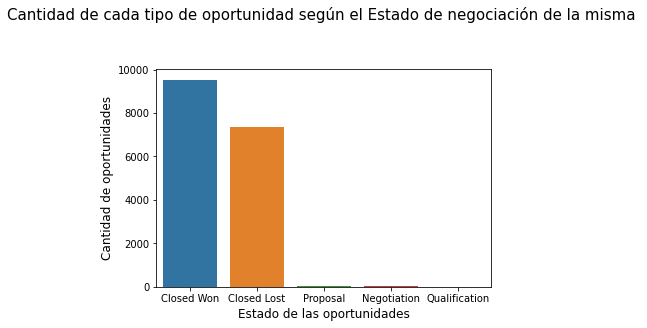

In [11]:
#Conteo de las oportunidades según su estado de negociación(Closed Won, Closed Lost, Proposa, Negotiation, Qualification) 
stage = df['Stage'].value_counts()
grafico = sns.barplot(x = stage.index, y = stage.values)
grafico.set_title('Cantidad de cada tipo de oportunidad según el Estado de negociación de la misma ', fontsize = '15', y = 1.2)
grafico.set_xlabel('Estado de las oportunidades', fontsize = '12')
grafico.set_ylabel ('Cantidad de oportunidades', fontsize = '12') 

In [12]:
#Conteo numérico de las oportunidades por su etapa de negociación (Closed Won, Closed Lost, Proposa, Negotiation, Qualification) 
stage

Closed Won       9533
Closed Lost      7350
Proposal           35
Negotiation        18
Qualification      11
Name: Stage, dtype: int64

Text(0, 0.5, 'Cantidad de oportunidades')

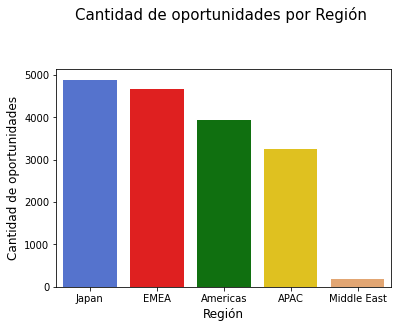

In [13]:
#Gráfico del conteo de las oportunidades surgidas por cada región
palette ={"Japan": "royalblue", "EMEA": "red", "Americas": "green", "APAC": "gold", "Middle East": "sandybrown"}
region= df['Region'].value_counts()
grafico = sns.barplot(x = region.index, y = region.values,palette = palette )
grafico.set_title('Cantidad de oportunidades por Región ', fontsize = '15', y = 1.2)
grafico.set_xlabel('Región', fontsize = '12')
grafico.set_ylabel ('Cantidad de oportunidades', fontsize = '12') 


In [14]:
#Conteo de las oportunidades surgidas por cada región
region

Japan          4892
EMEA           4664
Americas       3945
APAC           3262
Middle East     184
Name: Region, dtype: int64

In [15]:
#Países que más generan oportunidades
paises_mas = df.groupby(['Billing_Country', 'Region']).agg({'Billing_Country': ['count']})
level0_pmas = paises_mas.columns.get_level_values(0)
level1_pmas = paises_mas.columns.get_level_values(1)
paises_mas.columns = level0_pmas + '_' + level1_pmas
paises_mas = paises_mas.reset_index()
paises_mas = paises_mas.sort_values(by = 'Billing_Country_count', ascending = False)
paises_mas_20 = paises_mas.head(20)
paises_mas_20 = paises_mas_20.rename(columns = { 'Billing_Country' : 'Nombre del país', 'Billing_Country_count': 'Cantidad de oportunidades'})
paises_mas = paises_mas.rename(columns = { 'Billing_Country' : 'Nombre del país', 'Billing_Country_count': 'Cantidad de oportunidades'})

paises_mas_20

,Nombre del país,Region,Cantidad de oportunidades
52,Japan,Japan,4874
113,United States,Americas,3788
36,Germany,EMEA,1955
3,Australia,APAC,1169
42,India,APAC,669
72,Netherlands,EMEA,563
92,Singapore,APAC,418
31,France,EMEA,393
99,Spain,EMEA,315
48,Italy,EMEA,293


Text(0, 0.5, 'Cliente')

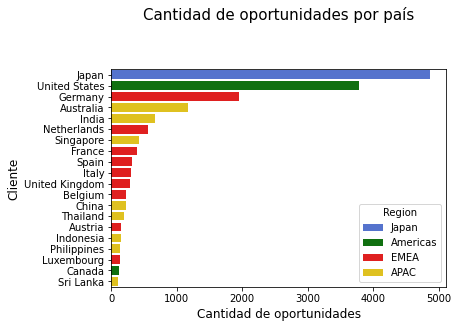

In [16]:
palette ={"Japan": "royalblue", "EMEA": "red", "Americas": "green", "APAC": "gold", "Middle East": "sandybrown"}

grafico_ventas_mas = sns.barplot(data = paises_mas_20 , y = 'Nombre del país',  x= 'Cantidad de oportunidades', orient = 'h', hue = 'Region',palette = palette, dodge=False)
grafico_ventas_mas.set_title('Cantidad de oportunidades por país', fontsize = '15', y = 1.2)
grafico_ventas_mas.set_xlabel('Cantidad de oportunidades', fontsize = '12')
grafico_ventas_mas.set_ylabel ('Cliente', fontsize = '12') 

In [17]:
#Mayor cantidad de oportunidades surgidas por territorio 
#Ignoramos los 4999 casos con valones 'None'. Al ser esta un primera aproximación, creemos que podemos tomarnos esta licencia.
#Después decidieremos si tomar esta columna o no para realizar un análisis más profundo. 
df_territory = df.groupby(['Territory']).agg({'Territory':['count']})
level0 = df_territory.columns.get_level_values(0)
level0
level1 = df_territory.columns.get_level_values(1)
level1
df_territory.columns = level0 + '_' + level1
df_territory = df_territory.reset_index()
df_territory = df_territory.sort_values(by = 'Territory_count', ascending = False)
df_territory = df_territory.iloc[1:]
df_territory.nlargest(20, 'Territory_count')

,Territory,Territory_count
23,Germany,1682
44,NW America,1568
2,Australia,1208
26,India,809
43,NE America,760
30,Japan,681
45,Netherlands,533
55,SE America,493
21,France,449
58,Singapore,441


In [18]:
#Averiguo a qué regiones pertenecen los 'None' de 'Territory', para ver si la falta de estos datos me va a impedir o no realizar análisis futuros.
territory_none = df[df['Territory']== 'None']
territory_none_region = territory_none.groupby(['Region']).agg({'Region':['count']})
level0_territory = territory_none_region.columns.get_level_values(0)
level0_territory
level1_territory = territory_none_region.columns.get_level_values(1)
level1_territory
territory_none_region.columns = level0_territory + '_' + level1_territory
territory_none_region = territory_none_region.reset_index()
territory_none_region = territory_none_region.sort_values(by = 'Region_count', ascending = False )
territory_none_region

,Region,Region_count
2,Japan,4211
0,Americas,571
1,EMEA,187
3,Middle East,30


In [19]:
#Notamos que en el caso de Americas, la mayor cantidad de casos None se da en United States. 
#También vemos que hay datos mezclados como el de los casos pertenecientes a United Kingdom y Germany
territory_none_americas = territory_none[territory_none['Region']== 'Americas']
territory_none_americas = territory_none_americas.groupby(['Billing_Country']).agg({'Billing_Country':['count']})
territory_none_americas

,Billing_Country
,count
Billing_Country,
Canada,18
Ecuador,1
Germany,1
Puerto Rico,1
United Kingdom,1
United States,549


In [20]:
#Hacemos lo mismo que hicimos para el caso de Americas.
territory_none_emea = territory_none[territory_none['Region']== 'EMEA']
territory_none_emea['Billing_Country'].value_counts()

Netherlands             55
Germany                 49
Belgium                 26
France                   9
United Arab Emirates     8
South Africa             6
Italy                    4
Spain                    4
Jordan                   4
Poland                   3
United States            3
Luxembourg               3
Hungary                  2
Singapore                2
None                     1
Brazil                   1
Saudi Arabia             1
Kenya                    1
Ghana                    1
Norway                   1
Egypt                    1
Albania                  1
United Kingdom           1
Name: Billing_Country, dtype: int64

In [21]:
#Hacemos lo mismo que hicimos para el caso de Americas.
territory_none_middle = territory_none[territory_none['Region']== 'Middle East']
territory_none_middle['Billing_Country'].value_counts()

Jordan                  8
Pakistan                5
Germany                 5
Egypt                   3
Lebanon                 3
United Arab Emirates    2
Saudi Arabia            2
Palestine               1
Libya                   1
Name: Billing_Country, dtype: int64

In [22]:
#Después de realizar los análisis de las variables None de Territory notamos que no es una variable que pueda llegar a aportarnos demasiado
#Su categorización es muy parecida a la que podríamos encontrar analizando Billin_Country (Variable que se encuentra más completa incluso.)

In [23]:
#Clientas que más generan oportunidades
clientes_mas = df.groupby(['Account_Name', 'Region']).agg({'Account_Name': ['count']})
clientes_mas
level0_mas = clientes_mas.columns.get_level_values(0)
level0_mas
level1_mas = clientes_mas.columns.get_level_values(1)
level1_mas
clientes_mas.columns = level0_mas + '_' + level1_mas
clientes_mas = clientes_mas.reset_index()
clientes_mas = clientes_mas.sort_values(by = 'Account_Name_count', ascending = False)
clientes_mas_15 = clientes_mas.head(15)
clientes_mas_15 = clientes_mas_15.rename(columns = { 'Account_Name' : 'Nombre de la cuenta', 'Account_Name_count': 'Cantidad de oportunidades'})
clientes_mas = clientes_mas.rename(columns = { 'Account_Name' : 'Nombre de la cuenta', 'Account_Name_count': 'Cantidad de oportunidades'})

clientes_mas_15

,Nombre de la cuenta,Region,Cantidad de oportunidades
797,Account_Name_1888,Japan,2124
753,Account_Name_1836,Japan,886
999,Account_Name_25,Americas,752
885,Account_Name_1991,Japan,586
574,Account_Name_1642,APAC,397
464,Account_Name_1508,Japan,355
401,Account_Name_1440,APAC,317
1254,Account_Name_533,EMEA,283
1011,Account_Name_263,EMEA,249
1372,Account_Name_660,APAC,231


In [24]:
clientes_mas.describe()

,Cantidad de oportunidades
count,1666.000000
mean,10.172269
std,65.074730
min,1.000000
25%,1.000000
50%,2.000000
75%,5.000000
max,2124.000000


Text(0, 0.5, 'Cliente')

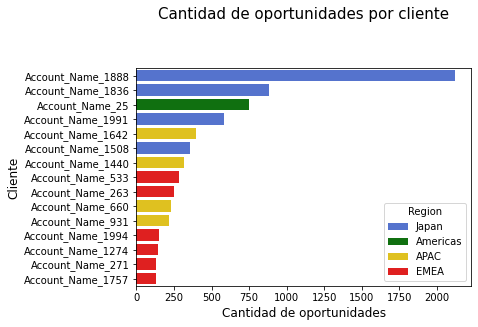

In [25]:
#Gráfico de clientes que más oportunidades generan
palette ={"Japan": "royalblue", "EMEA": "red", "Americas": "green", "APAC": "gold", "Middle East": "sandybrown"}

grafico_mas = sns.barplot(data = clientes_mas_15 , y = 'Nombre de la cuenta',  x= 'Cantidad de oportunidades', orient = 'h', hue = 'Region',palette = palette, dodge=False)
grafico_mas.set_title('Cantidad de oportunidades por cliente', fontsize = '15', y = 1.2)
grafico_mas.set_xlabel('Cantidad de oportunidades', fontsize = '12')
grafico_mas.set_ylabel ('Cliente', fontsize = '12') 

[None]

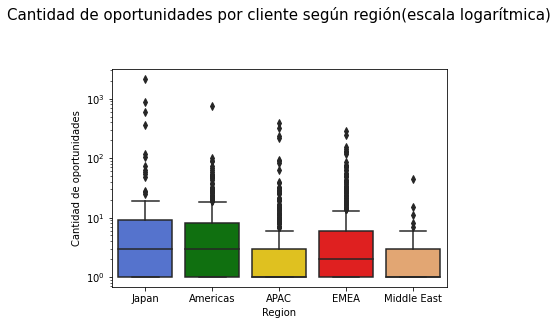

In [26]:
clientes_box = sns.boxplot(x="Region", y="Cantidad de oportunidades", data= clientes_mas, palette = palette)
clientes_box.set_title('Cantidad de oportunidades por cliente según región(escala logarítmica)', fontsize = '15', y = 1.2)
clientes_box = clientes_box.set(yscale='log')

clientes_box

In [27]:
#Clientes que más generan oportunidades comerciales según la región.
#Japón
clientes_japan = df[df['Region']=='Japan']
clientes_japan
clientes_japan = clientes_japan.groupby(['Account_Name', 'Account_Owner']).agg({'Account_Name': ['count']})
level0_japan = clientes_japan.columns.get_level_values(0)
level0_japan
level1_japan = clientes_japan.columns.get_level_values(1)
level1_japan
clientes_japan.columns = level0_japan + '_' + level1_japan
clientes_japan = clientes_japan.reset_index()
clientes_japan = clientes_japan.sort_values(by = 'Account_Name_count', ascending = False)
clientes_japan_15 = clientes_japan.head(15)
clientes_japan_15 = clientes_japan_15.rename(columns = { 'Account_Name' : 'Nombre de la cuenta', 'Account_Name_count': 'Cantidad de oportunidades Japan'})
clientes_japan_15


,Nombre de la cuenta,Account_Owner,Cantidad de oportunidades Japan
48,Account_Name_1888,Person_Name_50,2124
43,Account_Name_1836,Person_Name_50,886
52,Account_Name_1991,Person_Name_32,586
27,Account_Name_1508,Person_Name_50,355
68,Account_Name_501,Person_Name_50,117
2,Account_Name_1075,Person_Name_66,105
76,Account_Name_702,Person_Name_55,74
86,Account_Name_847,Person_Name_50,63
54,Account_Name_2037,Person_Name_61,59
28,Account_Name_1522,Person_Name_50,55


In [28]:
clientes_japan.describe()

,Account_Name_count
count,96.000000
mean,50.958333
std,242.022570
min,1.000000
25%,1.000000
50%,3.000000
75%,9.250000
max,2124.000000


Text(0, 0.5, 'Cliente')

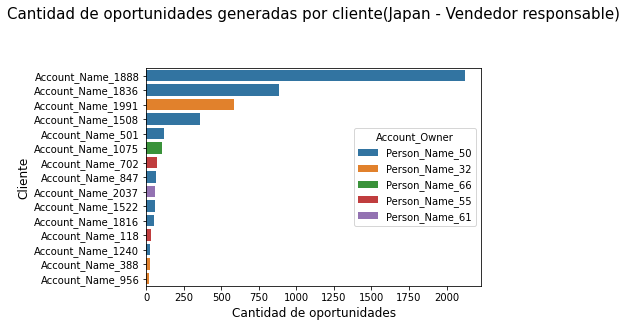

In [29]:
#Gráfico de clientes que más generan oportunidades en Japón
grafico_clientes_japan = sns.barplot(data = clientes_japan_15 , y = 'Nombre de la cuenta',  x= 'Cantidad de oportunidades Japan', orient = 'h', hue = 'Account_Owner', dodge=False)
grafico_clientes_japan.set_title('Cantidad de oportunidades generadas por cliente(Japan - Vendedor responsable)', fontsize = '15', y = 1.2)
grafico_clientes_japan.set_xlabel('Cantidad de oportunidades', fontsize = '12')
grafico_clientes_japan.set_ylabel ('Cliente', fontsize = '12') 


In [30]:
#Americas
clientes_americas = df[df['Region']=='Americas']
clientes_americas
clientes_americas = clientes_americas.groupby(['Account_Name', 'Account_Owner']).agg({'Account_Name': ['count']})
level0_americas = clientes_americas.columns.get_level_values(0)
level1_americas = clientes_americas.columns.get_level_values(1)
clientes_americas.columns = level0_americas + '_' + level1_americas
clientes_americas = clientes_americas.reset_index()
clientes_americas = clientes_americas.sort_values(by = 'Account_Name_count', ascending = False)
clientes_americas_15 = clientes_americas.head(15)
clientes_americas_15 = clientes_americas_15.rename(columns = { 'Account_Name' : 'Nombre de la cuenta', 'Account_Name_count': 'Cantidad de oportunidades Americas'})
clientes_americas_15

,Nombre de la cuenta,Account_Owner,Cantidad de oportunidades Americas
256,Account_Name_25,Person_Name_8,752
110,Account_Name_1448,Person_Name_64,101
202,Account_Name_1794,Person_Name_64,91
91,Account_Name_1378,Person_Name_46,89
306,Account_Name_46,Person_Name_33,73
299,Account_Name_433,Person_Name_8,67
166,Account_Name_167,Person_Name_38,62
98,Account_Name_1409,Person_Name_8,58
119,Account_Name_151,Person_Name_45,54
359,Account_Name_742,Person_Name_8,52


In [31]:
clientes_americas.describe()

,Account_Name_count
count,405.000000
mean,9.740741
std,39.228443
min,1.000000
25%,1.000000
50%,3.000000
75%,8.000000
max,752.000000


Text(0, 0.5, 'Cliente')

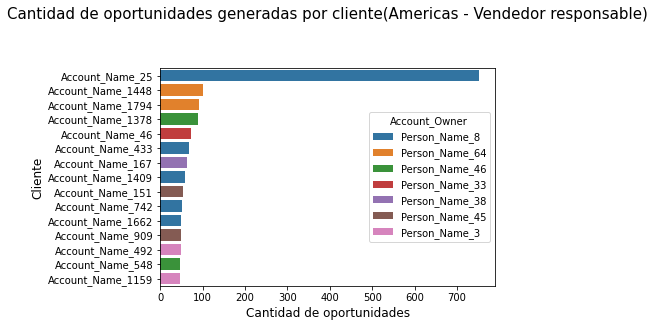

In [32]:
#Gráfico de clientes que más generan oportunidades en Americas
grafico_clientes_americas = sns.barplot(data = clientes_americas_15 , y = 'Nombre de la cuenta',  x= 'Cantidad de oportunidades Americas', orient = 'h', hue = 'Account_Owner', dodge= False)
grafico_clientes_americas.set_title('Cantidad de oportunidades generadas por cliente(Americas - Vendedor responsable)', fontsize = '15', y = 1.2)
grafico_clientes_americas.set_xlabel('Cantidad de oportunidades', fontsize = '12')
grafico_clientes_americas.set_ylabel ('Cliente', fontsize = '12') 

In [33]:
#EMEA
#Americas
clientes_EMEA = df[df['Region']=='EMEA']
clientes_EMEA = clientes_EMEA.groupby(['Account_Name', 'Account_Owner']).agg({'Account_Name': ['count']})
level0_EMEA = clientes_EMEA.columns.get_level_values(0)
level1_EMEA = clientes_EMEA.columns.get_level_values(1)
clientes_EMEA.columns = level0_EMEA + '_' + level1_EMEA
clientes_EMEA = clientes_EMEA.reset_index()
clientes_EMEA = clientes_EMEA.sort_values(by = 'Account_Name_count', ascending = False)
clientes_EMEA_15 = clientes_EMEA.head(15)
clientes_EMEA_15 = clientes_EMEA_15.rename(columns = { 'Account_Name' : 'Nombre de la cuenta', 'Account_Name_count': 'Cantidad de oportunidades EMEA'})
clientes_EMEA_15

,Nombre de la cuenta,Account_Owner,Cantidad de oportunidades EMEA
381,Account_Name_533,Person_Name_13,283
291,Account_Name_263,Person_Name_13,249
240,Account_Name_1994,Person_Name_13,152
69,Account_Name_1274,Person_Name_18,144
296,Account_Name_271,Person_Name_18,131
188,Account_Name_1757,Person_Name_42,127
172,Account_Name_1693,Person_Name_13,125
20,Account_Name_1067,Person_Name_2,116
438,Account_Name_686,Person_Name_13,86
76,Account_Name_1313,Person_Name_4,76


In [34]:
clientes_EMEA.describe()

,Account_Name_count
count,526.00000
mean,8.86692
std,23.90205
min,1.00000
25%,1.00000
50%,2.00000
75%,6.00000
max,283.00000


Text(0, 0.5, 'Cliente')

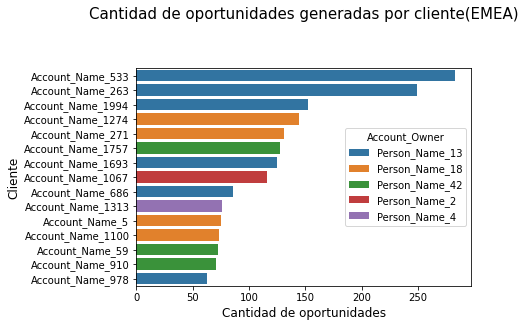

In [35]:
#Gráfico de clientes que más generan oportunidades en EMEA
grafico_clientes_EMEA = sns.barplot(data = clientes_EMEA_15 , y = 'Nombre de la cuenta',  x= 'Cantidad de oportunidades EMEA', orient = 'h', hue = 'Account_Owner', dodge = False)
grafico_clientes_EMEA.set_title('Cantidad de oportunidades generadas por cliente(EMEA)', fontsize = '15', y = 1.2)
grafico_clientes_EMEA.set_xlabel('Cantidad de oportunidades', fontsize = '12')
grafico_clientes_EMEA.set_ylabel ('Cliente', fontsize = '12') 

In [36]:
#APAC
#Americas
clientes_APAC = df[df['Region']=='APAC']
clientes_APAC = clientes_APAC.groupby(['Account_Name', 'Account_Owner']).agg({'Account_Name': ['count']})
level0_APAC = clientes_APAC.columns.get_level_values(0)
level1_APAC = clientes_APAC.columns.get_level_values(1)
clientes_APAC.columns = level0_APAC + '_' + level1_APAC
clientes_APAC = clientes_APAC.reset_index()
clientes_APAC = clientes_APAC.sort_values(by = 'Account_Name_count', ascending = False)
clientes_APAC_15 = clientes_APAC.head(15)
clientes_APAC_15 = clientes_APAC_15.rename(columns = { 'Account_Name' : 'Nombre de la cuenta', 'Account_Name_count': 'Cantidad de oportunidades APAC'})
clientes_APAC_15

,Nombre de la cuenta,Account_Owner,Cantidad de oportunidades APAC
204,Account_Name_1642,Person_Name_43,397
139,Account_Name_1440,Person_Name_43,317
475,Account_Name_660,Person_Name_43,231
556,Account_Name_931,Person_Name_65,215
130,Account_Name_1411,Person_Name_52,93
370,Account_Name_266,Person_Name_43,91
150,Account_Name_1468,Person_Name_65,84
293,Account_Name_1904,Person_Name_65,62
115,Account_Name_1376,Person_Name_43,39
273,Account_Name_1857,Person_Name_43,38


In [37]:
clientes_APAC.describe()

,Account_Name_count
count,579.000000
mean,5.633851
std,25.870197
min,1.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,397.000000


Text(0, 0.5, 'Cliente')

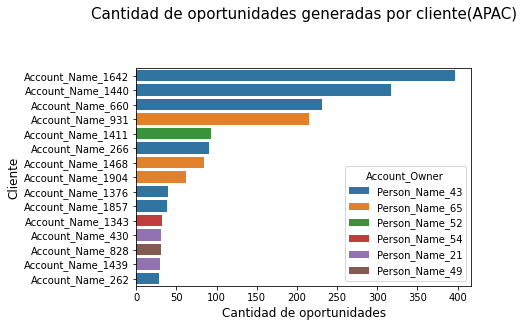

In [38]:
#Gráfico de clientes que más generan oportunidades en APAC
grafico_clientes_APAC = sns.barplot(data = clientes_APAC_15 , y = 'Nombre de la cuenta',  x= 'Cantidad de oportunidades APAC', orient = 'h', hue = 'Account_Owner', dodge = False)
grafico_clientes_APAC.set_title('Cantidad de oportunidades generadas por cliente(APAC)', fontsize = '15', y = 1.2)
grafico_clientes_APAC.set_xlabel('Cantidad de oportunidades', fontsize = '12')
grafico_clientes_APAC.set_ylabel ('Cliente', fontsize = '12') 

In [39]:
#Middle East
#Clientes que más generan oportunidades comerciales según la región.
#Japón
clientes_MiddleEast = df[df['Region']=='Middle East']
clientes_MiddleEast = clientes_MiddleEast.groupby(['Account_Name', 'Account_Owner']).agg({'Account_Name': ['count']})
level0_MiddleEast = clientes_MiddleEast.columns.get_level_values(0)
level1_MiddleEast = clientes_MiddleEast.columns.get_level_values(1)
clientes_MiddleEast.columns = level0_MiddleEast + '_' + level1_MiddleEast
clientes_MiddleEast = clientes_MiddleEast.reset_index()
clientes_MiddleEast = clientes_MiddleEast.sort_values(by = 'Account_Name_count', ascending = False)
clientes_MiddleEast_15 = clientes_MiddleEast.head(15)
clientes_MiddleEast_15 = clientes_MiddleEast_15.rename(columns = { 'Account_Name' : 'Nombre de la cuenta', 'Account_Name_count': 'Cantidad de oportunidades Middle East'})
clientes_MiddleEast_15


,Nombre de la cuenta,Account_Owner,Cantidad de oportunidades Middle East
35,Account_Name_415,Person_Name_5,44
32,Account_Name_306,Person_Name_5,15
16,Account_Name_1180,Person_Name_5,11
12,Account_Name_1144,Person_Name_5,8
53,Account_Name_908,Person_Name_5,7
50,Account_Name_751,Person_Name_5,6
29,Account_Name_2060,Person_Name_62,5
24,Account_Name_1686,Person_Name_13,5
45,Account_Name_63,Person_Name_5,4
40,Account_Name_572,Person_Name_5,4


In [40]:
clientes_MiddleEast.describe()

,Account_Name_count
count,60.000000
mean,3.066667
std,5.954251
min,1.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,44.000000


Text(0, 0.5, 'Cliente')

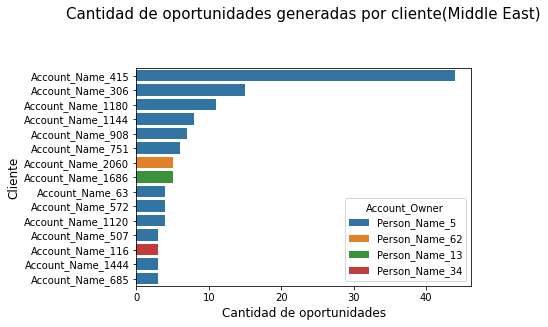

In [41]:
#Gráfico de clientes que más generan oportunidades en Middle East
grafico_clientes_MiddleEast = sns.barplot(data = clientes_MiddleEast_15 , y = 'Nombre de la cuenta',  x= 'Cantidad de oportunidades Middle East', orient = 'h', hue = 'Account_Owner', dodge= False)
grafico_clientes_MiddleEast.set_title('Cantidad de oportunidades generadas por cliente(Middle East)', fontsize = '15', y = 1.2)
grafico_clientes_MiddleEast.set_xlabel('Cantidad de oportunidades', fontsize = '12')
grafico_clientes_MiddleEast.set_ylabel ('Cliente', fontsize = '12') 

In [42]:
#Vendedores que generan más oportunidaes comerciales.

vendedores_mas = df.groupby(['Account_Owner', 'Region']).agg({'Account_Owner': ['count']})
vendedores_mas
level0_vendedores = vendedores_mas.columns.get_level_values(0)
level1_vendedores = vendedores_mas.columns.get_level_values(1)
level1_mas
vendedores_mas.columns = level0_mas + '_' + level1_mas
vendedores_mas = vendedores_mas.reset_index()
vendedores_mas = vendedores_mas.sort_values(by = 'Account_Name_count', ascending = False)
vendedores_mas_15 = vendedores_mas.head(15)
vendedores_mas_15 = vendedores_mas_15.rename(columns = { 'Account_Owner' : 'Nombre del vendedor', 'Account_Name_count': 'Cantidad de oportunidades'})
vendedores_mas = vendedores_mas.rename(columns = { 'Account_Owner' : 'Nombre del vendedor', 'Account_Name_count': 'Cantidad de oportunidades'})

vendedores_mas


,Nombre del vendedor,Region,Cantidad de oportunidades
50,Person_Name_50,Japan,3730
4,Person_Name_13,EMEA,1309
72,Person_Name_8,Americas,1276
39,Person_Name_43,APAC,1241
9,Person_Name_18,EMEA,1089
...,...,...,...
24,Person_Name_33,EMEA,1
14,Person_Name_20,EMEA,1
13,Person_Name_2,Middle East,1
11,Person_Name_2,APAC,1


Text(0, 0.5, 'Cliente')

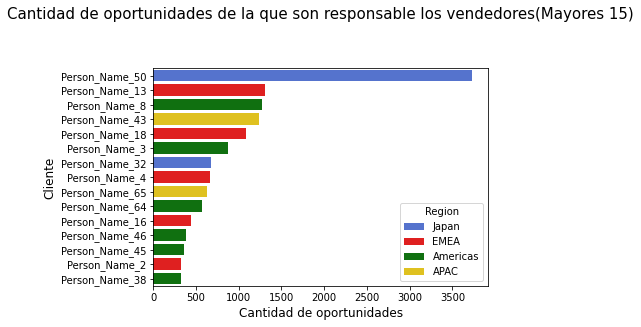

In [43]:
#Gráfico de vendedores que son responsables de más oportunidades comerciales
palette ={"Japan": "royalblue", "EMEA": "red", "Americas": "green", "APAC": "gold", "Middle East": "sandybrown"}


grafico_mas = sns.barplot(data = vendedores_mas_15 , y = 'Nombre del vendedor',  x= 'Cantidad de oportunidades', orient = 'h', hue = 'Region', palette=palette, dodge=False)
grafico_mas.set_title('Cantidad de oportunidades de la que son responsable los vendedores(Mayores 15)', fontsize = '15', y = 1.2)
grafico_mas.set_xlabel('Cantidad de oportunidades', fontsize = '12')
grafico_mas.set_ylabel ('Cliente', fontsize = '12') 

[None]

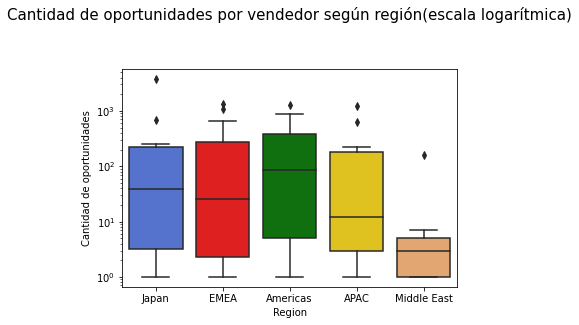

In [44]:
#Grádico Boxplot vendedores con mayor cantidad de oportunidades a su cargo
vendedores_box = sns.boxplot(x="Region", y="Cantidad de oportunidades", data= vendedores_mas, palette = palette)
vendedores_box.set_title('Cantidad de oportunidades por vendedor según región(escala logarítmica)', fontsize = '15', y = 1.2)
vendedores_box = vendedores_box.set(yscale='log')

vendedores_box

In [45]:
#Vendedores Japan
vendedores_mas[vendedores_mas['Region']=='Japan'].describe()


,Cantidad de oportunidades
count,10.00000
mean,489.20000
std,1158.26372
min,1.00000
25%,3.25000
50%,39.00000
75%,225.75000
max,3730.00000


In [46]:
clientes_japan['Account_Owner'].value_counts(ascending = False)

Person_Name_66    32
Person_Name_32    26
Person_Name_55    14
Person_Name_50    13
Person_Name_61     5
Person_Name_44     2
Person_Name_47     1
Person_Name_59     1
Person_Name_18     1
Person_Name_41     1
Name: Account_Owner, dtype: int64

In [47]:
clientes_japan_15['Account_Owner'].value_counts(ascending = False)

Person_Name_50    8
Person_Name_32    3
Person_Name_55    2
Person_Name_61    1
Person_Name_66    1
Name: Account_Owner, dtype: int64

In [48]:
#Vendedores EMEA
vendedores_mas[vendedores_mas['Region']=='EMEA'].describe()


,Cantidad de oportunidades
count,22.000000
mean,212.000000
std,365.134287
min,1.000000
25%,2.250000
50%,25.500000
75%,271.500000
max,1309.000000


In [49]:
clientes_EMEA['Account_Owner'].value_counts(ascending = False)

Person_Name_4     101
Person_Name_16     91
Person_Name_18     77
Person_Name_13     72
Person_Name_39     40
Person_Name_2      29
Person_Name_62     22
Person_Name_14     21
Person_Name_51     20
Person_Name_41     17
Person_Name_42     12
Person_Name_29      7
Person_Name_36      3
Person_Name_23      3
Person_Name_8       2
Person_Name_35      2
Person_Name_5       2
Person_Name_33      1
Person_Name_58      1
Person_Name_20      1
Person_Name_25      1
Person_Name_10      1
Name: Account_Owner, dtype: int64

In [50]:
clientes_EMEA_15['Account_Owner'].value_counts(ascending = False)

Person_Name_13    6
Person_Name_18    4
Person_Name_42    3
Person_Name_2     1
Person_Name_4     1
Name: Account_Owner, dtype: int64

In [51]:
#Vendedores AMERICAS
vendedores_mas[vendedores_mas['Region']=='Americas'].describe()

,Cantidad de oportunidades
count,13.000000
mean,303.461538
std,399.820088
min,1.000000
25%,5.000000
50%,85.000000
75%,381.000000
max,1276.000000


In [52]:
clientes_americas['Account_Owner'].value_counts(ascending = False)

Person_Name_3     130
Person_Name_8      62
Person_Name_64     50
Person_Name_45     49
Person_Name_46     47
Person_Name_38     44
Person_Name_33      8
Person_Name_9       6
Person_Name_13      3
Person_Name_25      3
Person_Name_4       1
Person_Name_58      1
Person_Name_47      1
Name: Account_Owner, dtype: int64

In [53]:
clientes_americas_15['Account_Owner'].value_counts(ascending = False)

Person_Name_8     5
Person_Name_64    2
Person_Name_46    2
Person_Name_3     2
Person_Name_45    2
Person_Name_38    1
Person_Name_33    1
Name: Account_Owner, dtype: int64

In [54]:
#Vendedores APAC
vendedores_mas[vendedores_mas['Region']=='APAC'].describe()

,Cantidad de oportunidades
count,21.000000
mean,155.333333
std,289.331183
min,1.000000
25%,3.000000
50%,12.000000
75%,178.000000
max,1241.000000


In [55]:
clientes_APAC['Account_Owner'].value_counts(ascending = False)

Person_Name_60    106
Person_Name_49     91
Person_Name_59     83
Person_Name_65     72
Person_Name_54     58
Person_Name_63     44
Person_Name_43     36
Person_Name_21     25
Person_Name_44     19
Person_Name_52     14
Person_Name_26     11
Person_Name_13      5
Person_Name_58      3
Person_Name_4       3
Person_Name_66      2
Person_Name_11      2
Person_Name_5       1
Person_Name_2       1
Person_Name_8       1
Person_Name_41      1
Person_Name_17      1
Name: Account_Owner, dtype: int64

In [56]:
clientes_APAC_15['Account_Owner'].value_counts(ascending = False)

Person_Name_43    7
Person_Name_65    3
Person_Name_21    2
Person_Name_52    1
Person_Name_49    1
Person_Name_54    1
Name: Account_Owner, dtype: int64

In [57]:
#Vendedores Middle East
vendedores_mas[vendedores_mas['Region']=='Middle East'].describe()

,Cantidad de oportunidades
count,9.000000
mean,20.444444
std,52.381082
min,1.000000
25%,1.000000
50%,3.000000
75%,5.000000
max,160.000000


In [58]:
clientes_MiddleEast['Account_Owner'].value_counts(ascending = False)

Person_Name_5     46
Person_Name_39     7
Person_Name_62     1
Person_Name_13     1
Person_Name_41     1
Person_Name_2      1
Person_Name_66     1
Person_Name_34     1
Person_Name_60     1
Name: Account_Owner, dtype: int64

In [59]:
clientes_MiddleEast_15['Account_Owner'].value_counts(ascending = False)

Person_Name_5     12
Person_Name_62     1
Person_Name_13     1
Person_Name_34     1
Name: Account_Owner, dtype: int64

In [60]:
#Podemos dividir los datos para cada región por anio

df_japan = df[df['Region']== 'Japan']
df_japan["Account_Created_Date"]=pd.to_datetime(df_japan.Account_Created_Date)
df_japan_2013 = df_japan[(df_japan["Account_Created_Date"]>='1-1-2013') & (df_japan["Account_Created_Date"]<='12-31-2013')]
df_japan_2014 = df_japan[(df_japan["Account_Created_Date"]>='1-1-2014') & (df_japan["Account_Created_Date"]<='12-31-2014')]
df_japan_2015 = df_japan[(df_japan["Account_Created_Date"]>='1-1-2015') & (df_japan["Account_Created_Date"]<='12-31-2015')]
df_japan_2016 = df_japan[(df_japan["Account_Created_Date"]>='1-1-2016') & (df_japan["Account_Created_Date"]<='12-31-2016')]
df_japan_2017 = df_japan[(df_japan["Account_Created_Date"]>='1-1-2017') & (df_japan["Account_Created_Date"]<='12-31-2017')]
df_japan_2018 = df_japan[(df_japan["Account_Created_Date"]>='1-1-2018') & (df_japan["Account_Created_Date"]<='12-31-2018')]


/home/agustin18/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [61]:
df_japan_2018['Mes']= pd.DatetimeIndex(df_japan_2018['Account_Created_Date']).month
df_japan_2017['Mes']= pd.DatetimeIndex(df_japan_2017['Account_Created_Date']).month
df_japan_2016['Mes']= pd.DatetimeIndex(df_japan_2016['Account_Created_Date']).month
df_japan_2015['Mes']= pd.DatetimeIndex(df_japan_2015['Account_Created_Date']).month
df_japan_2014['Mes']= pd.DatetimeIndex(df_japan_2014['Account_Created_Date']).month
df_japan_2013['Mes']= pd.DatetimeIndex(df_japan_2013['Account_Created_Date']).month
df_japan['Mes']= pd.DatetimeIndex(df_japan['Account_Created_Date']).month




/home/agustin18/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/agustin18/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/agustin18/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

In [62]:
#Meses del anio en donde más oportunidades se generan por Región
#Japan
df_japan['Mes']= pd.DatetimeIndex(df_japan['Account_Created_Date']).month
df_japan

/home/agustin18/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A,Mes
8,24353,Japan,None,1,0,0,0,0,Bureaucratic_Code_5,2015-04-20,...,2016,NaT,0,JPY,15600.0,JPY,470400.0,Closed Lost,Prod_Category_A_None,4
9,24355,Japan,None,1,0,0,0,0,Bureaucratic_Code_5,2015-04-20,...,2016,NaT,0,JPY,4400.0,JPY,470400.0,Closed Lost,Prod_Category_A_None,4
10,24356,Japan,None,1,0,0,0,0,Bureaucratic_Code_5,2015-04-20,...,2016,NaT,0,JPY,6200.0,JPY,470400.0,Closed Lost,Prod_Category_A_None,4
11,24357,Japan,None,1,0,0,0,0,Bureaucratic_Code_5,2015-04-20,...,2016,NaT,0,JPY,140000.0,JPY,470400.0,Closed Lost,Prod_Category_A_None,4
12,24358,Japan,None,1,0,0,0,0,Bureaucratic_Code_5,2015-04-20,...,2016,NaT,0,JPY,304200.0,JPY,470400.0,Closed Lost,Prod_Category_A_None,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16922,18519,Japan,None,1,1,1,1,0,Bureaucratic_Code_4,2013-07-28,...,2016,NaT,0,USD,13200.0,USD,6422400.6,Closed Won,Prod_Category_A_None,7
16923,27689,Japan,None,1,1,0,0,0,Bureaucratic_Code_4,2015-06-11,...,2016,NaT,0,JPY,12194000.0,JPY,12194000.0,Closed Won,Prod_Category_A_None,6
16924,27688,Japan,None,1,1,0,0,0,Bureaucratic_Code_4,2015-06-11,...,2016,NaT,0,JPY,11959500.0,JPY,11959500.0,Closed Won,Prod_Category_A_None,6
16925,19062,Japan,Japan,0,0,0,0,0,Bureaucratic_Code_4,2013-08-11,...,2016,NaT,0,JPY,17537000.0,JPY,17537000.0,Closed Won,Prod_Category_A_None,8


In [63]:
japon_mes = df_japan.groupby(['Mes']).agg({'Mes': ['count']})
level0_jmes = japon_mes.columns.get_level_values(0)
level1_jmes = japon_mes.columns.get_level_values(1)
japon_mes.columns = level0_jmes + '_' + level1_jmes
japon_mes = japon_mes.reset_index()
japon_mes = japon_mes.sort_values(by = 'Mes_count', ascending = False)
japon_mes


,Mes,Mes_count
2,4,3019
7,9,641
10,12,479
5,7,251
8,10,147
4,6,127
6,8,116
0,2,48
9,11,30
1,3,22


Text(0.5, 0, 'Mes')

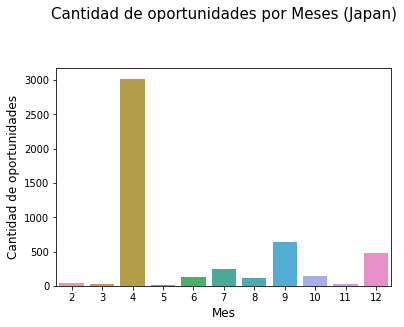

In [64]:
#Gráfico oportunidades por Mes (japan)
grafico_mjapan = sns.barplot(data = japon_mes , x = 'Mes',  y= 'Mes_count',  dodge=False)
grafico_mjapan.set_title('Cantidad de oportunidades por Meses (Japan)', fontsize = '15', y = 1.2)
grafico_mjapan.set_ylabel('Cantidad de oportunidades', fontsize = '12')
grafico_mjapan.set_xlabel ('Mes', fontsize = '12') 

In [65]:
#Para ver si ese valor extremo del mes 4(Abril) se relaciona con el clientes extremo podemos volver a generar una tabla para constatar.
japon_mes = df_japan.groupby(['Mes', 'Account_Name']).agg({'Mes': ['count']})
level0_jmes = japon_mes.columns.get_level_values(0)
level1_jmes = japon_mes.columns.get_level_values(1)
japon_mes.columns = level0_jmes + '_' + level1_jmes
japon_mes = japon_mes.reset_index()
japon_mes = japon_mes.sort_values(by = 'Mes_count', ascending = False)
japon_mes

,Mes,Account_Name,Mes_count
16,4,Account_Name_1888,2124
15,4,Account_Name_1836,886
60,9,Account_Name_1991,586
86,12,Account_Name_1508,355
72,10,Account_Name_501,117
...,...,...,...
64,9,Account_Name_843,1
66,10,Account_Name_1287,1
69,10,Account_Name_1622,1
70,10,Account_Name_2053,1


In [66]:
#EMEA
df_EMEA= df[df['Region']== 'EMEA']
df_EMEA['Mes']= pd.DatetimeIndex(df_EMEA['Account_Created_Date']).month
df_EMEA

/home/agustin18/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A,Mes
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,...,2016,NaT,10,EUR,5272800.0,EUR,5272800.0,Closed Lost,Prod_Category_A_None,6
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,6/16/2015,...,2016,NaT,0,EUR,48230.0,EUR,48230.0,Closed Won,Prod_Category_A_None,6
62,18557,EMEA,Italy,1,1,1,1,0,Bureaucratic_Code_4,7/27/2013,...,2016,NaT,0,EUR,259875.0,EUR,259875.0,Closed Lost,Prod_Category_A_None,7
63,13392,EMEA,Germany,0,0,0,0,0,Bureaucratic_Code_4,7/27/2013,...,2016,NaT,0,EUR,103350.0,EUR,103350.0,Closed Won,Prod_Category_A_None,7
66,18491,EMEA,United Kingdom,0,0,0,0,0,Bureaucratic_Code_4,1/8/2014,...,2016,NaT,0,EUR,214500.0,EUR,214500.0,Closed Won,Prod_Category_A_None,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16938,28767,EMEA,Germany,1,0,0,0,0,Bureaucratic_Code_5,12/4/2015,...,2016,NaT,3,EUR,1307775.0,EUR,1307775.0,Closed Lost,Prod_Category_A_None,12
16939,18324,EMEA,Norway,1,1,0,0,0,Bureaucratic_Code_4,7/27/2013,...,2016,NaT,1,EUR,401700.0,EUR,401700.0,Closed Won,Prod_Category_A_None,7
16942,8781,EMEA,Austria,1,1,1,1,0,Bureaucratic_Code_4,1/15/2016,...,2016,NaT,0,EUR,103350.0,EUR,299715.0,Closed Won,Prod_Category_A_None,1
16943,8786,EMEA,Austria,1,1,1,1,0,Bureaucratic_Code_4,1/15/2016,...,2016,NaT,0,EUR,93015.0,EUR,299715.0,Closed Won,Prod_Category_A_None,1


In [67]:
Emea_mes = df_EMEA.groupby(['Mes']).agg({'Mes': ['count']})
level0_emes = Emea_mes.columns.get_level_values(0)
level1_emes = Emea_mes.columns.get_level_values(1)
Emea_mes.columns = level0_emes + '_' + level1_emes
Emea_mes = Emea_mes.reset_index()
Emea_mes = Emea_mes.sort_values(by = 'Mes_count', ascending = False)
Emea_mes

,Mes,Mes_count
6,7,1792
5,6,427
0,1,393
2,3,352
8,9,319
11,12,289
1,2,275
9,10,209
4,5,191
3,4,162


Text(0.5, 0, 'Mes')

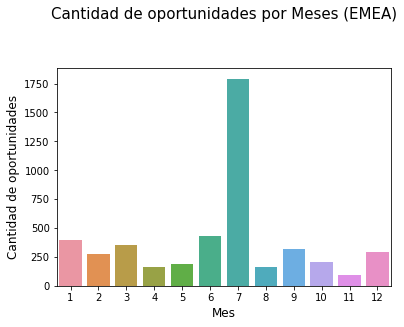

In [68]:
#Gráfico oportunidades por Mes (EMEA)
grafico_memea = sns.barplot(data = Emea_mes , x = 'Mes',  y= 'Mes_count',  dodge=False)
grafico_memea.set_title('Cantidad de oportunidades por Meses (EMEA)', fontsize = '15', y = 1.2)
grafico_memea.set_ylabel('Cantidad de oportunidades', fontsize = '12')
grafico_memea.set_xlabel ('Mes', fontsize = '12') 

In [69]:
emea_mes = df_EMEA.groupby(['Mes', 'Account_Name']).agg({'Mes': ['count']})
level0_mes = emea_mes.columns.get_level_values(0)
level1_mes = emea_mes.columns.get_level_values(1)
emea_mes.columns = level0_mes + '_' + level1_mes
emea_mes = emea_mes.reset_index()
emea_mes = emea_mes.sort_values(by = 'Mes_count', ascending = False)
emea_mes.head(10)

,Mes,Account_Name,Mes_count
310,7,Account_Name_533,283
297,7,Account_Name_263,249
289,7,Account_Name_1994,152
266,7,Account_Name_1274,144
105,3,Account_Name_271,131
381,9,Account_Name_1757,127
282,7,Account_Name_1693,125
255,7,Account_Name_1067,116
522,12,Account_Name_686,86
413,10,Account_Name_1313,76


In [70]:
#Americas
df_Americas= df[df['Region']== 'Americas']
df_Americas['Mes']= pd.DatetimeIndex(df_Americas['Account_Created_Date']).month
df_Americas

/home/agustin18/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A,Mes
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,...,2016,NaT,0,USD,83865.60,USD,83865.6,Closed Won,Prod_Category_A_None,4
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,2018,NaT,14,USD,7421881.50,USD,7421881.5,Closed Lost,Prod_Category_A_None,7
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,2018,NaT,25,USD,13357192.50,USD,13357192.5,Closed Lost,Prod_Category_A_None,7
5,16802,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,2018,NaT,28,USD,14838277.50,USD,14838277.5,Closed Lost,Prod_Category_A_None,7
6,16799,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,2017,NaT,7,USD,2659494.60,USD,2659494.6,Closed Lost,Prod_Category_A_None,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16930,28372,Americas,SE America,1,0,1,0,0,Bureaucratic_Code_5,9/25/2015,...,2016,NaT,120,USD,76800640.00,USD,76800640.0,Closed Lost,Prod_Category_A_None,9
16940,20827,Americas,NE America,1,0,0,0,0,Bureaucratic_Code_5,6/16/2014,...,2016,NaT,20,USD,10751580.00,USD,21332500.0,Closed Lost,Prod_Category_A_None,6
16941,20830,Americas,NE America,1,0,0,0,0,Bureaucratic_Code_5,6/16/2014,...,2016,NaT,20,USD,10580920.00,USD,21332500.0,Closed Lost,Prod_Category_A_None,6
16945,28561,Americas,NE America,1,1,1,1,0,Bureaucratic_Code_4,10/20/2015,...,2016,NaT,4,USD,2346796.88,USD,0.0,Closed Lost,Prod_Category_A_None,10


In [71]:
Am_mes = df_Americas.groupby(['Mes']).agg({'Mes': ['count']})
level0_am = Am_mes.columns.get_level_values(0)
level1_am = Am_mes.columns.get_level_values(1)
Am_mes.columns = level0_am + '_' + level1_am
Am_mes = Am_mes.reset_index()
Am_mes = Am_mes.sort_values(by = 'Mes_count', ascending = False)
Am_mes

,Mes,Mes_count
6,7,1290
7,8,377
4,5,328
11,12,318
3,4,298
5,6,293
8,9,246
1,2,228
2,3,205
10,11,187


Text(0.5, 0, 'Mes')

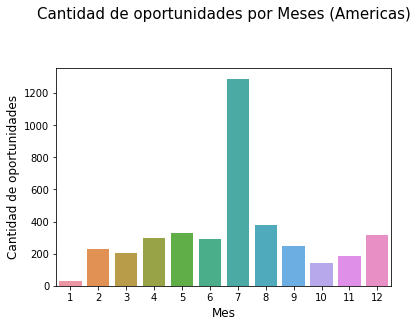

In [72]:
#Gráfico oportunidades por Mes (Americas)
grafico_am = sns.barplot(data = Am_mes , x = 'Mes',  y= 'Mes_count',  dodge=False)
grafico_am.set_title('Cantidad de oportunidades por Meses (Americas)', fontsize = '15', y = 1.2)
grafico_am.set_ylabel('Cantidad de oportunidades', fontsize = '12')
grafico_am.set_xlabel ('Mes', fontsize = '12') 

In [73]:
america_mes = df_Americas.groupby(['Mes', 'Account_Name']).agg({'Mes': ['count']})
level0_mesa = america_mes.columns.get_level_values(0)
level1_mesa = america_mes.columns.get_level_values(1)
america_mes.columns = level0_mesa + '_' + level1_mesa
america_mes = america_mes.reset_index()
america_mes = america_mes.sort_values(by = 'Mes_count', ascending = False)
america_mes.head(10)

,Mes,Account_Name,Mes_count
211,7,Account_Name_25,752
200,7,Account_Name_1448,101
71,4,Account_Name_1794,91
17,2,Account_Name_1378,89
55,3,Account_Name_46,73
309,9,Account_Name_433,67
387,12,Account_Name_167,62
249,8,Account_Name_1409,58
381,12,Account_Name_151,54
140,5,Account_Name_742,52


In [74]:
#APAC
df_APAC= df[df['Region']== 'APAC']
df_APAC['Mes']= pd.DatetimeIndex(df_APAC['Account_Created_Date']).month
df_APAC

/home/agustin18/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A,Mes
23,28524,APAC,India,1,1,1,1,0,Bureaucratic_Code_4,10/13/2015,...,2016,NaT,3,USD,1621851.0,USD,1621851.0,Closed Won,Prod_Category_A_None,10
24,4915,APAC,India,1,1,0,0,0,Bureaucratic_Code_4,12/9/2015,...,2016,NaT,0,USD,221650.0,USD,221650.0,Closed Lost,Prod_Category_A_None,12
77,4937,APAC,India,1,1,0,0,0,Bureaucratic_Code_4,12/14/2015,...,2016,NaT,0,USD,3920.0,USD,3920.0,Closed Won,Prod_Category_A_None,12
133,21588,APAC,India,1,1,0,0,0,Bureaucratic_Code_4,9/9/2014,...,2016,NaT,0,USD,109760.0,USD,109760.0,Closed Won,Prod_Category_A_None,9
136,18985,APAC,India,1,1,0,0,0,Bureaucratic_Code_4,7/28/2013,...,2016,NaT,0,USD,17550.0,USD,17550.0,Closed Lost,Prod_Category_A_None,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16835,28338,APAC,India,1,0,0,0,0,Bureaucratic_Code_5,9/9/2015,...,2016,NaT,0,USD,70200.0,USD,70200.0,Closed Won,Prod_Category_A_None,9
16858,10309,APAC,Indonesia,1,0,1,0,0,Bureaucratic_Code_5,2/1/2016,...,2017,NaT,9,USD,4954950.0,USD,4055000.0,Closed Lost,Prod_Category_A_None,2
16859,10315,APAC,Indonesia,1,0,1,0,0,Bureaucratic_Code_5,2/1/2016,...,2017,NaT,0,USD,4055000.0,USD,4055000.0,Closed Lost,Prod_Category_A_None,2
16860,10572,APAC,Indonesia,0,0,0,0,0,Bureaucratic_Code_3,3/16/2017,...,2017,NaT,1,USD,362520.0,USD,362520.0,Closed Won,Prod_Category_A_None,3


In [75]:
Ap_mes = df_APAC.groupby(['Mes']).agg({'Mes': ['count']})
level0_ap = Ap_mes.columns.get_level_values(0)
level1_ap = Ap_mes.columns.get_level_values(1)
Ap_mes.columns = level0_ap + '_' + level1_ap
Ap_mes = Ap_mes.reset_index()
Ap_mes = Ap_mes.sort_values(by = 'Mes_count', ascending = False)
Ap_mes

,Mes,Mes_count
8,9,830
6,7,407
9,10,401
0,1,337
4,5,223
5,6,215
1,2,195
3,4,176
7,8,156
2,3,137


Text(0.5, 0, 'Mes')

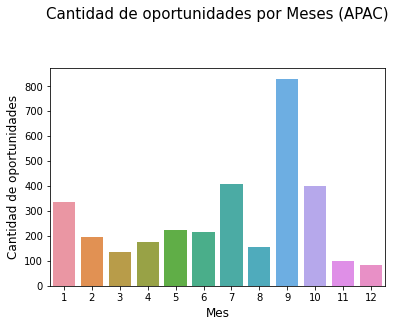

In [76]:
#Gráfico oportunidades por Mes (APAC)
grafico_ap = sns.barplot(data = Ap_mes , x = 'Mes',  y= 'Mes_count',  dodge=False)
grafico_ap.set_title('Cantidad de oportunidades por Meses (APAC)', fontsize = '15', y = 1.2)
grafico_ap.set_ylabel('Cantidad de oportunidades', fontsize = '12')
grafico_ap.set_xlabel ('Mes', fontsize = '12') 


In [77]:
ap_mes = df_APAC.groupby(['Mes', 'Account_Name']).agg({'Mes': ['count']})
level0_apm = ap_mes.columns.get_level_values(0)
level1_apm = ap_mes.columns.get_level_values(1)
ap_mes.columns = level0_apm + '_' + level1_apm
ap_mes = ap_mes.reset_index()
ap_mes = ap_mes.sort_values(by = 'Mes_count', ascending = False)
ap_mes.head(10)

,Mes,Account_Name,Mes_count
431,9,Account_Name_1642,397
454,9,Account_Name_660,231
39,1,Account_Name_931,215
478,10,Account_Name_1440,182
311,7,Account_Name_1440,135
153,4,Account_Name_1411,93
70,2,Account_Name_266,91
312,7,Account_Name_1468,84
493,10,Account_Name_1904,62
564,12,Account_Name_1376,39


In [78]:
#Middle East
df_Middle= df[df['Region']== 'Middle East']
df_Middle['Mes']= pd.DatetimeIndex(df_Middle['Account_Created_Date']).month
df_Middle

/home/agustin18/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A,Mes
745,5700,Middle East,Kuwait,1,1,1,1,0,Bureaucratic_Code_4,1/8/2017,...,2017,NaT,1,USD,431971.20,USD,431971.20,Closed Lost,Prod_Category_A_None,1
994,18723,Middle East,KSA,1,0,1,0,0,Bureaucratic_Code_5,7/28/2013,...,2017,NaT,120,USD,41999989.50,USD,41999989.50,Closed Lost,Prod_Category_A_None,7
995,6816,Middle East,KSA,1,0,1,0,0,Bureaucratic_Code_5,1/24/2017,...,2017,NaT,120,USD,41999989.50,USD,41999989.50,Closed Lost,Prod_Category_A_None,1
998,6822,Middle East,None,1,0,1,0,0,Bureaucratic_Code_5,1/24/2017,...,2017,NaT,120,USD,41999989.50,USD,41999989.50,Closed Lost,Prod_Category_A_None,1
999,6839,Middle East,UAE (Dubai),1,1,1,1,0,Bureaucratic_Code_4,1/24/2017,...,2017,NaT,0,USD,56441.70,USD,56441.70,Closed Lost,Prod_Category_A_None,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15879,12949,Middle East,Jordan,1,0,1,0,0,Bureaucratic_Code_5,3/17/2016,...,2019,NaT,0,USD,121605.00,USD,121605.00,Closed Won,Prod_Category_A_None,3
15927,9292,Middle East,Oman,1,1,1,1,0,Bureaucratic_Code_4,11/13/2018,...,2019,NaT,2,USD,722304.00,USD,722304.00,Negotiation,Prod_Category_A_None,11
15992,12942,Middle East,Jordan,1,1,1,1,0,Bureaucratic_Code_4,3/17/2016,...,2019,NaT,0,USD,128901.30,USD,264993.38,Negotiation,Prod_Category_A_None,3
15993,12965,Middle East,Jordan,1,1,1,1,0,Bureaucratic_Code_4,3/17/2016,...,2019,NaT,1,USD,136092.08,USD,264993.38,Negotiation,Prod_Category_A_None,3


In [79]:
Me_mes = df_Middle.groupby(['Mes']).agg({'Mes': ['count']})
level0_me = Me_mes.columns.get_level_values(0)
level1_me = Me_mes.columns.get_level_values(1)
Me_mes.columns = level0_am + '_' + level1_am
Me_mes = Me_mes.reset_index()
Me_mes = Me_mes.sort_values(by = 'Mes_count', ascending = False)
Me_mes

,Mes,Mes_count
2,3,49
1,2,33
8,10,23
0,1,18
4,5,15
5,6,15
6,7,10
9,11,10
3,4,5
7,8,3


Text(0.5, 0, 'Mes')

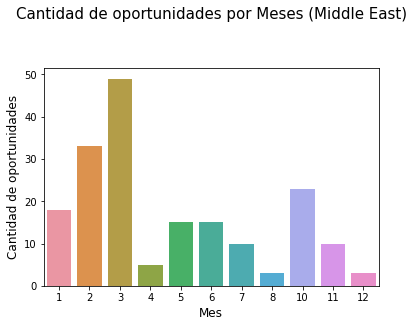

In [80]:
#Gráfico oportunidades por Mes (Middle East)
grafico_me = sns.barplot(data = Me_mes , x = 'Mes',  y= 'Mes_count',  dodge=False)
grafico_me.set_title('Cantidad de oportunidades por Meses (Middle East)', fontsize = '15', y = 1.2)
grafico_me.set_ylabel('Cantidad de oportunidades', fontsize = '12')
grafico_me.set_xlabel ('Mes', fontsize = '12') 


In [81]:
####
#Empezamos a trabajar con los datos de oportunidades exitosas y sus proporciones
#Decidimos no tomar los Datos de la varaibale Stage que sea Quaification, Proposal o Negociation por ser muy pocos en comparación del total.
#También, el hecho de centrarnos en Closed Won y Closed Lost nos permitirá acceder más rápido a conclusiones que tengan que ver con la proporción de éxito

In [82]:
#Filtramos por Closed Won y Closed Lost
df_filtro_exito = df[df['Stage']== 'Closed Won']
df_filtro_exito

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,6/16/2015,...,Q1,2016,NaT,0,EUR,48230.0,EUR,48230.00,Closed Won,Prod_Category_A_None
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,...,Q1,2016,NaT,0,USD,83865.6,USD,83865.60,Closed Won,Prod_Category_A_None
7,27455,Americas,NW America,1,1,1,1,0,Bureaucratic_Code_4,4/21/2015,...,Q1,2016,NaT,0,USD,50688.0,USD,50688.00,Closed Won,Prod_Category_A_None
23,28524,APAC,India,1,1,1,1,0,Bureaucratic_Code_4,10/13/2015,...,Q1,2016,NaT,3,USD,1621851.0,USD,1621851.00,Closed Won,Prod_Category_A_None
63,13392,EMEA,Germany,0,0,0,0,0,Bureaucratic_Code_4,7/27/2013,...,Q1,2016,NaT,0,EUR,103350.0,EUR,103350.00,Closed Won,Prod_Category_A_None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16937,17683,EMEA,Germany,0,0,0,0,0,Bureaucratic_Code_4,7/27/2013,...,Q1,2016,NaT,1,EUR,413400.0,EUR,528918.75,Closed Won,Prod_Category_A_None
16939,18324,EMEA,Norway,1,1,0,0,0,Bureaucratic_Code_4,7/27/2013,...,Q2,2016,NaT,1,EUR,401700.0,EUR,401700.00,Closed Won,Prod_Category_A_None
16942,8781,EMEA,Austria,1,1,1,1,0,Bureaucratic_Code_4,1/15/2016,...,Q1,2016,NaT,0,EUR,103350.0,EUR,299715.00,Closed Won,Prod_Category_A_None
16943,8786,EMEA,Austria,1,1,1,1,0,Bureaucratic_Code_4,1/15/2016,...,Q2,2016,NaT,0,EUR,93015.0,EUR,299715.00,Closed Won,Prod_Category_A_None


In [83]:
df_exitosos_region = df_filtro_exito.groupby(['Region']).agg({'Region':['count']})
level0_ex = df_exitosos_region.columns.get_level_values(0)
level1_ex = df_exitosos_region.columns.get_level_values(1)
df_exitosos_region.columns = level0_ex + '_' + level1_ex
df_exitosos_region = df_exitosos_region.reset_index()
df_exitosos_region = df_exitosos_region.rename(columns = {'Region_count':'Region_exitos'})
df_exitosos_region

,Region,Region_exitos
0,APAC,1896
1,Americas,1793
2,EMEA,2471
3,Japan,3323
4,Middle East,50


In [84]:
#Filtro fracasos
df_filtro_fracaso= df[df['Stage']== 'Closed Lost']
df_filtro_fracaso

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,...,Q2,2016,NaT,10,EUR,5272800.00,EUR,5272800.0,Closed Lost,Prod_Category_A_None
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Q1,2018,NaT,14,USD,7421881.50,USD,7421881.5,Closed Lost,Prod_Category_A_None
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Q1,2018,NaT,25,USD,13357192.50,USD,13357192.5,Closed Lost,Prod_Category_A_None
5,16802,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Q1,2018,NaT,28,USD,14838277.50,USD,14838277.5,Closed Lost,Prod_Category_A_None
6,16799,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Q1,2017,NaT,7,USD,2659494.60,USD,2659494.6,Closed Lost,Prod_Category_A_None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16938,28767,EMEA,Germany,1,0,0,0,0,Bureaucratic_Code_5,12/4/2015,...,Q3,2016,NaT,3,EUR,1307775.00,EUR,1307775.0,Closed Lost,Prod_Category_A_None
16940,20827,Americas,NE America,1,0,0,0,0,Bureaucratic_Code_5,6/16/2014,...,Q4,2016,NaT,20,USD,10751580.00,USD,21332500.0,Closed Lost,Prod_Category_A_None
16941,20830,Americas,NE America,1,0,0,0,0,Bureaucratic_Code_5,6/16/2014,...,Q4,2016,NaT,20,USD,10580920.00,USD,21332500.0,Closed Lost,Prod_Category_A_None
16945,28561,Americas,NE America,1,1,1,1,0,Bureaucratic_Code_4,10/20/2015,...,Q2,2016,NaT,4,USD,2346796.88,USD,0.0,Closed Lost,Prod_Category_A_None


In [85]:
df_fracaso_region = df_filtro_fracaso.groupby(['Region']).agg({'Region':['count']})
level0_fr = df_fracaso_region.columns.get_level_values(0)
level1_fr = df_fracaso_region.columns.get_level_values(1)
df_fracaso_region.columns = level0_fr + '_' + level1_fr
df_fracaso_region = df_fracaso_region.reset_index()
df_fracaso_region = df_fracaso_region.rename(columns = {'Region_count':'Region_fracasos'})
df_fracaso_region

,Region,Region_fracasos
0,APAC,1355
1,Americas,2140
2,EMEA,2189
3,Japan,1546
4,Middle East,120


In [283]:
union = df_exitosos_region.merge(df_fracaso_region, how = 'outer', on = 'Region')
union['Total'] = union['Region_exitos'] + union['Region_fracasos']
union['Porcentaje_exito'] = union['Region_exitos']*100 / union['Total']
decimals = 2    
union['Porcentaje_exito'] = union['Porcentaje_exito'].apply(lambda x: round(x, decimals))
union


,Region,Region_exitos,Region_fracasos,Total,Porcentaje_exito
0,APAC,1896,1355,3251,58.32
1,Americas,1793,2140,3933,45.59
2,EMEA,2471,2189,4660,53.03
3,Japan,3323,1546,4869,68.25
4,Middle East,50,120,170,29.41


Text(0.5, 1.1, 'Relación Oportunidades totales vs porcentaje de ventas exitosas sobre el total de oportunidades(Región)')

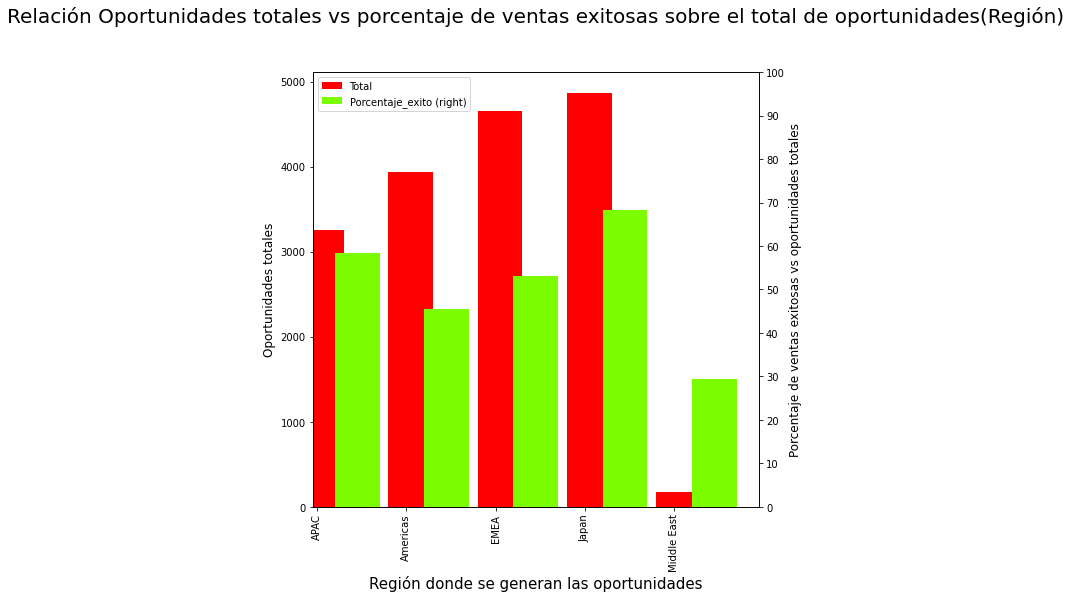

In [87]:
ax=union.plot(kind='bar', x= 'Region' , y='Total', color = 'red', position = 0.4)

ax2=union.plot(kind='bar', x='Region', y='Porcentaje_exito',figsize=[8,8], color = 'lawngreen', secondary_y=True,ax=ax, position = -0.4)
ax2.set_yticks(range(0,110, 10))

ax.set_xlabel('Región donde se generan las oportunidades', fontsize=15)
ax.set_ylabel('Oportunidades totales', fontsize=12)
ax2.set_ylabel('Porcentaje de ventas exitosas vs oportunidades totales', fontsize=12)
ax.set_title('Relación Oportunidades totales vs porcentaje de ventas exitosas sobre el total de oportunidades(Región)',y = 1.1,  fontsize=20)


Text(0.5, 0, 'Porcentaje de Éxito')

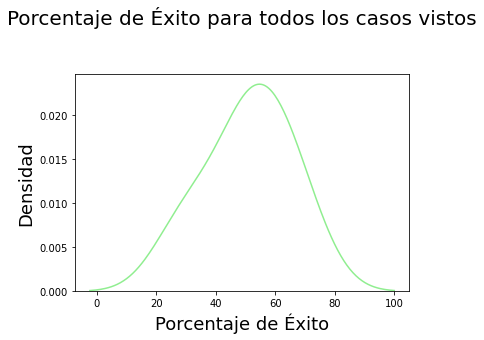

In [88]:
dist_exito = sns.kdeplot(data = union, x = 'Porcentaje_exito', color  = 'lightgreen')
dist_exito.set_title("Porcentaje de Éxito para todos los casos vistos", fontsize=20, y = 1.2)
dist_exito.set_ylabel("Densidad", fontsize=18)
dist_exito.set_xlabel("Porcentaje de Éxito", fontsize=18)




In [89]:
#Una vez visto de forma general el Porcentaje de éxito por regiones, podremos adentrarnos y sacar más conclusiones.
#Podremos por ejemplo, ver quiénes son los vendedores que mayor porcentaje de efectividad tienen por región,
#Cuáles son los clientes que concretan más oportunidades o cuáles son los países en donde se aprecia mayor porcentaje de oportunidades comerciales concretadas.


In [90]:
#Clientes tienen un mayor porcentaje de ventas concretadas por Región.
#Clientes con compras exitosas JAPAN
df_exitosos_cliente_Ja = df_filtro_exito[df_filtro_exito['Region']=='Japan']
df_exitosos_cliente = df_filtro_exito.groupby(['Account_Name']).agg({'Account_Name':['count']})
level0_cex = df_exitosos_cliente.columns.get_level_values(0)
level1_cex = df_exitosos_cliente.columns.get_level_values(1)
df_exitosos_cliente.columns = level0_cex + '_' + level1_cex
df_exitosos_cliente = df_exitosos_cliente.reset_index()
df_exitosos_cliente = df_exitosos_cliente.rename(columns = {'Account_Name_count':'Cliente_exitos'})
df_exitosos_cliente = df_exitosos_cliente.sort_values(by = 'Cliente_exitos', ascending = False)
df_exitosos_cliente

,Account_Name,Cliente_exitos
338,Account_Name_1888,1018
320,Account_Name_1836,795
425,Account_Name_25,539
376,Account_Name_1991,520
181,Account_Name_1508,323
...,...,...
344,Account_Name_1899,1
335,Account_Name_1880,1
334,Account_Name_188,1
1,Account_Name_100,1


In [91]:
#Clientes con compras fallidas JAPAN


In [92]:
df_fracaso_cliente_Ja = df_filtro_fracaso[df_filtro_fracaso['Region']=='Japan']
df_fracaso_cliente = df_filtro_fracaso.groupby(['Account_Name']).agg({'Account_Name':['count']})
level0_cfr = df_fracaso_cliente.columns.get_level_values(0)
level1_cfr = df_fracaso_cliente.columns.get_level_values(1)
df_fracaso_cliente.columns = level0_cfr + '_' + level1_cfr
df_fracaso_cliente = df_fracaso_cliente.reset_index()
df_fracaso_cliente = df_fracaso_cliente.rename(columns = {'Account_Name_count':'Cliente_Fracaso'})
df_fracaso_cliente_jp = df_fracaso_cliente.sort_values(by = 'Cliente_Fracaso', ascending = False)
df_fracaso_cliente_jp

,Account_Name,Cliente_Fracaso
662,Account_Name_1888,1104
828,Account_Name_25,213
479,Account_Name_1642,193
1052,Account_Name_533,93
627,Account_Name_1836,91
...,...,...
651,Account_Name_1872,1
654,Account_Name_1877,1
656,Account_Name_1879,1
658,Account_Name_1881,1


In [93]:
#Qué tanto se está aprovechando a los clientes que mayores oportunidades comerciales producen en Japón
union_clientes_jp = df_exitosos_cliente.merge(df_fracaso_cliente_jp, how = 'outer', on = 'Account_Name')
union_clientes_jp = union_clientes_jp.fillna(0)
union_clientes_jp['Total'] = union_clientes_jp['Cliente_exitos'] + union_clientes_jp['Cliente_Fracaso']
union_clientes_jp['Porcentaje_exito'] = union_clientes_jp['Cliente_exitos']*100 / union_clientes_jp['Total']
decimals = 2    
union_clientes_jp['Porcentaje_exito'] = union_clientes_jp['Porcentaje_exito'].apply(lambda x: round(x, decimals))

union_clientes_jp = union_clientes_jp.sort_values(by = 'Total', ascending= False )
union_clientes_jp_total = union_clientes_jp.sort_values(by = 'Total', ascending= False )
union_clientes_jp = union_clientes_jp.head(15) 
union_clientes_jp.describe()



,Cliente_exitos,Cliente_Fracaso,Total,Porcentaje_exito
count,15.000000,15.000000,15.000000,15.000000
mean,324.000000,139.066667,463.066667,76.891333
std,275.833801,273.625779,512.872787,14.789303
min,87.000000,12.000000,127.000000,47.970000
25%,144.500000,31.000000,183.500000,66.775000
50%,204.000000,50.000000,283.000000,82.330000
75%,421.500000,92.000000,491.500000,89.235000
max,1018.000000,1104.000000,2122.000000,94.420000


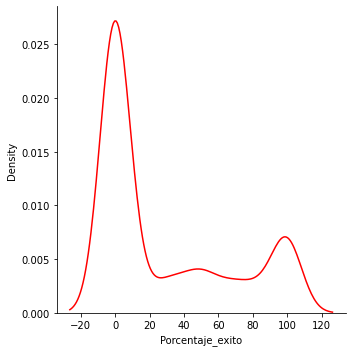

In [94]:
dist_exito = sns.displot(data = union_clientes_jp_total, x = 'Porcentaje_exito', color  = 'red', kind="kde")

Text(0.5, 1, 'Ventas Exitosas vs porcentaje de ventas exitosas sobre el total de oportunidades (JAPAN - 15 Clientes que más oportunidades generaron)')

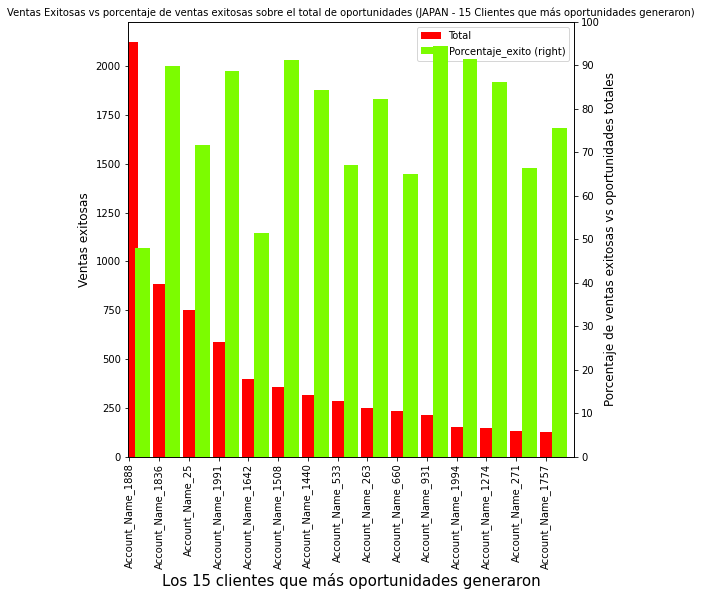

In [95]:
ax=union_clientes_jp.plot(kind='bar', x= 'Account_Name' , y='Total', color = 'red', position = 0.4)

ax2=union_clientes_jp.plot(kind='bar', x='Account_Name', y='Porcentaje_exito', figsize=[8,8],color = 'lawngreen', secondary_y=True,ax=ax, position = -0.4)
ax2.set_yticks(range(0,110, 10))
ax.set_xlabel('Los 15 clientes que más oportunidades generaron', fontsize=15)
ax.set_ylabel('Ventas exitosas', fontsize=12)
ax2.set_ylabel('Porcentaje de ventas exitosas vs oportunidades totales', fontsize=12)
ax.set_title('Ventas Exitosas vs porcentaje de ventas exitosas sobre el total de oportunidades (JAPAN - 15 Clientes que más oportunidades generaron)',y = 1,  fontsize=10)


In [96]:
#Clientes EMEA - Porcentajes clientes 
#Clientes con compras exitosas EMEA
df_exitosos_cliente_EM = df_filtro_exito[df_filtro_exito['Region']=='EMEA']
df_exitosos_cliente_EM = df_exitosos_cliente_EM.groupby(['Account_Name']).agg({'Account_Name':['count']})
level0_em = df_exitosos_cliente_EM.columns.get_level_values(0)
level1_em = df_exitosos_cliente_EM.columns.get_level_values(1)
df_exitosos_cliente_EM.columns = level0_em + '_' + level1_em
df_exitosos_cliente_EM = df_exitosos_cliente_EM.reset_index()
df_exitosos_cliente_EM = df_exitosos_cliente_EM.rename(columns = {'Account_Name_count':'Cliente_exitos'})
df_exitosos_cliente_EM = df_exitosos_cliente_EM.sort_values(by = 'Cliente_exitos', ascending = False)
df_exitosos_cliente_EM

,Account_Name,Cliente_exitos
108,Account_Name_263,205
139,Account_Name_533,190
85,Account_Name_1994,139
23,Account_Name_1274,124
62,Account_Name_1693,118
...,...,...
58,Account_Name_1676,1
116,Account_Name_312,1
56,Account_Name_1667,1
54,Account_Name_1661,1


In [97]:
#Clientes con compras fallidas EMEA
df_fracaso_cliente_EM = df_filtro_fracaso[df_filtro_fracaso['Region']=='EMEA']
df_fracaso_cliente_EM = df_exitosos_cliente_EM.groupby(['Account_Name']).agg({'Account_Name':['count']})
level0_emfr = df_fracaso_cliente_EM.columns.get_level_values(0)
level1_emfr = df_fracaso_cliente_EM.columns.get_level_values(1)
df_fracaso_cliente_EM.columns = level0_emfr + '_' + level1_emfr
df_fracaso_cliente_EM = df_fracaso_cliente_EM.reset_index()
df_fracaso_cliente_EM = df_fracaso_cliente_EM.rename(columns = {'Account_Name_count':'Cliente_Fracaso'})
df_fracaso_cliente_EM = df_fracaso_cliente_EM.sort_values(by = 'Cliente_Fracaso', ascending = False)
df_fracaso_cliente_EM

,Account_Name,Cliente_Fracaso
0,Account_Name_1012,1
97,Account_Name_2051,1
123,Account_Name_368,1
124,Account_Name_397,1
125,Account_Name_403,1
...,...,...
67,Account_Name_1757,1
68,Account_Name_1773,1
69,Account_Name_1788,1
70,Account_Name_1805,1


In [98]:
#Qué tanto se está aprovechando a los clientes que mayores oportunidades comerciales producen en EMEA
union_clientes_em = df_exitosos_cliente_EM.merge(df_fracaso_cliente_EM, how = 'outer', on = 'Account_Name')
union_clientes_em = union_clientes_em.fillna(0)
union_clientes_em['Total'] = union_clientes_em['Cliente_exitos'] + union_clientes_em['Cliente_Fracaso']
union_clientes_em['Porcentaje_exito'] = union_clientes_em['Cliente_exitos']*100 / union_clientes_em['Total']
decimals = 2    
union_clientes_em['Porcentaje_exito'] = union_clientes_em['Porcentaje_exito'].apply(lambda x: round(x, decimals))

union_clientes_em = union_clientes_em.sort_values(by = 'Total', ascending= False )
union_clientes_em_total = union_clientes_em.sort_values(by = 'Total', ascending= False )
union_clientes_em = union_clientes_em.head(15) 
union_clientes_em

,Account_Name,Cliente_exitos,Cliente_Fracaso,Total,Porcentaje_exito
0,Account_Name_263,205,1,206,99.51
1,Account_Name_533,190,1,191,99.48
2,Account_Name_1994,139,1,140,99.29
3,Account_Name_1274,124,1,125,99.20
4,Account_Name_1693,118,1,119,99.16
5,Account_Name_1757,96,1,97,98.97
6,Account_Name_271,87,1,88,98.86
7,Account_Name_686,76,1,77,98.70
8,Account_Name_1067,66,1,67,98.51
9,Account_Name_1313,57,1,58,98.28


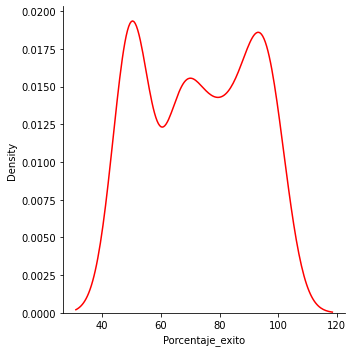

In [99]:
dist_exito = sns.displot(data = union_clientes_em_total, x = 'Porcentaje_exito', color  = 'red', kind="kde")

Text(0.5, 1, 'Ventas Exitosas vs porcentaje de ventas exitosas sobre el total de oportunidades (EMEA - 15 Clientes que más oportunidades generaron)')

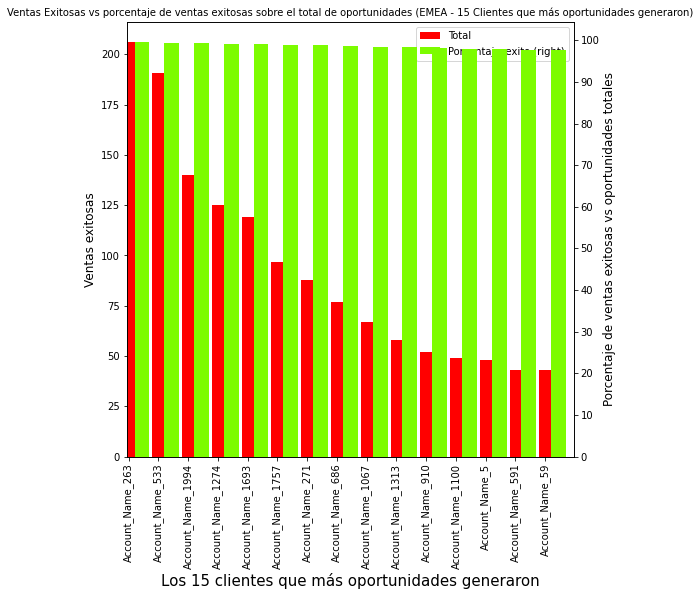

In [100]:
ax=union_clientes_em.plot(kind='bar', x= 'Account_Name' , y='Total', color = 'red', position = 0.4)

ax2=union_clientes_em.plot(kind='bar', x='Account_Name', y='Porcentaje_exito', figsize=[8,8],color = 'lawngreen', secondary_y=True,ax=ax, position = -0.4)
ax2.set_yticks(range(0,110, 10))
ax.set_xlabel('Los 15 clientes que más oportunidades generaron', fontsize=15)
ax.set_ylabel('Ventas exitosas', fontsize=12)
ax2.set_ylabel('Porcentaje de ventas exitosas vs oportunidades totales', fontsize=12)
ax.set_title('Ventas Exitosas vs porcentaje de ventas exitosas sobre el total de oportunidades (EMEA - 15 Clientes que más oportunidades generaron)',y = 1,  fontsize=10)


In [101]:
#Clientes Americas - Porcentajes clientes 
#Clientes con compras exitosas America
df_exitosos_cliente_am = df_filtro_exito[df_filtro_exito['Region']=='Americas']
df_exitosos_cliente_am = df_exitosos_cliente_am.groupby(['Account_Name']).agg({'Account_Name':['count']})
level0_ame = df_exitosos_cliente_am.columns.get_level_values(0)
level1_ame = df_exitosos_cliente_am.columns.get_level_values(1)
df_exitosos_cliente_am.columns = level0_ame + '_' + level1_ame
df_exitosos_cliente_am = df_exitosos_cliente_am.reset_index()
df_exitosos_cliente_am = df_exitosos_cliente_am.rename(columns = {'Account_Name_count':'Cliente_exitos'})
df_exitosos_cliente_am = df_exitosos_cliente_am.sort_values(by = 'Cliente_exitos', ascending = False)
df_exitosos_cliente_am

,Account_Name,Cliente_exitos
116,Account_Name_25,539
47,Account_Name_1448,85
94,Account_Name_1794,74
42,Account_Name_1409,50
151,Account_Name_742,42
...,...,...
138,Account_Name_558,1
40,Account_Name_1390,1
141,Account_Name_610,1
39,Account_Name_1384,1


In [102]:
#Clientes con compras fallidas Americas
df_fracaso_cliente_am = df_filtro_fracaso[df_filtro_fracaso['Region']=='Americas']
df_fracaso_cliente_am = df_exitosos_cliente_am.groupby(['Account_Name']).agg({'Account_Name':['count']})
level0_amfr = df_fracaso_cliente_am.columns.get_level_values(0)
level1_amfr = df_fracaso_cliente_am.columns.get_level_values(1)
df_fracaso_cliente_am.columns = level0_amfr + '_' + level1_amfr
df_fracaso_cliente_am = df_fracaso_cliente_am.reset_index()
df_fracaso_cliente_am = df_fracaso_cliente_am.rename(columns = {'Account_Name_count':'Cliente_Fracaso'})
df_fracaso_cliente_am = df_fracaso_cliente_am.sort_values(by = 'Cliente_Fracaso', ascending = False)
df_fracaso_cliente_am

,Account_Name,Cliente_Fracaso
0,Account_Name_1006,1
122,Account_Name_359,1
104,Account_Name_1926,1
105,Account_Name_1928,1
106,Account_Name_1943,1
...,...,...
55,Account_Name_1580,1
56,Account_Name_1581,1
57,Account_Name_1586,1
58,Account_Name_159,1


In [103]:
#Qué tanto se está aprovechando a los clientes que mayores oportunidades comerciales producen en América
union_clientes_am = df_exitosos_cliente_am.merge(df_fracaso_cliente_am, how = 'outer', on = 'Account_Name')
union_clientes_am = union_clientes_am.fillna(0)
union_clientes_am['Total'] = union_clientes_am['Cliente_exitos'] + union_clientes_am['Cliente_Fracaso']
union_clientes_am['Porcentaje_exito'] = union_clientes_am['Cliente_exitos']*100 / union_clientes_am['Total']
decimals = 2    
union_clientes_am['Porcentaje_exito'] = union_clientes_am['Porcentaje_exito'].apply(lambda x: round(x, decimals))

union_clientes_am = union_clientes_am.sort_values(by = 'Total', ascending= False )
union_clientes_am_total = union_clientes_am.sort_values(by = 'Total', ascending= False )
union_clientes_am = union_clientes_am.head(15) 
union_clientes_am

,Account_Name,Cliente_exitos,Cliente_Fracaso,Total,Porcentaje_exito
0,Account_Name_25,539,1,540,99.81
1,Account_Name_1448,85,1,86,98.84
2,Account_Name_1794,74,1,75,98.67
3,Account_Name_1409,50,1,51,98.04
4,Account_Name_742,42,1,43,97.67
5,Account_Name_46,34,1,35,97.14
6,Account_Name_1378,32,1,33,96.97
7,Account_Name_1662,31,1,32,96.88
8,Account_Name_376,30,1,31,96.77
9,Account_Name_1804,29,1,30,96.67


Text(0.5, 1, 'Ventas Exitosas vs porcentaje de ventas exitosas sobre el total de oportunidades (Americas - 15 Clientes que más oportunidades generaron)')

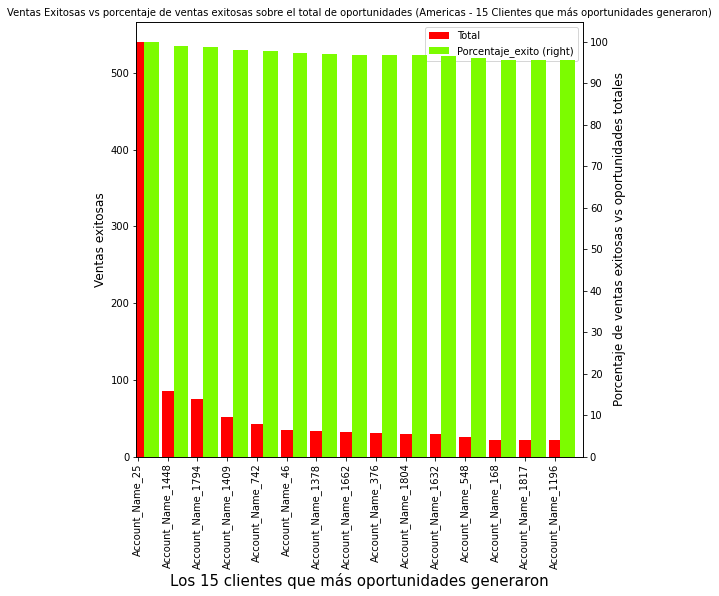

In [104]:
ax=union_clientes_am.plot(kind='bar', x= 'Account_Name' , y='Total', color = 'red', position = 0.4)

ax2=union_clientes_am.plot(kind='bar', x='Account_Name', y='Porcentaje_exito', figsize=[8,8],color = 'lawngreen', secondary_y=True,ax=ax, position = -0.4)
ax2.set_yticks(range(0,110, 10))
ax.set_xlabel('Los 15 clientes que más oportunidades generaron', fontsize=15)
ax.set_ylabel('Ventas exitosas', fontsize=12)
ax2.set_ylabel('Porcentaje de ventas exitosas vs oportunidades totales', fontsize=12)
ax.set_title('Ventas Exitosas vs porcentaje de ventas exitosas sobre el total de oportunidades (Americas - 15 Clientes que más oportunidades generaron)',y = 1,  fontsize=10)


In [105]:
#Clientes APAC - Porcentajes clientes 
#Clientes con compras exitosas APAC
df_exitosos_cliente_ap = df_filtro_exito[df_filtro_exito['Region']=='APAC']
df_exitosos_cliente_ap = df_exitosos_cliente_ap.groupby(['Account_Name']).agg({'Account_Name':['count']})
level0_ap = df_exitosos_cliente_ap.columns.get_level_values(0)
level1_ap = df_exitosos_cliente_ap.columns.get_level_values(1)
df_exitosos_cliente_ap.columns = level0_ap + '_' + level1_ap
df_exitosos_cliente_ap = df_exitosos_cliente_ap.reset_index()
df_exitosos_cliente_ap = df_exitosos_cliente_ap.rename(columns = {'Account_Name_count':'Cliente_exitos'})
df_exitosos_cliente_ap = df_exitosos_cliente_ap.sort_values(by = 'Cliente_exitos', ascending = False)
df_exitosos_cliente_ap

,Account_Name,Cliente_exitos
55,Account_Name_1440,267
83,Account_Name_1642,204
232,Account_Name_931,203
201,Account_Name_660,150
52,Account_Name_1411,87
...,...,...
113,Account_Name_1852,1
116,Account_Name_1872,1
119,Account_Name_1878,1
1,Account_Name_1001,1


In [106]:
#Clientes con compras fallidas APAC
df_fracaso_cliente_ap = df_filtro_fracaso[df_filtro_fracaso['Region']=='APAC']
df_fracaso_cliente_ap = df_exitosos_cliente_ap.groupby(['Account_Name']).agg({'Account_Name':['count']})
level0_apfr = df_fracaso_cliente_ap.columns.get_level_values(0)
level1_apfr = df_fracaso_cliente_ap.columns.get_level_values(1)
df_fracaso_cliente_ap.columns = level0_apfr + '_' + level1_apfr
df_fracaso_cliente_ap = df_fracaso_cliente_ap.reset_index()
df_fracaso_cliente_ap = df_fracaso_cliente_ap.rename(columns = {'Account_Name_count':'Cliente_Fracaso'})
df_fracaso_cliente_ap = df_fracaso_cliente_ap.sort_values(by = 'Cliente_Fracaso', ascending = False)
df_fracaso_cliente_ap

,Account_Name,Cliente_Fracaso
0,Account_Name_0,1
121,Account_Name_1886,1
153,Account_Name_246,1
154,Account_Name_266,1
155,Account_Name_275,1
...,...,...
85,Account_Name_1657,1
86,Account_Name_1664,1
87,Account_Name_1666,1
88,Account_Name_1669,1


In [107]:
#Qué tanto se está aprovechando a los clientes que mayores oportunidades comerciales producen en APAC
union_clientes_ap = df_exitosos_cliente_ap.merge(df_fracaso_cliente_ap, how = 'outer', on = 'Account_Name')
union_clientes_ap = union_clientes_ap.fillna(0)
union_clientes_ap['Total'] = union_clientes_ap['Cliente_exitos'] + union_clientes_ap['Cliente_Fracaso']
union_clientes_ap['Porcentaje_exito'] = union_clientes_ap['Cliente_exitos']*100 / union_clientes_ap['Total']
decimals = 2    
union_clientes_ap['Porcentaje_exito'] = union_clientes_ap['Porcentaje_exito'].apply(lambda x: round(x, decimals))

union_clientes_ap = union_clientes_ap.sort_values(by = 'Total', ascending= False )
union_clientes_ap = union_clientes_ap.head(15) 
union_clientes_ap

,Account_Name,Cliente_exitos,Cliente_Fracaso,Total,Porcentaje_exito
0,Account_Name_1440,267,1,268,99.63
1,Account_Name_1642,204,1,205,99.51
2,Account_Name_931,203,1,204,99.51
3,Account_Name_660,150,1,151,99.34
4,Account_Name_1411,87,1,88,98.86
5,Account_Name_1468,82,1,83,98.80
6,Account_Name_266,69,1,70,98.57
7,Account_Name_1904,60,1,61,98.36
8,Account_Name_1857,31,1,32,96.88
9,Account_Name_828,30,1,31,96.77


Text(0.5, 1, 'Ventas Exitosas vs porcentaje de ventas exitosas sobre el total de oportunidades (APAC - 15 Clientes que más oportunidades generaron)')

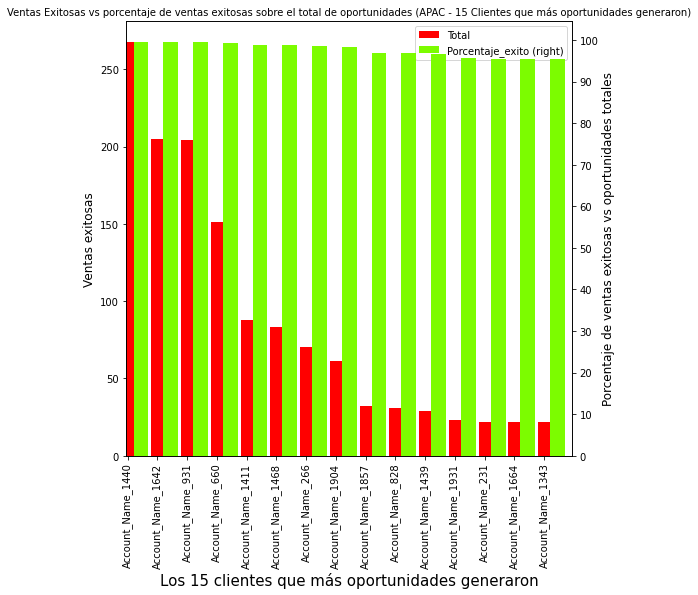

In [108]:
ax=union_clientes_ap.plot(kind='bar', x= 'Account_Name' , y='Total', color = 'red', position = 0.4)

ax2=union_clientes_ap.plot(kind='bar', x='Account_Name', y='Porcentaje_exito', figsize=[8,8],color = 'lawngreen', secondary_y=True,ax=ax, position = -0.4)
ax2.set_yticks(range(0,110, 10))
ax.set_xlabel('Los 15 clientes que más oportunidades generaron', fontsize=15)
ax.set_ylabel('Ventas exitosas', fontsize=12)
ax2.set_ylabel('Porcentaje de ventas exitosas vs oportunidades totales', fontsize=12)
ax.set_title('Ventas Exitosas vs porcentaje de ventas exitosas sobre el total de oportunidades (APAC - 15 Clientes que más oportunidades generaron)',y = 1,  fontsize=10)


In [109]:
#Clientes Middle East - Porcentajes clientes 
#Clientes con compras exitosas Middle East
df_exitosos_cliente_md = df_filtro_exito[df_filtro_exito['Region']=='Middle East']
df_exitosos_cliente_md = df_exitosos_cliente_md.groupby(['Account_Name']).agg({'Account_Name':['count']})
level0_md = df_exitosos_cliente_md.columns.get_level_values(0)
level1_md = df_exitosos_cliente_md.columns.get_level_values(1)
df_exitosos_cliente_md.columns = level0_md + '_' + level1_md
df_exitosos_cliente_md = df_exitosos_cliente_md.reset_index()
df_exitosos_cliente_md = df_exitosos_cliente_md.rename(columns = {'Account_Name_count':'Cliente_exitos'})
df_exitosos_cliente_md = df_exitosos_cliente_md.sort_values(by = 'Cliente_exitos', ascending = False)
df_exitosos_cliente_md

,Account_Name,Cliente_exitos
10,Account_Name_415,17
9,Account_Name_306,9
6,Account_Name_1180,4
8,Account_Name_1686,3
13,Account_Name_751,3
2,Account_Name_1047,2
14,Account_Name_908,2
15,Account_Name_99,2
0,Account_Name_100,1
1,Account_Name_1032,1


In [110]:
#Clientes con compras fallidas Middle East
df_fracaso_cliente_md = df_filtro_fracaso[df_filtro_fracaso['Region']=='Middle East']
df_fracaso_cliente_md = df_exitosos_cliente_md.groupby(['Account_Name']).agg({'Account_Name':['count']})
level0_mdfr = df_fracaso_cliente_md.columns.get_level_values(0)
level1_mdfr = df_fracaso_cliente_md.columns.get_level_values(1)
df_fracaso_cliente_md.columns = level0_mdfr + '_' + level1_mdfr
df_fracaso_cliente_md = df_fracaso_cliente_md.reset_index()
df_fracaso_cliente_md = df_fracaso_cliente_md.rename(columns = {'Account_Name_count':'Cliente_Fracaso'})
df_fracaso_cliente_md = df_fracaso_cliente_md.sort_values(by = 'Cliente_Fracaso', ascending = False)
df_fracaso_cliente_md

,Account_Name,Cliente_Fracaso
0,Account_Name_100,1
1,Account_Name_1032,1
2,Account_Name_1047,1
3,Account_Name_1144,1
4,Account_Name_116,1
5,Account_Name_117,1
6,Account_Name_1180,1
7,Account_Name_1181,1
8,Account_Name_1686,1
9,Account_Name_306,1


In [111]:
#Qué tanto se está aprovechando a los clientes que mayores oportunidades comerciales producen en APAC
union_clientes_md = df_exitosos_cliente_md.merge(df_fracaso_cliente_md, how = 'outer', on = 'Account_Name')
union_clientes_md['Total'] = union_clientes_md['Cliente_exitos'] + union_clientes_md['Cliente_Fracaso']
union_clientes_md['Porcentaje_exito'] = union_clientes_md['Cliente_exitos']*100 / union_clientes_md['Total']
decimals = 2    
union_clientes_md['Porcentaje_exito'] = union_clientes_md['Porcentaje_exito'].apply(lambda x: round(x, decimals))
union_clientes_md = union_clientes_md.sort_values(by = 'Total', ascending= False )
union_clientes_md 

,Account_Name,Cliente_exitos,Cliente_Fracaso,Total,Porcentaje_exito
0,Account_Name_415,17,1,18,94.44
1,Account_Name_306,9,1,10,90.00
2,Account_Name_1180,4,1,5,80.00
3,Account_Name_1686,3,1,4,75.00
4,Account_Name_751,3,1,4,75.00
5,Account_Name_1047,2,1,3,66.67
6,Account_Name_908,2,1,3,66.67
7,Account_Name_99,2,1,3,66.67
8,Account_Name_100,1,1,2,50.00
9,Account_Name_1032,1,1,2,50.00


Text(0.5, 1, 'Ventas Exitosas vs porcentaje de ventas exitosas sobre el total de oportunidades (Middle East - 15 Clientes que más oportunidades generaron)')

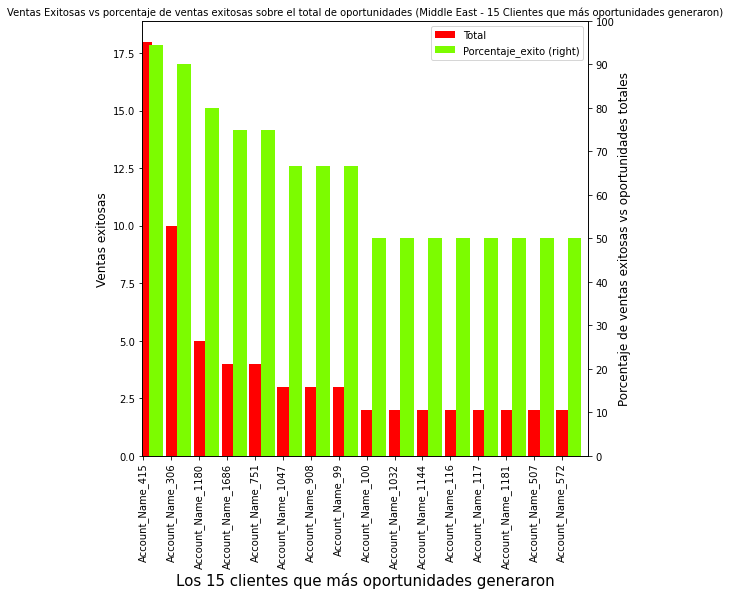

In [112]:
ax=union_clientes_md.plot(kind='bar', x= 'Account_Name' , y='Total', color = 'red', position = 0.4)

ax2=union_clientes_md.plot(kind='bar', x='Account_Name', y='Porcentaje_exito', figsize=[8,8],color = 'lawngreen', secondary_y=True,ax=ax, position = -0.4)
ax2.set_yticks(range(0,110, 10))
ax.set_xlabel('Los 15 clientes que más oportunidades generaron', fontsize=15)
ax.set_ylabel('Ventas exitosas', fontsize=12)
ax2.set_ylabel('Porcentaje de ventas exitosas vs oportunidades totales', fontsize=12)
ax.set_title('Ventas Exitosas vs porcentaje de ventas exitosas sobre el total de oportunidades (Middle East - 15 Clientes que más oportunidades generaron)',y = 1,  fontsize=10)



In [113]:
#Vendedores más efectivos por Región
#JAPAN
#Vendedores con compras exitosas JAPAN
df_exitosos_vendedor_jp = df_filtro_exito[df_filtro_exito['Region']=='Japan']
df_exitosos_vendedor_jp = df_exitosos_vendedor_jp.groupby(['Account_Owner']).agg({'Account_Owner':['count']})
level0_jpv = df_exitosos_vendedor_jp.columns.get_level_values(0)
level1_jpv = df_exitosos_vendedor_jp.columns.get_level_values(1)
df_exitosos_vendedor_jp.columns = level0_jpv + '_' + level1_jpv
df_exitosos_vendedor_jp = df_exitosos_vendedor_jp.reset_index()
df_exitosos_vendedor_jp = df_exitosos_vendedor_jp.rename(columns = {'Account_Owner_count':'Vendedor_exitos'})
df_exitosos_vendedor_jp = df_exitosos_vendedor_jp.sort_values(by = 'Vendedor_exitos', ascending = False)
df_exitosos_vendedor_jp

,Account_Owner,Vendedor_exitos
1,Person_Name_50,2423
0,Person_Name_32,571
4,Person_Name_66,187
2,Person_Name_55,86
3,Person_Name_61,56


In [114]:
#Vendedores con compras fallidas JAPAN
df_fracaso_vendedor_jp = df_filtro_fracaso[df_filtro_fracaso['Region']=='Japan']
df_fracaso_vendedor_jp = df_fracaso_vendedor_jp.groupby(['Account_Owner']).agg({'Account_Owner':['count']})
level0_jpf = df_fracaso_vendedor_jp.columns.get_level_values(0)
level1_jpf = df_fracaso_vendedor_jp.columns.get_level_values(1)
df_fracaso_vendedor_jp.columns = level0_jpf + '_' + level1_jpf
df_fracaso_vendedor_jp = df_fracaso_vendedor_jp.reset_index()
df_fracaso_vendedor_jp = df_fracaso_vendedor_jp.rename(columns = {'Account_Owner_count':'Vendedor_fracasos'})
df_fracaso_vendedor_jp = df_fracaso_vendedor_jp.sort_values(by = 'Vendedor_fracasos', ascending = False)
df_fracaso_vendedor_jp

,Account_Owner,Vendedor_fracasos
5,Person_Name_50,1299
1,Person_Name_32,110
9,Person_Name_66,64
6,Person_Name_55,43
8,Person_Name_61,15
2,Person_Name_41,6
0,Person_Name_18,4
3,Person_Name_44,3
4,Person_Name_47,1
7,Person_Name_59,1


In [115]:

union_vendedor_jp = df_exitosos_vendedor_jp.merge(df_fracaso_vendedor_jp, how = 'outer', on = 'Account_Owner')
union_vendedor_jp = union_vendedor_jp.fillna(0)
union_vendedor_jp ['Total'] = union_vendedor_jp ['Vendedor_exitos'] + union_vendedor_jp ['Vendedor_fracasos']
union_vendedor_jp ['Porcentaje_exito'] = union_vendedor_jp['Vendedor_exitos']*100 / union_vendedor_jp['Total']
decimals = 2    
union_vendedor_jp ['Porcentaje_exito'] = union_vendedor_jp['Porcentaje_exito'].apply(lambda x: round(x, decimals))
union_vendedor_jp  = union_vendedor_jp .sort_values(by = 'Total', ascending= False )
union_vendedor_jp  

,Account_Owner,Vendedor_exitos,Vendedor_fracasos,Total,Porcentaje_exito
0,Person_Name_50,2423.0,1299,3722.0,65.10
1,Person_Name_32,571.0,110,681.0,83.85
2,Person_Name_66,187.0,64,251.0,74.50
3,Person_Name_55,86.0,43,129.0,66.67
4,Person_Name_61,56.0,15,71.0,78.87
5,Person_Name_41,0.0,6,6.0,0.00
6,Person_Name_18,0.0,4,4.0,0.00
7,Person_Name_44,0.0,3,3.0,0.00
8,Person_Name_47,0.0,1,1.0,0.00
9,Person_Name_59,0.0,1,1.0,0.00


Text(0.5, 1, 'Oportunidades Totales vs porcentaje de ventas exitosas sobre el total de oportunidades (JAPAN-Vendedores)')

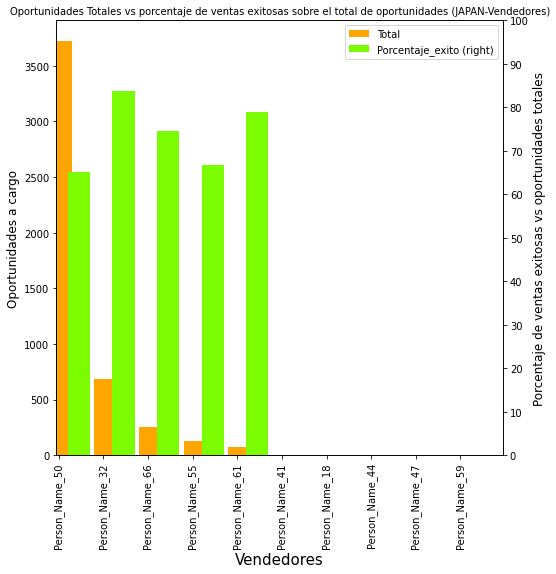

In [116]:
ax=union_vendedor_jp.plot(kind='bar', x='Account_Owner' , y='Total', color = 'orange', position = 0.4)

ax2=union_vendedor_jp.plot(kind='bar', x='Account_Owner', y='Porcentaje_exito', figsize=[8,8],color = 'lawngreen', secondary_y=True,ax=ax, position = -0.4)
ax2.set_yticks(range(0,110, 10))
ax.set_xlabel('Vendedores', fontsize=15)
ax.set_ylabel('Oportunidades a cargo', fontsize=12)
ax2.set_ylabel('Porcentaje de ventas exitosas vs oportunidades totales', fontsize=12)
ax.set_title('Oportunidades Totales vs porcentaje de ventas exitosas sobre el total de oportunidades (JAPAN-Vendedores)',y = 1,  fontsize=10)


In [117]:
#Vendedores más efectivos por Región
#EMEA
#Vendedores con compras exitosas EMEA
df_exitosos_vendedor_em = df_filtro_exito[df_filtro_exito['Region']=='EMEA']
df_exitosos_vendedor_em = df_exitosos_vendedor_em.groupby(['Account_Owner']).agg({'Account_Owner':['count']})
level0_m = df_exitosos_vendedor_em.columns.get_level_values(0)
level1_m = df_exitosos_vendedor_em.columns.get_level_values(1)
df_exitosos_vendedor_em.columns = level0_m + '_' + level1_m
df_exitosos_vendedor_em = df_exitosos_vendedor_em.reset_index()
df_exitosos_vendedor_em = df_exitosos_vendedor_em.rename(columns = {'Account_Owner_count':'Vendedor_exitos'})
df_exitosos_vendedor_em = df_exitosos_vendedor_em.sort_values(by = 'Vendedor_exitos', ascending = False)
df_exitosos_vendedor_em

,Account_Owner,Vendedor_exitos
0,Person_Name_13,886
3,Person_Name_18,597
8,Person_Name_4,301
10,Person_Name_42,201
4,Person_Name_2,183
2,Person_Name_16,126
13,Person_Name_62,84
12,Person_Name_51,43
1,Person_Name_14,22
7,Person_Name_39,18


In [118]:
#Vendedores con compras fallidas EMEA
df_fracaso_vendedor_em = df_filtro_fracaso[df_filtro_fracaso['Region']=='EMEA']
df_fracaso_vendedor_em = df_fracaso_vendedor_em.groupby(['Account_Owner']).agg({'Account_Owner':['count']})
level0_mf = df_fracaso_vendedor_em.columns.get_level_values(0)
level1_mf = df_fracaso_vendedor_em.columns.get_level_values(1)
df_fracaso_vendedor_em.columns = level0_mf + '_' + level1_mf
df_fracaso_vendedor_em = df_fracaso_vendedor_em.reset_index()
df_fracaso_vendedor_em = df_fracaso_vendedor_em.rename(columns = {'Account_Owner_count':'Vendedor_fracasos'})
df_fracaso_vendedor_em = df_fracaso_vendedor_em.sort_values(by = 'Vendedor_fracasos', ascending = False)
df_fracaso_vendedor_em

,Account_Owner,Vendedor_fracasos
4,Person_Name_18,492
1,Person_Name_13,422
14,Person_Name_4,357
3,Person_Name_16,313
5,Person_Name_2,148
16,Person_Name_42,103
20,Person_Name_62,90
13,Person_Name_39,79
18,Person_Name_51,65
2,Person_Name_14,52


In [119]:

union_vendedor_em = df_exitosos_vendedor_em.merge(df_fracaso_vendedor_em, how = 'outer', on = 'Account_Owner')
union_vendedor_em = union_vendedor_em.fillna(0)
union_vendedor_em ['Total'] = union_vendedor_em ['Vendedor_exitos'] + union_vendedor_em ['Vendedor_fracasos']
union_vendedor_em ['Porcentaje_exito'] = union_vendedor_em['Vendedor_exitos']*100 / union_vendedor_em['Total']
decimals = 2    
union_vendedor_em ['Porcentaje_exito'] = union_vendedor_em['Porcentaje_exito'].apply(lambda x: round(x, decimals))
union_vendedor_em  = union_vendedor_em.sort_values(by = 'Total', ascending= False )
union_vendedor_em  

,Account_Owner,Vendedor_exitos,Vendedor_fracasos,Total,Porcentaje_exito
0,Person_Name_13,886.0,422,1308.0,67.74
1,Person_Name_18,597.0,492,1089.0,54.82
2,Person_Name_4,301.0,357,658.0,45.74
5,Person_Name_16,126.0,313,439.0,28.70
4,Person_Name_2,183.0,148,331.0,55.29
3,Person_Name_42,201.0,103,304.0,66.12
6,Person_Name_62,84.0,90,174.0,48.28
7,Person_Name_51,43.0,65,108.0,39.81
9,Person_Name_39,18.0,79,97.0,18.56
8,Person_Name_14,22.0,52,74.0,29.73


Text(0.5, 1, 'Oportunidades Totales vs porcentaje de ventas exitosas sobre el total de oportunidades (EMEA-Vendedores)')

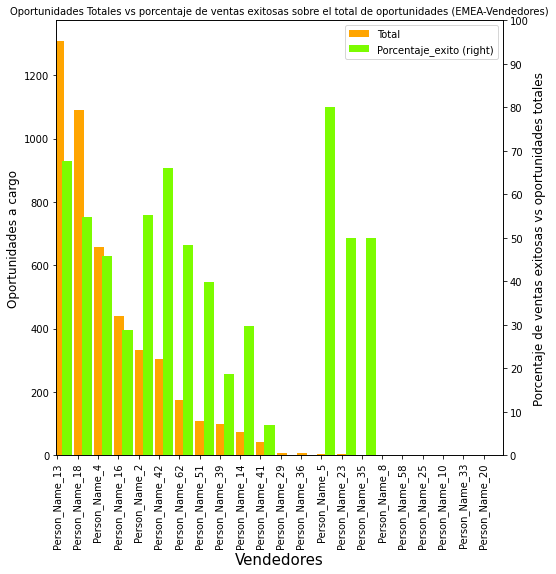

In [120]:
ax=union_vendedor_em.plot(kind='bar', x='Account_Owner' , y='Total', color = 'orange', position = 0.4)

ax2=union_vendedor_em.plot(kind='bar', x='Account_Owner', y='Porcentaje_exito', figsize=[8,8],color = 'lawngreen', secondary_y=True,ax=ax, position = -0.4)
ax2.set_yticks(range(0,110, 10))
ax.set_xlabel('Vendedores', fontsize=15)
ax.set_ylabel('Oportunidades a cargo', fontsize=12)
ax2.set_ylabel('Porcentaje de ventas exitosas vs oportunidades totales', fontsize=12)
ax.set_title('Oportunidades Totales vs porcentaje de ventas exitosas sobre el total de oportunidades (EMEA-Vendedores)',y = 1,  fontsize=10)


In [121]:
#Vendedores más efectivos por Región
#Americas
#Vendedores con compras exitosas Americas
df_exitosos_vendedor_am = df_filtro_exito[df_filtro_exito['Region']=='Americas']
df_exitosos_vendedor_am = df_exitosos_vendedor_am.groupby(['Account_Owner']).agg({'Account_Owner':['count']})
level0_a = df_exitosos_vendedor_am.columns.get_level_values(0)
level1_a = df_exitosos_vendedor_am.columns.get_level_values(1)
df_exitosos_vendedor_am.columns = level0_a + '_' + level1_a
df_exitosos_vendedor_am = df_exitosos_vendedor_am.reset_index()
df_exitosos_vendedor_am = df_exitosos_vendedor_am.rename(columns = {'Account_Owner_count':'Vendedor_exitos'})
df_exitosos_vendedor_am = df_exitosos_vendedor_am.sort_values(by = 'Vendedor_exitos', ascending = False)
df_exitosos_vendedor_am

,Account_Owner,Vendedor_exitos
7,Person_Name_8,763
6,Person_Name_64,380
0,Person_Name_3,233
4,Person_Name_46,127
3,Person_Name_45,117
2,Person_Name_38,116
1,Person_Name_33,39
8,Person_Name_9,16
5,Person_Name_58,2


In [122]:
#Vendedores con compras fallidas Americas
df_fracaso_vendedor_am = df_filtro_fracaso[df_filtro_fracaso['Region']=='Americas']
df_fracaso_vendedor_am = df_fracaso_vendedor_am.groupby(['Account_Owner']).agg({'Account_Owner':['count']})
level0_ma = df_fracaso_vendedor_am.columns.get_level_values(0)
level1_ma = df_fracaso_vendedor_am.columns.get_level_values(1)
df_fracaso_vendedor_am.columns = level0_ma + '_' + level1_ma
df_fracaso_vendedor_am = df_fracaso_vendedor_am.reset_index()
df_fracaso_vendedor_am = df_fracaso_vendedor_am.rename(columns = {'Account_Owner_count':'Vendedor_fracasos'})
df_fracaso_vendedor_am = df_fracaso_vendedor_am.sort_values(by = 'Vendedor_fracasos', ascending = False)
df_fracaso_vendedor_am

,Account_Owner,Vendedor_fracasos
2,Person_Name_3,642
11,Person_Name_8,513
7,Person_Name_46,254
6,Person_Name_45,240
4,Person_Name_38,206
10,Person_Name_64,189
3,Person_Name_33,46
12,Person_Name_9,34
0,Person_Name_13,5
1,Person_Name_25,5


In [123]:

union_vendedor_am = df_exitosos_vendedor_am.merge(df_fracaso_vendedor_am, how = 'outer', on = 'Account_Owner')
union_vendedor_am = union_vendedor_am.fillna(0)
union_vendedor_am ['Total'] = union_vendedor_am ['Vendedor_exitos'] + union_vendedor_am ['Vendedor_fracasos']
union_vendedor_am ['Porcentaje_exito'] = union_vendedor_am['Vendedor_exitos']*100 / union_vendedor_am['Total']
decimals = 2    
union_vendedor_am ['Porcentaje_exito'] = union_vendedor_am['Porcentaje_exito'].apply(lambda x: round(x, decimals))
union_vendedor_am  = union_vendedor_am.sort_values(by = 'Total', ascending= False )
union_vendedor_am  

,Account_Owner,Vendedor_exitos,Vendedor_fracasos,Total,Porcentaje_exito
0,Person_Name_8,763.0,513,1276.0,59.80
2,Person_Name_3,233.0,642,875.0,26.63
1,Person_Name_64,380.0,189,569.0,66.78
3,Person_Name_46,127.0,254,381.0,33.33
4,Person_Name_45,117.0,240,357.0,32.77
5,Person_Name_38,116.0,206,322.0,36.02
6,Person_Name_33,39.0,46,85.0,45.88
7,Person_Name_9,16.0,34,50.0,32.00
8,Person_Name_58,2.0,4,6.0,33.33
9,Person_Name_13,0.0,5,5.0,0.00


Text(0.5, 1, 'Oportunidades Totales vs porcentaje de ventas exitosas sobre el total de oportunidades (Americas-Vendedores)')

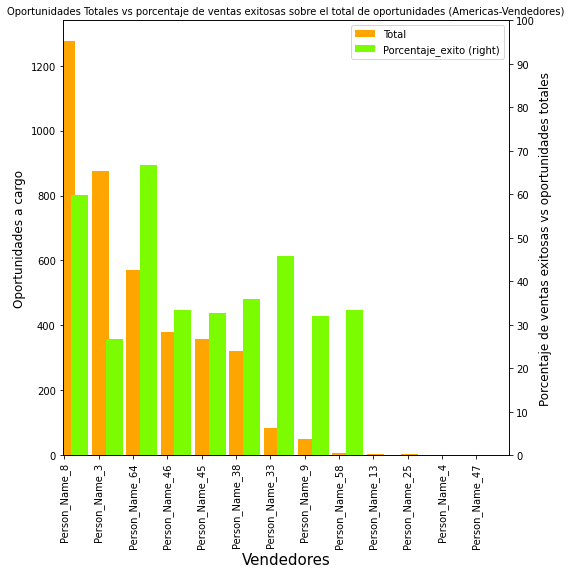

In [124]:
ax=union_vendedor_am.plot(kind='bar', x='Account_Owner' , y='Total', color = 'orange', position = 0.4)

ax2=union_vendedor_am.plot(kind='bar', x='Account_Owner', y='Porcentaje_exito', figsize=[8,8],color = 'lawngreen', secondary_y=True,ax=ax, position = -0.4)
ax2.set_yticks(range(0,110, 10))
ax.set_xlabel('Vendedores', fontsize=15)
ax.set_ylabel('Oportunidades a cargo', fontsize=12)
ax2.set_ylabel('Porcentaje de ventas exitosas vs oportunidades totales', fontsize=12)
ax.set_title('Oportunidades Totales vs porcentaje de ventas exitosas sobre el total de oportunidades (Americas-Vendedores)',y = 1,  fontsize=10)


In [125]:
#Vendedores más efectivos por Región
#APAC
#Vendedores con compras exitosas APAC
df_exitosos_vendedor_ap = df_filtro_exito[df_filtro_exito['Region']=='APAC']
df_exitosos_vendedor_ap = df_exitosos_vendedor_ap.groupby(['Account_Owner']).agg({'Account_Owner':['count']})
level0_m = df_exitosos_vendedor_ap.columns.get_level_values(0)
level1_m = df_exitosos_vendedor_ap.columns.get_level_values(1)
df_exitosos_vendedor_ap.columns = level0_m + '_' + level1_m
df_exitosos_vendedor_ap = df_exitosos_vendedor_ap.reset_index()
df_exitosos_vendedor_ap = df_exitosos_vendedor_ap.rename(columns = {'Account_Owner_count':'Vendedor_exitos'})
df_exitosos_vendedor_ap = df_exitosos_vendedor_ap.sort_values(by = 'Vendedor_exitos', ascending = False)
df_exitosos_vendedor_ap

,Account_Owner,Vendedor_exitos
2,Person_Name_43,727
10,Person_Name_65,504
5,Person_Name_52,141
1,Person_Name_21,132
4,Person_Name_49,105
6,Person_Name_54,96
8,Person_Name_60,66
7,Person_Name_59,59
9,Person_Name_63,54
3,Person_Name_44,9


In [126]:
#Vendedores con compras fallidas APAC
df_fracaso_vendedor_ap = df_filtro_fracaso[df_filtro_fracaso['Region']=='APAC']
df_fracaso_vendedor_ap = df_fracaso_vendedor_ap.groupby(['Account_Owner']).agg({'Account_Owner':['count']})
level0_mf = df_fracaso_vendedor_ap.columns.get_level_values(0)
level1_mf = df_fracaso_vendedor_ap.columns.get_level_values(1)
df_fracaso_vendedor_ap.columns = level0_mf + '_' + level1_mf
df_fracaso_vendedor_ap = df_fracaso_vendedor_ap.reset_index()
df_fracaso_vendedor_ap = df_fracaso_vendedor_ap.rename(columns = {'Account_Owner_count':'Vendedor_fracasos'})
df_fracaso_vendedor_ap = df_fracaso_vendedor_ap.sort_values(by = 'Vendedor_fracasos', ascending = False)
df_fracaso_vendedor_ap

,Account_Owner,Vendedor_fracasos
8,Person_Name_43,508
16,Person_Name_60,159
15,Person_Name_59,141
18,Person_Name_65,127
10,Person_Name_49,95
13,Person_Name_54,82
17,Person_Name_63,81
9,Person_Name_44,45
4,Person_Name_21,34
12,Person_Name_52,31


In [127]:

union_vendedor_ap = df_exitosos_vendedor_ap.merge(df_fracaso_vendedor_ap, how = 'outer', on = 'Account_Owner')
union_vendedor_ap = union_vendedor_ap.fillna(0)
union_vendedor_ap ['Total'] = union_vendedor_ap ['Vendedor_exitos'] + union_vendedor_ap ['Vendedor_fracasos']
union_vendedor_ap ['Porcentaje_exito'] = union_vendedor_ap['Vendedor_exitos']*100 / union_vendedor_ap['Total']
decimals = 2    
union_vendedor_ap ['Porcentaje_exito'] = union_vendedor_ap['Porcentaje_exito'].apply(lambda x: round(x, decimals))
union_vendedor_ap  = union_vendedor_ap.sort_values(by = 'Total', ascending= False )
union_vendedor_ap  

,Account_Owner,Vendedor_exitos,Vendedor_fracasos,Total,Porcentaje_exito
0,Person_Name_43,727.0,508,1235.0,58.87
1,Person_Name_65,504.0,127,631.0,79.87
6,Person_Name_60,66.0,159,225.0,29.33
4,Person_Name_49,105.0,95,200.0,52.50
7,Person_Name_59,59.0,141,200.0,29.50
5,Person_Name_54,96.0,82,178.0,53.93
2,Person_Name_52,141.0,31,172.0,81.98
3,Person_Name_21,132.0,34,166.0,79.52
8,Person_Name_63,54.0,81,135.0,40.00
9,Person_Name_44,9.0,45,54.0,16.67


Text(0.5, 1, 'Oportunidades totales vs porcentaje de ventas exitosas sobre el total de oportunidades (APAC-Vendedores)')

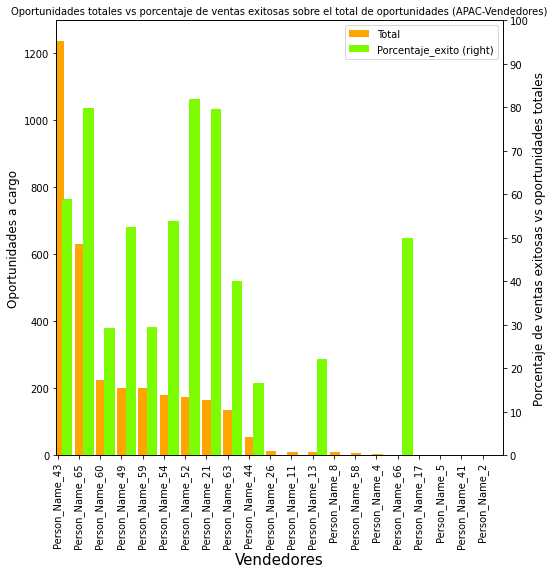

In [128]:
ax=union_vendedor_ap.plot(kind='bar', x='Account_Owner' , y='Total', color = 'orange', position = 0.4)

ax2=union_vendedor_ap.plot(kind='bar', x='Account_Owner', y='Porcentaje_exito', figsize=[8,8],color = 'lawngreen', secondary_y=True,ax=ax, position = -0.4)
ax2.set_yticks(range(0,110, 10))
ax.set_xlabel('Vendedores', fontsize=15)
ax.set_ylabel('Oportunidades a cargo', fontsize=12)
ax2.set_ylabel('Porcentaje de ventas exitosas vs oportunidades totales', fontsize=12)
ax.set_title('Oportunidades totales vs porcentaje de ventas exitosas sobre el total de oportunidades (APAC-Vendedores)',y = 1,  fontsize=10)


In [129]:
#Vendedores más efectivos por Región
#Middle East
#Vendedores con compras exitosas Middle East
df_exitosos_vendedor_mid = df_filtro_exito[df_filtro_exito['Region']=='Middle East']
df_exitosos_vendedor_mid = df_exitosos_vendedor_mid.groupby(['Account_Owner']).agg({'Account_Owner':['count']})
level0_m = df_exitosos_vendedor_mid.columns.get_level_values(0)
level1_m = df_exitosos_vendedor_mid.columns.get_level_values(1)
df_exitosos_vendedor_mid.columns = level0_m + '_' + level1_m
df_exitosos_vendedor_mid = df_exitosos_vendedor_mid.reset_index()
df_exitosos_vendedor_mid = df_exitosos_vendedor_mid.rename(columns = {'Account_Owner_count':'Vendedor_exitos'})
df_exitosos_vendedor_mid = df_exitosos_vendedor_mid.sort_values(by = 'Vendedor_exitos', ascending = False)
df_exitosos_vendedor_mid

,Account_Owner,Vendedor_exitos
3,Person_Name_5,44
0,Person_Name_13,3
2,Person_Name_39,2
1,Person_Name_34,1


In [130]:
#Vendedores con compras fallidas APAC
df_fracaso_vendedor_mid = df_filtro_fracaso[df_filtro_fracaso['Region']=='Middle East']
df_fracaso_vendedor_mid = df_fracaso_vendedor_mid.groupby(['Account_Owner']).agg({'Account_Owner':['count']})
level0_mid = df_fracaso_vendedor_mid.columns.get_level_values(0)
level1_mid = df_fracaso_vendedor_mid.columns.get_level_values(1)
df_fracaso_vendedor_mid.columns = level0_mf + '_' + level1_mf
df_fracaso_vendedor_mid = df_fracaso_vendedor_mid.reset_index()
df_fracaso_vendedor_mid = df_fracaso_vendedor_mid.rename(columns = {'Account_Owner_count':'Vendedor_fracasos'})
df_fracaso_vendedor_mid = df_fracaso_vendedor_mid.sort_values(by = 'Vendedor_fracasos', ascending = False)
df_fracaso_vendedor_mid

,Account_Owner,Vendedor_fracasos
5,Person_Name_5,102
3,Person_Name_39,5
7,Person_Name_62,5
0,Person_Name_13,2
2,Person_Name_34,2
1,Person_Name_2,1
4,Person_Name_41,1
6,Person_Name_60,1
8,Person_Name_66,1


In [131]:
#Qué tanto se está aprovechando a los clientes que mayores oportunidades comerciales producen en APAC
union_vendedor_mid = df_exitosos_vendedor_mid.merge(df_fracaso_vendedor_mid, how = 'outer', on = 'Account_Owner')
union_vendedor_mid = union_vendedor_mid.fillna(0)
union_vendedor_mid ['Total'] = union_vendedor_mid ['Vendedor_exitos'] + union_vendedor_mid ['Vendedor_fracasos']
union_vendedor_mid ['Porcentaje_exito'] = union_vendedor_mid['Vendedor_exitos']*100 / union_vendedor_mid['Total']
decimals = 2    
union_vendedor_mid ['Porcentaje_exito'] = union_vendedor_mid['Porcentaje_exito'].apply(lambda x: round(x, decimals))
union_vendedor_mid = union_vendedor_mid.sort_values(by = 'Total', ascending= False )
union_vendedor_mid 

,Account_Owner,Vendedor_exitos,Vendedor_fracasos,Total,Porcentaje_exito
0,Person_Name_5,44.0,102,146.0,30.14
2,Person_Name_39,2.0,5,7.0,28.57
1,Person_Name_13,3.0,2,5.0,60.00
4,Person_Name_62,0.0,5,5.0,0.00
3,Person_Name_34,1.0,2,3.0,33.33
5,Person_Name_2,0.0,1,1.0,0.00
6,Person_Name_41,0.0,1,1.0,0.00
7,Person_Name_60,0.0,1,1.0,0.00
8,Person_Name_66,0.0,1,1.0,0.00


Text(0.5, 1, 'Oportunidades totales vs porcentaje de ventas exitosas sobre el total de oportunidades (Middle East-Vendedores)')

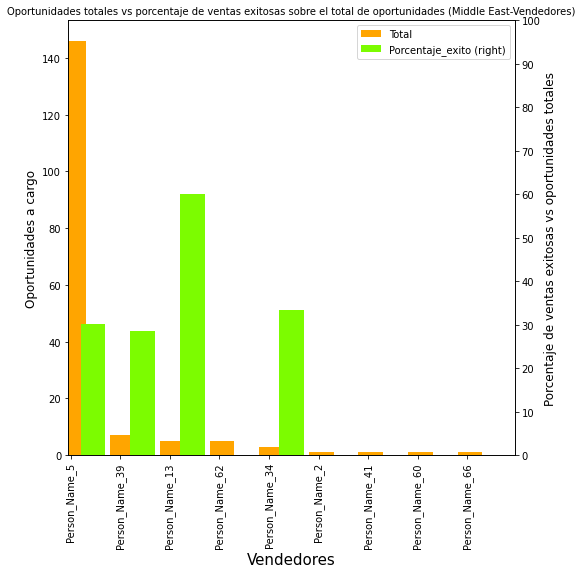

In [132]:
ax=union_vendedor_mid.plot(kind='bar', x='Account_Owner' , y='Total', color = 'orange', position = 0.4)

ax2=union_vendedor_mid.plot(kind='bar', x='Account_Owner', y='Porcentaje_exito', figsize=[8,8],color = 'lawngreen', secondary_y=True,ax=ax, position = -0.4)
ax2.set_yticks(range(0,110, 10))
ax.set_xlabel('Vendedores', fontsize=15)
ax.set_ylabel('Oportunidades a cargo', fontsize=12)
ax2.set_ylabel('Porcentaje de ventas exitosas vs oportunidades totales', fontsize=12)
ax.set_title('Oportunidades totales vs porcentaje de ventas exitosas sobre el total de oportunidades (Middle East-Vendedores)',y = 1,  fontsize=10)


In [133]:
#Países más efectivos

df_exito_pais = df_filtro_exito[['Billing_Country', 'Stage']].groupby('Billing_Country').count()
df_exito_pais = df_exito_pais.sort_values(by=['Stage'], ascending = False)
df_exito_pais

,Stage
Billing_Country,
Japan,3323
United States,1755
Germany,1122
Australia,695
Singapore,318
Netherlands,315
India,284
China,203
Spain,192


In [134]:
#Fracaso país
df_fracaso_pais = df_filtro_fracaso[['Billing_Country', 'Stage']].groupby('Billing_Country').count()
df_fracaso_pais = df_fracaso_pais.sort_values(by=['Stage'], ascending = False)
df_fracaso_pais

,Stage
Billing_Country,
United States,2035
Japan,1533
Germany,855
Australia,470
India,387
...,...
Libya,1
Liechtenstein,1
Malaysia,1


In [135]:
union = df_exito_pais.merge(df_fracaso_pais, how = 'outer', on = 'Billing_Country')
union = union.rename(columns = {'Stage_x': 'Exito', 'Stage_y':'Fracaso'})
union['Total'] = union ['Exito'] + union['Fracaso'] 
union = union.head(20)
union['Porcentaje_de_exito'] = (union['Exito']*100 / union['Total'])
union_mas_porcentaje = union.sort_values(by=['Total'], ascending = False)
union_mas_porcentaje = union_mas_porcentaje.reset_index()
union_mas_porcentaje

,Billing_Country,Exito,Fracaso,Total,Porcentaje_de_exito
0,Japan,3323.0,1533.0,4856.0,68.430807
1,United States,1755.0,2035.0,3790.0,46.306069
2,Germany,1122.0,855.0,1977.0,56.752656
3,Australia,695.0,470.0,1165.0,59.656652
4,India,284.0,387.0,671.0,42.324888
5,Netherlands,315.0,248.0,563.0,55.950266
6,Singapore,318.0,114.0,432.0,73.611111
7,France,111.0,285.0,396.0,28.030303
8,Spain,192.0,125.0,317.0,60.567823
9,Italy,152.0,143.0,295.0,51.525424


In [136]:
cols = ['Total', 'Billing_Country',  'Porcentaje_de_exito']
union_mas_porcentaje = union_mas_porcentaje[cols]
union_mas_porcentaje = union_mas_porcentaje.reset_index()
union_mas_porcentaje

,index,Total,Billing_Country,Porcentaje_de_exito
0,0,4856.0,Japan,68.430807
1,1,3790.0,United States,46.306069
2,2,1977.0,Germany,56.752656
3,3,1165.0,Australia,59.656652
4,4,671.0,India,42.324888
5,5,563.0,Netherlands,55.950266
6,6,432.0,Singapore,73.611111
7,7,396.0,France,28.030303
8,8,317.0,Spain,60.567823
9,9,295.0,Italy,51.525424


Text(0.5, 1.05, 'Relación Oportunidades totales vs porcentaje de ventas exitosas sobre el total de oportunidades(20 países donde se generan más oportunidades)')

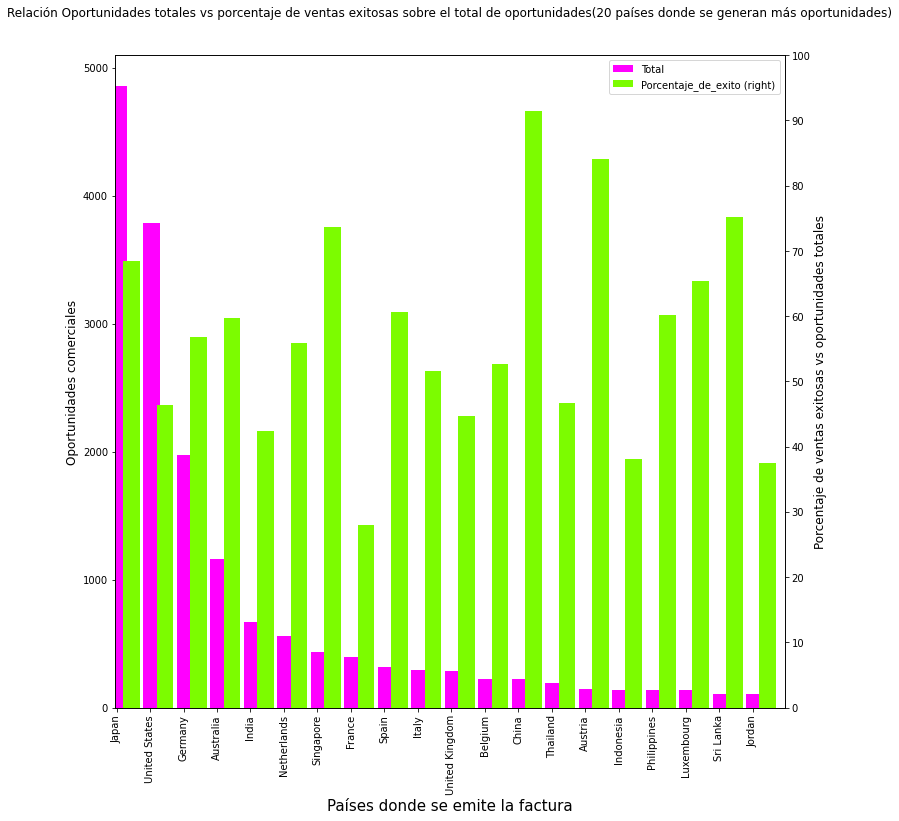

In [137]:
ax=union_mas_porcentaje.plot(kind='bar', x= 'Billing_Country' , y='Total', color = 'fuchsia', position = 0.4)

ax2=union_mas_porcentaje.plot(kind='bar', x='Billing_Country', y='Porcentaje_de_exito',color = 'lawngreen', figsize=[12,12], secondary_y=True,ax=ax, position = -0.4)
ax2.set_yticks(range(0,110, 10))
ax.set_xlabel('Países donde se emite la factura', fontsize=15)
ax.set_ylabel('Oportunidades comerciales', fontsize=12)
ax2.set_ylabel('Porcentaje de ventas exitosas vs oportunidades totales', fontsize=12)
ax.set_title('Relación Oportunidades totales vs porcentaje de ventas exitosas sobre el total de oportunidades(20 países donde se generan más oportunidades)', y =1.05,  fontsize=12)


In [138]:
#Países más rentables
cols = ['Billing_Country','Total_Amount_Currency', 'Region','Opportunity_Name',  'Account_Owner', 'Account_Name', 'Delivery_Year', 'Month','Total_Amount']
df_amount_pais = df_filtro_exito[cols]


In [139]:
#Conversión Japan
df_amount_JPY = df_amount_pais[df_amount_pais['Total_Amount_Currency'] == 'JPY'] 
df_amount_JPY['Conversión_USD'] = df_amount_JPY['Total_Amount'].apply(lambda x: x/109,5)
df_amount_JPY['Conversión_USD'] = df_amount_JPY['Conversión_USD'].astype(int)
df_amount_JPY.describe()

/home/agustin18/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/agustin18/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Delivery_Year,Total_Amount,Conversión_USD
count,3112.000000,3.112000e+03,3.112000e+03
mean,2016.925771,2.063253e+06,1.892842e+04
std,0.734390,8.713598e+06,7.994127e+04
min,2016.000000,0.000000e+00,0.000000e+00
25%,2016.000000,6.200000e+03,5.600000e+01
50%,2017.000000,3.500000e+04,3.210000e+02
75%,2017.000000,4.140500e+05,3.798000e+03
max,2019.000000,2.211300e+08,2.028715e+06


In [140]:
#Conversión EUR
df_amount_EUR = df_amount_pais[df_amount_pais['Total_Amount_Currency'] == 'EUR'] 
df_amount_EUR['Conversión_USD'] = df_amount_EUR['Total_Amount'].apply(lambda x: x*1.1958)
df_amount_EUR['Conversión_USD'] = df_amount_EUR['Conversión_USD'].astype(int)
df_amount_EUR

/home/agustin18/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/agustin18/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Billing_Country,Total_Amount_Currency,Region,Opportunity_Name,Account_Owner,Account_Name,Delivery_Year,Month,Total_Amount,Conversión_USD
1,Netherlands,EUR,EMEA,Opportunity_Name_12600,Person_Name_51,Account_Name_619,2016,2016 - 1,48230.0,57673
63,Germany,EUR,EMEA,Opportunity_Name_4062,Person_Name_13,Account_Name_263,2016,2016 - 1,103350.0,123585
66,United Kingdom,EUR,EMEA,Opportunity_Name_2804,Person_Name_18,Account_Name_270,2016,2016 - 1,214500.0,256499
67,United Kingdom,EUR,EMEA,Opportunity_Name_2801,Person_Name_18,Account_Name_270,2016,2016 - 1,214500.0,256499
70,United Kingdom,EUR,EMEA,Opportunity_Name_12137,Person_Name_18,Account_Name_1988,2016,2016 - 1,107250.0,128249
...,...,...,...,...,...,...,...,...,...,...
16937,Germany,EUR,EMEA,Opportunity_Name_4060,Person_Name_13,Account_Name_533,2016,2016 - 2,413400.0,494343
16939,Germany,EUR,EMEA,Opportunity_Name_7202,Person_Name_13,Account_Name_533,2016,2016 - 4,401700.0,480352
16942,Austria,EUR,EMEA,Opportunity_Name_9245,Person_Name_13,Account_Name_726,2016,2016 - 3,103350.0,123585
16943,Austria,EUR,EMEA,Opportunity_Name_9245,Person_Name_13,Account_Name_726,2016,2016 - 4,93015.0,111227


In [141]:
#Conversión AUD
df_amount_AUD = df_amount_pais[df_amount_pais['Total_Amount_Currency'] == 'AUD'] 
df_amount_AUD['Conversión_USD'] = df_amount_AUD['Total_Amount'].apply(lambda x: x/1.25)
df_amount_AUD['Conversión_USD'] = df_amount_AUD['Conversión_USD'].astype(int)
df_amount_AUD.describe()

/home/agustin18/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/agustin18/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Delivery_Year,Total_Amount,Conversión_USD
count,407.000000,4.070000e+02,4.070000e+02
mean,2017.014742,1.363451e+05,1.090760e+05
std,0.607651,1.430697e+05,1.144558e+05
min,2016.000000,2.308500e+04,1.846800e+04
25%,2017.000000,1.055600e+05,8.444800e+04
50%,2017.000000,1.096200e+05,8.769600e+04
75%,2017.000000,1.184040e+05,9.472300e+04
max,2018.000000,2.506140e+06,2.004912e+06


In [142]:
#Conversión USD
df_amount_USD = df_amount_pais[df_amount_pais['Total_Amount_Currency'] == 'USD'] 
df_amount_USD['Conversión_USD'] = df_amount_USD['Total_Amount'].apply(lambda x: x)
df_amount_USD['Conversión_USD'] = df_amount_USD['Conversión_USD'].astype(int)
df_amount_USD.describe()

/home/agustin18/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/agustin18/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Delivery_Year,Total_Amount,Conversión_USD
count,3592.000000,3.592000e+03,3.592000e+03
mean,2017.264755,2.891662e+05,2.891660e+05
std,0.770382,1.087109e+06,1.087109e+06
min,2016.000000,0.000000e+00,0.000000e+00
25%,2017.000000,1.286690e+04,1.286675e+04
50%,2017.000000,7.434000e+04,7.434000e+04
75%,2018.000000,1.827000e+05,1.827000e+05
max,2019.000000,2.731525e+07,2.731525e+07


In [143]:
df_amount = df_amount_USD.append([df_amount_JPY, df_amount_EUR, df_amount_AUD])
df_amount = df_amount.sort_index()
df_amount

,Billing_Country,Total_Amount_Currency,Region,Opportunity_Name,Account_Owner,Account_Name,Delivery_Year,Month,Total_Amount,Conversión_USD
1,Netherlands,EUR,EMEA,Opportunity_Name_12600,Person_Name_51,Account_Name_619,2016,2016 - 1,48230.0,57673
2,United States,USD,Americas,Opportunity_Name_469,Person_Name_64,Account_Name_1794,2016,2016 - 1,83865.6,83865
7,United States,USD,Americas,Opportunity_Name_8227,Person_Name_64,Account_Name_1794,2016,2016 - 1,50688.0,50688
23,India,USD,APAC,Opportunity_Name_7036,Person_Name_60,Account_Name_1147,2016,2016 - 1,1621851.0,1621851
63,Germany,EUR,EMEA,Opportunity_Name_4062,Person_Name_13,Account_Name_263,2016,2016 - 1,103350.0,123585
...,...,...,...,...,...,...,...,...,...,...
16937,Germany,EUR,EMEA,Opportunity_Name_4060,Person_Name_13,Account_Name_533,2016,2016 - 2,413400.0,494343
16939,Germany,EUR,EMEA,Opportunity_Name_7202,Person_Name_13,Account_Name_533,2016,2016 - 4,401700.0,480352
16942,Austria,EUR,EMEA,Opportunity_Name_9245,Person_Name_13,Account_Name_726,2016,2016 - 3,103350.0,123585
16943,Austria,EUR,EMEA,Opportunity_Name_9245,Person_Name_13,Account_Name_726,2016,2016 - 4,93015.0,111227


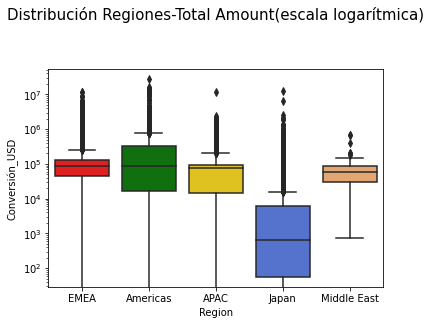

In [144]:
box_conversion = sns.boxplot(x="Region", y="Conversión_USD", data= df_amount, palette = palette)
box_conversion.set_title('Distribución Regiones-Total Amount(escala logarítmica)', fontsize = '15', y = 1.2)
box_conversion = box_conversion.set(yscale='log')





In [145]:
regiones_amount = df_amount.groupby(['Region']).agg({'Conversión_USD':['sum']})
regiones_amount
level0_rea = regiones_amount.columns.get_level_values(0)
level1_rea = regiones_amount.columns.get_level_values(1)
regiones_amount.columns = level0_rea + '_' + level1_rea
regiones_amount = regiones_amount.reset_index()
regiones_amount = regiones_amount.sort_values(by = 'Conversión_USD_sum', ascending = False)
regiones_amount

,Region,Conversión_USD_sum
1,Americas,758051438
2,EMEA,610060839
0,APAC,206527217
3,Japan,119013094
4,Middle East,4750690


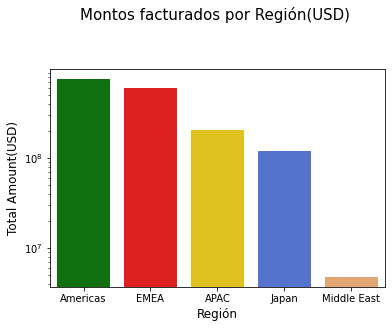

In [146]:
regiones = sns.barplot(data = regiones_amount, x = 'Region', y = 'Conversión_USD_sum' ,palette = palette )
regiones.set_title('Montos facturados por Región(USD) ', fontsize = '15', y = 1.2)
regiones.set_xlabel('Región', fontsize = '12')
regiones.set_ylabel ('Total Amount(USD)', fontsize = '12') 
regiones = regiones.set(yscale='log')



In [147]:
vendedores_amount = df_amount.groupby(['Account_Owner', 'Region']).agg({'Conversión_USD':['sum'], 'Account_Owner':['count']})
vendedores_amount
level0_vea = vendedores_amount.columns.get_level_values(0)
level1_vea = vendedores_amount.columns.get_level_values(1)
vendedores_amount.columns = level0_vea + '_' + level1_vea
vendedores_amount = vendedores_amount.reset_index()
vendedores_amount = vendedores_amount.sort_values(by = 'Conversión_USD_sum', ascending = False)
vendedores_amount_15 = vendedores_amount.sort_values(by = 'Conversión_USD_sum', ascending = False)
vendedores_amount_15 = vendedores_amount_15.head(15)
vendedores_amount

,Account_Owner,Region,Conversión_USD_sum,Account_Owner_count
42,Person_Name_8,Americas,522018156,763
1,Person_Name_13,EMEA,247796000,886
17,Person_Name_4,EMEA,154992991,301
5,Person_Name_18,EMEA,110395493,597
9,Person_Name_3,Americas,106265759,233
20,Person_Name_43,APAC,69472980,727
23,Person_Name_46,Americas,47649498,127
41,Person_Name_66,Japan,35064209,187
24,Person_Name_49,APAC,34203102,105
10,Person_Name_32,Japan,32348399,571


[None]

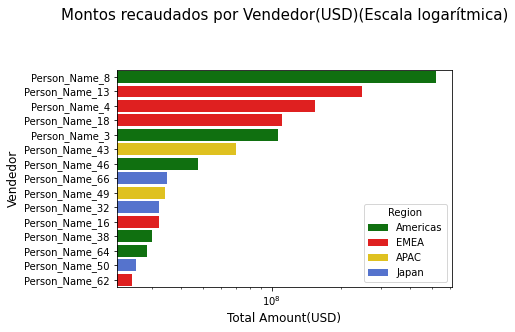

In [148]:
vende = sns.barplot(data = vendedores_amount_15, y = 'Account_Owner', x = 'Conversión_USD_sum', orient = 'h', hue = 'Region', palette = palette, dodge=False)
vende.set_title('Montos recaudados por Vendedor(USD)(Escala logarítmica)', fontsize = '15', y = 1.2)
vende.set_ylabel('Vendedor', fontsize = '12')
vende.set_xlabel ('Total Amount(USD)', fontsize = '12') 
vende.set(xscale='log')


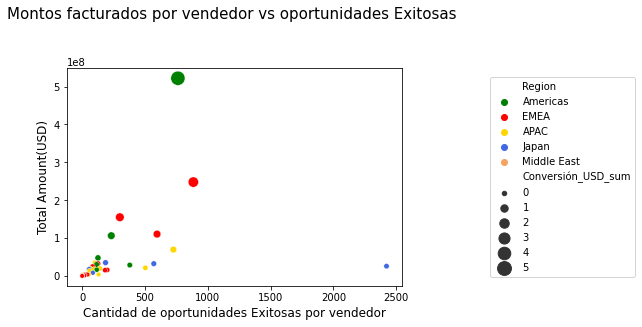

In [149]:
scater_vendedores = sns.scatterplot(data= vendedores_amount, y = 'Conversión_USD_sum', x = 'Account_Owner_count', size="Conversión_USD_sum",
    sizes=(20, 200),hue="Region",palette = palette )
scater_vendedores.set_title('Montos facturados por vendedor vs oportunidades Exitosas ', fontsize = '15', y = 1.2)
scater_vendedores.set_xlabel('Cantidad de oportunidades Exitosas por vendedor', fontsize = '12')
scater_vendedores.set_ylabel ('Total Amount(USD)', fontsize = '12') 
scater_vendedores.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
#scater_vendedores = scater_vendedores.set(yscale='log')


In [150]:
paises_amount = df_amount.groupby(['Billing_Country', 'Region']).agg({'Conversión_USD':['sum'], 'Billing_Country':['count']})
paises_amount
level0_pam = paises_amount.columns.get_level_values(0)
level1_pam = paises_amount.columns.get_level_values(1)
paises_amount.columns = level0_pam + '_' + level1_pam
paises_amount = paises_amount.reset_index()
paises_amount = paises_amount.sort_values(by = 'Conversión_USD_sum', ascending = False)
paises_amount_15 = paises_amount.sort_values(by = 'Conversión_USD_sum', ascending = False)
paises_amount_15 = paises_amount_15.head(15)
paises_amount

,Billing_Country,Region,Conversión_USD_sum,Billing_Country_count
59,United States,Americas,751384435,1753
15,Germany,EMEA,365710769,1121
21,Japan,Japan,111298150,3319
17,India,APAC,76917649,284
0,Australia,APAC,68229121,695
...,...,...,...,...
43,Saudi Arabia,Middle East,44000,1
28,"Macedonia, the former Yugoslav Republic of",EMEA,39174,1
30,Myanmar,APAC,32095,3
14,Germany,APAC,9805,1


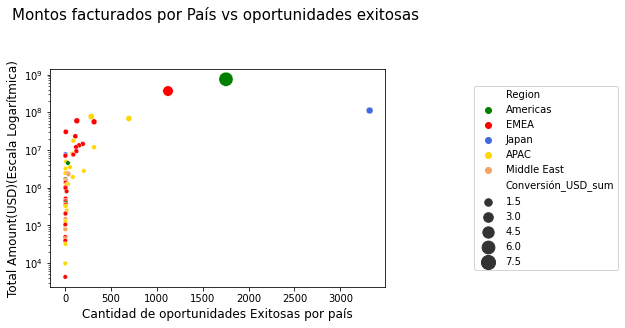

In [151]:
scater_paises = sns.scatterplot(data= paises_amount, y = 'Conversión_USD_sum', x = 'Billing_Country_count', size="Conversión_USD_sum",
    sizes=(20, 200),hue="Region", palette = palette )
scater_paises.set_title('Montos facturados por País vs oportunidades exitosas ', fontsize = '15', y = 1.2)
scater_paises.set_xlabel('Cantidad de oportunidades Exitosas por país', fontsize = '12')
scater_paises.set_ylabel ('Total Amount(USD)(Escala Logarítmica)', fontsize = '12') 
scater_paises.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
scater_paises = scater_paises.set(yscale='log')



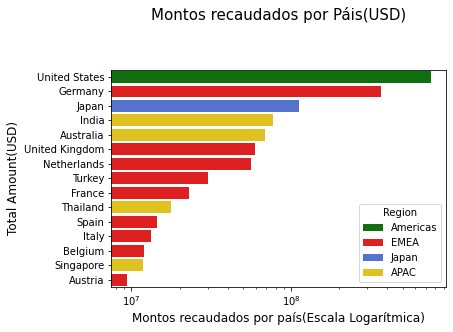

In [152]:
vendep = sns.barplot(data = paises_amount_15, y = 'Billing_Country', x = 'Conversión_USD_sum',hue = 'Region',  orient = 'h', palette = palette, dodge = False)
vendep.set_title('Montos recaudados por Páis(USD)', fontsize = '15', y = 1.2)
vendep.set_xlabel('Montos recaudados por país(Escala Logarítmica)', fontsize = '12')
vendep.set_ylabel ('Total Amount(USD)', fontsize = '12')
vendep = vendep.set(xscale='log')

In [153]:
df = df[(df['Stage'] == 'Closed Won') | (df['Stage'] == 'Closed Lost')]



In [154]:
#Conversión Japan
df_amount_JPY = df[df['Total_Amount_Currency'] == 'JPY'] 
df_amount_JPY['Conversión_USD'] = df_amount_JPY['Total_Amount'].apply(lambda x: x/109,5)
df_amount_JPY['Conversión_USD'] = df_amount_JPY['Conversión_USD'].astype(int)

/home/agustin18/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/agustin18/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [155]:
#Conversión EUR
df_amount_EUR = df[df['Total_Amount_Currency'] == 'EUR'] 
df_amount_EUR['Conversión_USD'] = df_amount_EUR['Total_Amount'].apply(lambda x: x*1.1958)
df_amount_EUR['Conversión_USD'] = df_amount_EUR['Conversión_USD'].astype(int)

/home/agustin18/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/agustin18/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [156]:
#Conversión AUD
df_amount_AUD = df[df['Total_Amount_Currency'] == 'AUD'] 
df_amount_AUD['Conversión_USD'] = df_amount_AUD['Total_Amount'].apply(lambda x: x/1.25)
df_amount_AUD['Conversión_USD'] = df_amount_AUD['Conversión_USD'].astype(int)

/home/agustin18/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/agustin18/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [157]:
#Conversión USD
df_amount_USD = df[df['Total_Amount_Currency'] == 'USD'] 
df_amount_USD['Conversión_USD'] = df_amount_USD['Total_Amount'].apply(lambda x: x)
df_amount_USD['Conversión_USD'] = df_amount_USD['Conversión_USD'].astype(int)

/home/agustin18/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/agustin18/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [480]:
data = df_amount_USD.append([df_amount_JPY, df_amount_EUR, df_amount_AUD])
data= data.sort_index()
data

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A,Conversión_USD
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,...,2016,NaT,10,EUR,5272800.00,EUR,5272800.0,Closed Lost,Prod_Category_A_None,6305214
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,6/16/2015,...,2016,NaT,0,EUR,48230.00,EUR,48230.0,Closed Won,Prod_Category_A_None,57673
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,...,2016,NaT,0,USD,83865.60,USD,83865.6,Closed Won,Prod_Category_A_None,83865
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,2018,NaT,14,USD,7421881.50,USD,7421881.5,Closed Lost,Prod_Category_A_None,7421881
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,2018,NaT,25,USD,13357192.50,USD,13357192.5,Closed Lost,Prod_Category_A_None,13357192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16942,8781,EMEA,Austria,1,1,1,1,0,Bureaucratic_Code_4,1/15/2016,...,2016,NaT,0,EUR,103350.00,EUR,299715.0,Closed Won,Prod_Category_A_None,123585
16943,8786,EMEA,Austria,1,1,1,1,0,Bureaucratic_Code_4,1/15/2016,...,2016,NaT,0,EUR,93015.00,EUR,299715.0,Closed Won,Prod_Category_A_None,111227
16944,8792,EMEA,Austria,1,1,1,1,0,Bureaucratic_Code_4,1/15/2016,...,2016,NaT,0,EUR,103350.00,EUR,299715.0,Closed Won,Prod_Category_A_None,123585
16945,28561,Americas,NE America,1,1,1,1,0,Bureaucratic_Code_4,10/20/2015,...,2016,NaT,4,USD,2346796.88,USD,0.0,Closed Lost,Prod_Category_A_None,2346796


In [481]:
binarias=['Pricing, Delivery_Terms_Quote_Appr','Pricing, Delivery_Terms_Approved', 'Bureaucratic_Code_0_Approval','Bureaucratic_Code_0_Approved']
data[binarias]=data[binarias].astype('boolean')

flotantes=['Price','Total_Taxable_Amount','Total_Amount']
for col in flotantes:
     data[col]=pd.to_numeric(data[col],errors='coerce')

enteros=['Sales_Contract_No','Delivery_Year','TRF']
for col in enteros:
     data[col]=pd.to_numeric(data[col],errors='coerce',downcast='integer')

fechas=['Account_Created_Date', 'Opportunity_Created_Date', 'Quote_Expiry_Date','Last_Modified_Date','Planned_Delivery_Start_Date',\
        'Planned_Delivery_End_Date','Month']
data[fechas]=data[fechas].astype('datetime64[ns]')


In [482]:
cols1 = ['ID', 'Region', 'Billing_Country', 'Account_Type', 'Opportunity_Type', 'Account_Owner',   'Account_Name',  'Conversión_USD','Delivery_Quarter','Account_Created_Date', 'Opportunity_Created_Date' , 'TRF',  'Stage'  ]
data = data[cols1]
data


,ID,Region,Billing_Country,Account_Type,Opportunity_Type,Account_Owner,Account_Name,Conversión_USD,Delivery_Quarter,Account_Created_Date,Opportunity_Created_Date,TRF,Stage
0,27761,EMEA,Netherlands,Account_Type_2,Opportunity_Type_1,Person_Name_51,Account_Name_619,6305214,Q2,2015-06-16,2015-12-07,10,Closed Lost
1,27760,EMEA,Netherlands,Account_Type_2,Opportunity_Type_1,Person_Name_51,Account_Name_619,57673,Q1,2015-06-16,2015-12-07,0,Closed Won
2,27446,Americas,United States,Account_Type_5,Opportunity_Type_1,Person_Name_64,Account_Name_1794,83865,Q1,2015-04-21,2015-12-08,0,Closed Won
3,16808,Americas,United States,Account_Type_5,Opportunity_Type_19,Person_Name_8,Account_Name_1201,7421881,Q1,2013-07-27,2015-12-08,14,Closed Lost
4,16805,Americas,United States,Account_Type_5,Opportunity_Type_19,Person_Name_8,Account_Name_1201,13357192,Q1,2013-07-27,2015-12-08,25,Closed Lost
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16942,8781,EMEA,Austria,Account_Type_5,Opportunity_Type_1,Person_Name_13,Account_Name_726,123585,Q1,2016-01-15,2015-12-04,0,Closed Won
16943,8786,EMEA,Austria,Account_Type_5,Opportunity_Type_1,Person_Name_13,Account_Name_726,111227,Q2,2016-01-15,2015-12-04,0,Closed Won
16944,8792,EMEA,Austria,Account_Type_5,Opportunity_Type_1,Person_Name_13,Account_Name_726,123585,Q1,2016-01-15,2015-12-04,0,Closed Won
16945,28561,Americas,United States,Account_Type_5,Opportunity_Type_1,Person_Name_3,Account_Name_944,2346796,Q2,2015-10-20,2015-12-05,4,Closed Lost


In [483]:
df['Region'].value_counts()

Japan          4869
EMEA           4660
Americas       3933
APAC           3251
Middle East     170
Name: Region, dtype: int64

In [484]:
data['Region'].value_counts().keys()

Index(['Japan', 'EMEA', 'Americas', 'APAC', 'Middle East'], dtype='object')

In [485]:
regiones = ['Japan', 'EMEA', 'Americas', 'APAC', 'Middle East']


In [486]:
def prom(lista,variable):
    promedios = {}
    for i in lista:
        filtro = data[(data[variable] == i) & (data['Stage'] == 'Closed Won')]
        promedio = sum(filtro['Conversión_USD']) / len(filtro[filtro[variable] == i])
        promedios.update({i:promedio})
    return promedios
regiones = ['Japan', 'EMEA', 'Americas', 'APAC', 'Middle East']
res = prom(regiones, 'Region')
res
        

{'Japan': 35814.954559133315,
 'EMEA': 246888.2391744233,
 'Americas': 422783.84718349134,
 'APAC': 108927.85706751054,
 'Middle East': 95013.8}

In [487]:
data_exito = data[data['Stage'] == 'Closed Won']
data_exito

,ID,Region,Billing_Country,Account_Type,Opportunity_Type,Account_Owner,Account_Name,Conversión_USD,Delivery_Quarter,Account_Created_Date,Opportunity_Created_Date,TRF,Stage
1,27760,EMEA,Netherlands,Account_Type_2,Opportunity_Type_1,Person_Name_51,Account_Name_619,57673,Q1,2015-06-16,2015-12-07,0,Closed Won
2,27446,Americas,United States,Account_Type_5,Opportunity_Type_1,Person_Name_64,Account_Name_1794,83865,Q1,2015-04-21,2015-12-08,0,Closed Won
7,27455,Americas,United States,Account_Type_5,Opportunity_Type_1,Person_Name_64,Account_Name_1794,50688,Q1,2015-04-21,2015-12-09,0,Closed Won
23,28524,APAC,India,Account_Type_2,Opportunity_Type_19,Person_Name_60,Account_Name_1147,1621851,Q1,2015-10-13,2015-12-09,3,Closed Won
63,13392,EMEA,Germany,Account_Type_0,Opportunity_Type_8,Person_Name_13,Account_Name_263,123585,Q1,2013-07-27,2015-12-09,0,Closed Won
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16937,17683,EMEA,Germany,Account_Type_0,Opportunity_Type_8,Person_Name_13,Account_Name_533,494343,Q1,2013-07-27,2015-12-04,1,Closed Won
16939,18324,EMEA,Germany,Account_Type_0,Opportunity_Type_1,Person_Name_13,Account_Name_533,480352,Q2,2013-07-27,2015-12-04,1,Closed Won
16942,8781,EMEA,Austria,Account_Type_5,Opportunity_Type_1,Person_Name_13,Account_Name_726,123585,Q1,2016-01-15,2015-12-04,0,Closed Won
16943,8786,EMEA,Austria,Account_Type_5,Opportunity_Type_1,Person_Name_13,Account_Name_726,111227,Q2,2016-01-15,2015-12-04,0,Closed Won


In [513]:
data_exito['Billing_Country'].value_counts().keys()

Index(['Japan', 'United States', 'Germany', 'Australia', 'Singapore',
       'Netherlands', 'India', 'China', 'Spain', 'Italy', 'United Kingdom',
       'Austria', 'Belgium', 'France', 'Thailand', 'Luxembourg', 'Philippines',
       'Sri Lanka', 'Indonesia', 'Jordan', 'Cyprus', 'Canada', 'New Zealand',
       'Portugal', 'Poland', 'Viet Nam', 'Norway',
       'Korea, Democratic People's Republic of', 'Taiwan', 'Pakistan',
       'South Africa', 'Turkey', 'Puerto Rico', 'Switzerland', 'Hungary',
       'United Arab Emirates', 'Malta', 'Sweden', 'Lebanon', 'Myanmar',
       'Cambodia', 'Czech Republic', 'Korea, Republic of', 'Reunion',
       'Bulgaria', 'Estonia', 'Bahrain',
       'Macedonia, the former Yugoslav Republic of', 'Saudi Arabia'],
      dtype='object')

In [489]:
def prom_ex(lista,variable):
    promedios = {}
    for i in lista:
        filtro = data_exito[(data_exito[variable] == i) & (data_exito['Stage'] == 'Closed Won')]
        
        promedio = sum(filtro['Conversión_USD']) / len(filtro[variable] == i)
        promedios.update({i:promedio})
        
        
    return promedios

        

In [514]:
paises = ['Japan', 'United States', 'Germany', 'Australia', 'Singapore',
       'Netherlands', 'India', 'China', 'Spain', 'Italy', 'United Kingdom',
       'Austria', 'Belgium', 'France', 'Thailand', 'Luxembourg', 'Philippines',
       'Sri Lanka', 'Indonesia', 'Jordan', 'Cyprus', 'Canada', 'New Zealand',
       'Portugal', 'Poland', 'Viet Nam', 'Norway',
       'Korea, Democratic People\'s Republic of', 'Taiwan', 'Pakistan',
       'South Africa', 'Turkey', 'Puerto Rico', 'Switzerland', 'Hungary',
       'United Arab Emirates', 'Malta', 'Sweden', 'Lebanon', 'Myanmar',
       'Cambodia', 'Czech Republic', 'Korea, Republic of', 'Reunion',
       'Bulgaria', 'Estonia', 'Bahrain',
       'Macedonia, the former Yugoslav Republic of', 'Saudi Arabia']
res_paises = prom_ex(paises, 'Billing_Country')
print(res_paises)


{'Japan': 34454.245862172735, 'United States': 432143.81367521366, 'Germany': 325954.16577540105, 'Australia': 98171.39712230217, 'Singapore': 61490.17924528302, 'Netherlands': 177583.14603174603, 'India': 270836.79225352115, 'China': 13718.42857142857, 'Spain': 75503.49479166667, 'Italy': 87440.72368421052, 'United Kingdom': 467285.6456692913, 'Austria': 76525.4918032787, 'Belgium': 100146.15126050421, 'France': 207481.12612612612, 'Thailand': 196255.48888888888, 'Luxembourg': 85045.02247191011, 'Philippines': 23189.192771084337, 'Sri Lanka': 102137.93670886075, 'Indonesia': 65919.41509433962, 'Jordan': 82767.30769230769, 'Cyprus': 69202.29411764706, 'Canada': 185230.625, 'New Zealand': 38870.59375, 'Portugal': 69243.72222222222, 'Poland': 50044.0625, 'Viet Nam': 15501.75, 'Norway': 241958.07142857142, "Korea, Democratic People's Republic of": 97934.16666666667, 'Taiwan': 494289.5, 'Pakistan': 59213.0, 'South Africa': 91579.875, 'Turkey': 4328910.0, 'Puerto Rico': 56055.142857142855, 

In [515]:
data_exito['promedio_preciov_paises'] = data_exito['Billing_Country'].map(res_paises)
cols2 = ['ID','promedio_preciov_paises' ]
data_exitoo = data_exito[cols2]
data_exitoo

/home/agustin18/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,ID,promedio_preciov_paises
1,27760,177583.146032
2,27446,432143.813675
7,27455,432143.813675
23,28524,270836.792254
63,13392,325954.165775
...,...,...
16937,17683,325954.165775
16939,18324,325954.165775
16942,8781,76525.491803
16943,8786,76525.491803


In [516]:
data['promedio_preciov_region'] = data['Region'].map(res)
data

/home/agustin18/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,ID,Region,Billing_Country,Account_Type,Opportunity_Type,Account_Owner,Account_Name,Conversión_USD,Delivery_Quarter,Account_Created_Date,Opportunity_Created_Date,TRF,Stage,promedio_preciov_region
0,27761,EMEA,Netherlands,Account_Type_2,Opportunity_Type_1,Person_Name_51,Account_Name_619,6305214,Q2,2015-06-16,2015-12-07,10,Closed Lost,0.53
1,27760,EMEA,Netherlands,Account_Type_2,Opportunity_Type_1,Person_Name_51,Account_Name_619,57673,Q1,2015-06-16,2015-12-07,0,Closed Won,0.53
2,27446,Americas,United States,Account_Type_5,Opportunity_Type_1,Person_Name_64,Account_Name_1794,83865,Q1,2015-04-21,2015-12-08,0,Closed Won,0.46
3,16808,Americas,United States,Account_Type_5,Opportunity_Type_19,Person_Name_8,Account_Name_1201,7421881,Q1,2013-07-27,2015-12-08,14,Closed Lost,0.46
4,16805,Americas,United States,Account_Type_5,Opportunity_Type_19,Person_Name_8,Account_Name_1201,13357192,Q1,2013-07-27,2015-12-08,25,Closed Lost,0.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16942,8781,EMEA,Austria,Account_Type_5,Opportunity_Type_1,Person_Name_13,Account_Name_726,123585,Q1,2016-01-15,2015-12-04,0,Closed Won,0.53
16943,8786,EMEA,Austria,Account_Type_5,Opportunity_Type_1,Person_Name_13,Account_Name_726,111227,Q2,2016-01-15,2015-12-04,0,Closed Won,0.53
16944,8792,EMEA,Austria,Account_Type_5,Opportunity_Type_1,Person_Name_13,Account_Name_726,123585,Q1,2016-01-15,2015-12-04,0,Closed Won,0.53
16945,28561,Americas,United States,Account_Type_5,Opportunity_Type_1,Person_Name_3,Account_Name_944,2346796,Q2,2015-10-20,2015-12-05,4,Closed Lost,0.46


In [517]:
data_final = pd.merge(data,data_exitoo, on = 'ID', how ='outer')
data_final = data_final.fillna(0)
data_final

,ID,Region,Billing_Country,Account_Type,Opportunity_Type,Account_Owner,Account_Name,Conversión_USD,Delivery_Quarter,Account_Created_Date,Opportunity_Created_Date,TRF,Stage,promedio_preciov_region,promedio_preciov_paises
0,27761,EMEA,Netherlands,Account_Type_2,Opportunity_Type_1,Person_Name_51,Account_Name_619,6305214,Q2,2015-06-16,2015-12-07,10,Closed Lost,0.53,0.000000
1,27760,EMEA,Netherlands,Account_Type_2,Opportunity_Type_1,Person_Name_51,Account_Name_619,57673,Q1,2015-06-16,2015-12-07,0,Closed Won,0.53,177583.146032
2,27446,Americas,United States,Account_Type_5,Opportunity_Type_1,Person_Name_64,Account_Name_1794,83865,Q1,2015-04-21,2015-12-08,0,Closed Won,0.46,432143.813675
3,16808,Americas,United States,Account_Type_5,Opportunity_Type_19,Person_Name_8,Account_Name_1201,7421881,Q1,2013-07-27,2015-12-08,14,Closed Lost,0.46,0.000000
4,16805,Americas,United States,Account_Type_5,Opportunity_Type_19,Person_Name_8,Account_Name_1201,13357192,Q1,2013-07-27,2015-12-08,25,Closed Lost,0.46,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16873,8781,EMEA,Austria,Account_Type_5,Opportunity_Type_1,Person_Name_13,Account_Name_726,123585,Q1,2016-01-15,2015-12-04,0,Closed Won,0.53,76525.491803
16874,8786,EMEA,Austria,Account_Type_5,Opportunity_Type_1,Person_Name_13,Account_Name_726,111227,Q2,2016-01-15,2015-12-04,0,Closed Won,0.53,76525.491803
16875,8792,EMEA,Austria,Account_Type_5,Opportunity_Type_1,Person_Name_13,Account_Name_726,123585,Q1,2016-01-15,2015-12-04,0,Closed Won,0.53,76525.491803
16876,28561,Americas,United States,Account_Type_5,Opportunity_Type_1,Person_Name_3,Account_Name_944,2346796,Q2,2015-10-20,2015-12-05,4,Closed Lost,0.46,0.000000


In [518]:
data_exito['Account_Type'].value_counts().count()
Account_t = ['Account_Type_2', 'Account_Type_0', 'Account_Type_5', 'Account_Type_1',
       'None', 'Account_Type_4', 'Account_Type_6']
res_account = prom_ex(Account_t, 'Account_Type')
print(res_account)

{'Account_Type_2': 125034.170409234, 'Account_Type_0': 116533.13355834137, 'Account_Type_5': 958150.8873483535, 'Account_Type_1': 653280.5806451613, 'None': 591503.7142857143, 'Account_Type_4': 10496251.25, 'Account_Type_6': 5727.0}


In [519]:
data_exito['promedio_preciov_Account'] = data_exito['Account_Type'].map(res_account)
cols3 = ['ID','promedio_preciov_Account' ]
data_exitoo2 = data_exito[cols3]
data_exitoo2

/home/agustin18/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,ID,promedio_preciov_Account
1,27760,125034.170409
2,27446,958150.887348
7,27455,958150.887348
23,28524,125034.170409
63,13392,116533.133558
...,...,...
16937,17683,116533.133558
16939,18324,116533.133558
16942,8781,958150.887348
16943,8786,958150.887348


In [520]:
data_final2 = pd.merge(data_final,data_exitoo2, on = 'ID', how ='outer')
data_final2 = data_final2.fillna(0)
data_final2

,ID,Region,Billing_Country,Account_Type,Opportunity_Type,Account_Owner,Account_Name,Conversión_USD,Delivery_Quarter,Account_Created_Date,Opportunity_Created_Date,TRF,Stage,promedio_preciov_region,promedio_preciov_paises,promedio_preciov_Account
0,27761,EMEA,Netherlands,Account_Type_2,Opportunity_Type_1,Person_Name_51,Account_Name_619,6305214,Q2,2015-06-16,2015-12-07,10,Closed Lost,0.53,0.000000,0.000000
1,27760,EMEA,Netherlands,Account_Type_2,Opportunity_Type_1,Person_Name_51,Account_Name_619,57673,Q1,2015-06-16,2015-12-07,0,Closed Won,0.53,177583.146032,125034.170409
2,27446,Americas,United States,Account_Type_5,Opportunity_Type_1,Person_Name_64,Account_Name_1794,83865,Q1,2015-04-21,2015-12-08,0,Closed Won,0.46,432143.813675,958150.887348
3,16808,Americas,United States,Account_Type_5,Opportunity_Type_19,Person_Name_8,Account_Name_1201,7421881,Q1,2013-07-27,2015-12-08,14,Closed Lost,0.46,0.000000,0.000000
4,16805,Americas,United States,Account_Type_5,Opportunity_Type_19,Person_Name_8,Account_Name_1201,13357192,Q1,2013-07-27,2015-12-08,25,Closed Lost,0.46,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16873,8781,EMEA,Austria,Account_Type_5,Opportunity_Type_1,Person_Name_13,Account_Name_726,123585,Q1,2016-01-15,2015-12-04,0,Closed Won,0.53,76525.491803,958150.887348
16874,8786,EMEA,Austria,Account_Type_5,Opportunity_Type_1,Person_Name_13,Account_Name_726,111227,Q2,2016-01-15,2015-12-04,0,Closed Won,0.53,76525.491803,958150.887348
16875,8792,EMEA,Austria,Account_Type_5,Opportunity_Type_1,Person_Name_13,Account_Name_726,123585,Q1,2016-01-15,2015-12-04,0,Closed Won,0.53,76525.491803,958150.887348
16876,28561,Americas,United States,Account_Type_5,Opportunity_Type_1,Person_Name_3,Account_Name_944,2346796,Q2,2015-10-20,2015-12-05,4,Closed Lost,0.46,0.000000,0.000000


In [521]:
data_exito['Opportunity_Type'].value_counts().keys()
Opportunity_t = ['Opportunity_Type_7', 'Opportunity_Type_1', 'Opportunity_Type_8',
       'Opportunity_Type_19', 'Opportunity_Type_12', 'Opportunity_Type_3',
       'Opportunity_Type_20', 'Opportunity_Type_10', 'Opportunity_Type_2',
       'Opportunity_Type_4', 'Opportunity_Type_14', 'Opportunity_Type_17',
       'Opportunity_Type_9', 'Opportunity_Type_5', 'Opportunity_Type_0',
       'Opportunity_Type_15', 'Opportunity_Type_18', 'Opportunity_Type_11',
       'Opportunity_Type_23']
res_opor = prom_ex(Opportunity_t,'Opportunity_Type')
print(res_opor)

{'Opportunity_Type_7': 102400.35270235981, 'Opportunity_Type_1': 133491.43240254355, 'Opportunity_Type_8': 87111.3798828125, 'Opportunity_Type_19': 1629802.7944862156, 'Opportunity_Type_12': 79992.65637065638, 'Opportunity_Type_3': 67131.68085106384, 'Opportunity_Type_20': 798227.8333333334, 'Opportunity_Type_10': 64174.541666666664, 'Opportunity_Type_2': 158458.73913043478, 'Opportunity_Type_4': 124278.95238095238, 'Opportunity_Type_14': 35921.0, 'Opportunity_Type_17': 146402.75, 'Opportunity_Type_9': 84030.875, 'Opportunity_Type_5': 56616.625, 'Opportunity_Type_0': 167630.5, 'Opportunity_Type_15': 617642.3333333334, 'Opportunity_Type_18': 87697.5, 'Opportunity_Type_11': 20655.0, 'Opportunity_Type_23': 50851.0}


In [522]:
data_exito['promedio_preciov_Oportunity'] = data_exito['Opportunity_Type'].map(res_opor)
cols4 = ['ID', 'promedio_preciov_Oportunity' ]
data_exitoo3 = data_exito[cols4]
data_exitoo3

/home/agustin18/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,ID,promedio_preciov_Oportunity
1,27760,1.334914e+05
2,27446,1.334914e+05
7,27455,1.334914e+05
23,28524,1.629803e+06
63,13392,8.711138e+04
...,...,...
16937,17683,8.711138e+04
16939,18324,1.334914e+05
16942,8781,1.334914e+05
16943,8786,1.334914e+05


In [628]:
data_final3 = pd.merge(data_final2,data_exitoo3, on = 'ID', how ='outer')
data_final3 = data_final3.fillna(0)
data_final3

,ID,Region,Billing_Country,Account_Type,Opportunity_Type,Account_Owner,Account_Name,Conversión_USD,Delivery_Quarter,Account_Created_Date,Opportunity_Created_Date,TRF,Stage,promedio_preciov_region,promedio_preciov_paises,promedio_preciov_Account,promedio_preciov_Oportunity
0,27761,EMEA,Netherlands,Account_Type_2,Opportunity_Type_1,Person_Name_51,Account_Name_619,6305214,Q2,2015-06-16,2015-12-07,10,Closed Lost,0.53,0.000000,0.000000,0.000000
1,27760,EMEA,Netherlands,Account_Type_2,Opportunity_Type_1,Person_Name_51,Account_Name_619,57673,Q1,2015-06-16,2015-12-07,0,Closed Won,0.53,177583.146032,125034.170409,133491.432403
2,27446,Americas,United States,Account_Type_5,Opportunity_Type_1,Person_Name_64,Account_Name_1794,83865,Q1,2015-04-21,2015-12-08,0,Closed Won,0.46,432143.813675,958150.887348,133491.432403
3,16808,Americas,United States,Account_Type_5,Opportunity_Type_19,Person_Name_8,Account_Name_1201,7421881,Q1,2013-07-27,2015-12-08,14,Closed Lost,0.46,0.000000,0.000000,0.000000
4,16805,Americas,United States,Account_Type_5,Opportunity_Type_19,Person_Name_8,Account_Name_1201,13357192,Q1,2013-07-27,2015-12-08,25,Closed Lost,0.46,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16873,8781,EMEA,Austria,Account_Type_5,Opportunity_Type_1,Person_Name_13,Account_Name_726,123585,Q1,2016-01-15,2015-12-04,0,Closed Won,0.53,76525.491803,958150.887348,133491.432403
16874,8786,EMEA,Austria,Account_Type_5,Opportunity_Type_1,Person_Name_13,Account_Name_726,111227,Q2,2016-01-15,2015-12-04,0,Closed Won,0.53,76525.491803,958150.887348,133491.432403
16875,8792,EMEA,Austria,Account_Type_5,Opportunity_Type_1,Person_Name_13,Account_Name_726,123585,Q1,2016-01-15,2015-12-04,0,Closed Won,0.53,76525.491803,958150.887348,133491.432403
16876,28561,Americas,United States,Account_Type_5,Opportunity_Type_1,Person_Name_3,Account_Name_944,2346796,Q2,2015-10-20,2015-12-05,4,Closed Lost,0.46,0.000000,0.000000,0.000000


In [524]:
data_exito['Account_Owner'].value_counts().keys()
Owner_t = ['Person_Name_50', 'Person_Name_13', 'Person_Name_8', 'Person_Name_43',
       'Person_Name_18', 'Person_Name_32', 'Person_Name_65', 'Person_Name_64',
       'Person_Name_4', 'Person_Name_3', 'Person_Name_42', 'Person_Name_66',
       'Person_Name_2', 'Person_Name_52', 'Person_Name_21', 'Person_Name_46',
       'Person_Name_16', 'Person_Name_45', 'Person_Name_38', 'Person_Name_49',
       'Person_Name_54', 'Person_Name_55', 'Person_Name_62', 'Person_Name_60',
       'Person_Name_59', 'Person_Name_61', 'Person_Name_63', 'Person_Name_5',
       'Person_Name_51', 'Person_Name_33', 'Person_Name_14', 'Person_Name_39',
       'Person_Name_9', 'Person_Name_44', 'Person_Name_41', 'Person_Name_23',
       'Person_Name_58', 'Person_Name_35', 'Person_Name_34']
res_vendedor = prom_ex(Owner_t ,'Account_Owner')
print(res_vendedor)

{'Person_Name_50': 10595.66983078828, 'Person_Name_13': 278450.5162738496, 'Person_Name_8': 684165.3420707732, 'Person_Name_43': 95561.18294360385, 'Person_Name_18': 184917.07370184254, 'Person_Name_32': 56652.18739054291, 'Person_Name_65': 42397.63293650794, 'Person_Name_64': 75357.66842105263, 'Person_Name_4': 514926.8803986711, 'Person_Name_3': 456076.2188841202, 'Person_Name_42': 78835.83084577114, 'Person_Name_66': 187712.38829787233, 'Person_Name_2': 82983.92349726777, 'Person_Name_52': 139822.8085106383, 'Person_Name_21': 29097.007575757576, 'Person_Name_46': 375192.89763779525, 'Person_Name_16': 256653.5873015873, 'Person_Name_45': 140250.58974358975, 'Person_Name_38': 259652.0603448276, 'Person_Name_49': 325743.82857142854, 'Person_Name_54': 184150.66666666666, 'Person_Name_55': 96375.62790697675, 'Person_Name_62': 292718.8333333333, 'Person_Name_60': 292585.36363636365, 'Person_Name_59': 226447.10169491524, 'Person_Name_61': 314979.89285714284, 'Person_Name_63': 71553.0925925

In [525]:
data_exito['promedio_preciov_vendedor'] = data_exito['Account_Owner'].map(res_vendedor)
cols5 = ['ID', 'promedio_preciov_vendedor' ]
data_exitoo4 = data_exito[cols5]
data_exitoo4

/home/agustin18/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,ID,promedio_preciov_vendedor
1,27760,85165.046512
2,27446,75357.668421
7,27455,75357.668421
23,28524,292585.363636
63,13392,278450.516274
...,...,...
16937,17683,278450.516274
16939,18324,278450.516274
16942,8781,278450.516274
16943,8786,278450.516274


In [629]:
data_final4 = pd.merge(data_final3,data_exitoo4, on = 'ID', how ='outer')
data_final4 = data_final4.fillna(0)
data_final4

,ID,Region,Billing_Country,Account_Type,Opportunity_Type,Account_Owner,Account_Name,Conversión_USD,Delivery_Quarter,Account_Created_Date,Opportunity_Created_Date,TRF,Stage,promedio_preciov_region,promedio_preciov_paises,promedio_preciov_Account,promedio_preciov_Oportunity,promedio_preciov_vendedor
0,27761,EMEA,Netherlands,Account_Type_2,Opportunity_Type_1,Person_Name_51,Account_Name_619,6305214,Q2,2015-06-16,2015-12-07,10,Closed Lost,0.53,0.000000,0.000000,0.000000,0.000000
1,27760,EMEA,Netherlands,Account_Type_2,Opportunity_Type_1,Person_Name_51,Account_Name_619,57673,Q1,2015-06-16,2015-12-07,0,Closed Won,0.53,177583.146032,125034.170409,133491.432403,85165.046512
2,27446,Americas,United States,Account_Type_5,Opportunity_Type_1,Person_Name_64,Account_Name_1794,83865,Q1,2015-04-21,2015-12-08,0,Closed Won,0.46,432143.813675,958150.887348,133491.432403,75357.668421
3,16808,Americas,United States,Account_Type_5,Opportunity_Type_19,Person_Name_8,Account_Name_1201,7421881,Q1,2013-07-27,2015-12-08,14,Closed Lost,0.46,0.000000,0.000000,0.000000,0.000000
4,16805,Americas,United States,Account_Type_5,Opportunity_Type_19,Person_Name_8,Account_Name_1201,13357192,Q1,2013-07-27,2015-12-08,25,Closed Lost,0.46,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16873,8781,EMEA,Austria,Account_Type_5,Opportunity_Type_1,Person_Name_13,Account_Name_726,123585,Q1,2016-01-15,2015-12-04,0,Closed Won,0.53,76525.491803,958150.887348,133491.432403,278450.516274
16874,8786,EMEA,Austria,Account_Type_5,Opportunity_Type_1,Person_Name_13,Account_Name_726,111227,Q2,2016-01-15,2015-12-04,0,Closed Won,0.53,76525.491803,958150.887348,133491.432403,278450.516274
16875,8792,EMEA,Austria,Account_Type_5,Opportunity_Type_1,Person_Name_13,Account_Name_726,123585,Q1,2016-01-15,2015-12-04,0,Closed Won,0.53,76525.491803,958150.887348,133491.432403,278450.516274
16876,28561,Americas,United States,Account_Type_5,Opportunity_Type_1,Person_Name_3,Account_Name_944,2346796,Q2,2015-10-20,2015-12-05,4,Closed Lost,0.46,0.000000,0.000000,0.000000,0.000000


In [630]:
from math import sqrt
def wilson(p, n, z = 1.96):
    denominator = 1 + z**2/n
    centre_adjusted_probability = p + z*z / (2*n)
    adjusted_standard_deviation = sqrt((p*(1 - p) + z*z / (4*n)) / n)
    
    lower_bound = (centre_adjusted_probability - z*adjusted_standard_deviation) / denominator
    upper_bound = (centre_adjusted_probability + z*adjusted_standard_deviation) / denominator
    return (upper_bound - lower_bound)

positive = 50
total = 170
p  = positive / total
(p, wilson(p, total))

(0.29411764705882354, 0.1357730025245579)

In [631]:
union = df_exitosos_region.merge(df_fracaso_region, how = 'outer', on = 'Region')
union['Total'] = union['Region_exitos'] + union['Region_fracasos']
union['proporcion_exito'] = union['Region_exitos'] / union['Total']
decimals = 2    
union['proporcion_exito'] = union['proporcion_exito'].apply(lambda x: round(x, decimals))
union


,Region,Region_exitos,Region_fracasos,Total,proporcion_exito
0,APAC,1896,1355,3251,0.58
1,Americas,1793,2140,3933,0.46
2,EMEA,2471,2189,4660,0.53
3,Japan,3323,1546,4869,0.68
4,Middle East,50,120,170,0.29


In [632]:
def aplicar_wilson_region(regiones):
    coeficiente = {}
    for i in regiones:
        exitos = union.loc[union['Region']==i]['Region_exitos']
        exitos = exitos[exitos.index[0]]
        total = union.loc[union['Region']==i]['Total']
        total = total[total.index[0]]
        p =  exitos/total 
        a = wilson( p , total)
        a = 1-a
        coeficiente.update({i : a} )
    return coeficiente

aplicar_regiones = aplicar_wilson_region(regiones)
print(aplicar_regiones)


{'Japan': 0.9738572442395569, 'EMEA': 0.9713524051975674, 'Americas': 0.9688837792533591, 'APAC': 0.9661233636670233, 'Middle East': 0.8642269974754421}


In [633]:
def dicc(serie1,serie2):
    diccionario = {}
    for i in range(len(serie1)):
        diccionario.update({serie1[i]: serie2[i]})
    return diccionario

res1 = dicc(union['Region'], union['proporcion_exito'])
print(res1)

{'APAC': 0.58, 'Americas': 0.46, 'EMEA': 0.53, 'Japan': 0.68, 'Middle East': 0.29}


In [634]:
data_final4['proporcion_exito_region'] = data_final4['Region'].map(res1)
data_final4['1-wilson_Region'] = data_final4['Region'].map(aplicar_regiones)
data_final4['Wilsonxproporcion_region'] = data_final4['proporcion_exito_region'] * data_final4['1-wilson_Region'] 
data_final4

,ID,Region,Billing_Country,Account_Type,Opportunity_Type,Account_Owner,Account_Name,Conversión_USD,Delivery_Quarter,Account_Created_Date,...,TRF,Stage,promedio_preciov_region,promedio_preciov_paises,promedio_preciov_Account,promedio_preciov_Oportunity,promedio_preciov_vendedor,proporcion_exito_region,1-wilson_Region,Wilsonxproporcion_region
0,27761,EMEA,Netherlands,Account_Type_2,Opportunity_Type_1,Person_Name_51,Account_Name_619,6305214,Q2,2015-06-16,...,10,Closed Lost,0.53,0.000000,0.000000,0.000000,0.000000,0.53,0.971352,0.514817
1,27760,EMEA,Netherlands,Account_Type_2,Opportunity_Type_1,Person_Name_51,Account_Name_619,57673,Q1,2015-06-16,...,0,Closed Won,0.53,177583.146032,125034.170409,133491.432403,85165.046512,0.53,0.971352,0.514817
2,27446,Americas,United States,Account_Type_5,Opportunity_Type_1,Person_Name_64,Account_Name_1794,83865,Q1,2015-04-21,...,0,Closed Won,0.46,432143.813675,958150.887348,133491.432403,75357.668421,0.46,0.968884,0.445687
3,16808,Americas,United States,Account_Type_5,Opportunity_Type_19,Person_Name_8,Account_Name_1201,7421881,Q1,2013-07-27,...,14,Closed Lost,0.46,0.000000,0.000000,0.000000,0.000000,0.46,0.968884,0.445687
4,16805,Americas,United States,Account_Type_5,Opportunity_Type_19,Person_Name_8,Account_Name_1201,13357192,Q1,2013-07-27,...,25,Closed Lost,0.46,0.000000,0.000000,0.000000,0.000000,0.46,0.968884,0.445687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16873,8781,EMEA,Austria,Account_Type_5,Opportunity_Type_1,Person_Name_13,Account_Name_726,123585,Q1,2016-01-15,...,0,Closed Won,0.53,76525.491803,958150.887348,133491.432403,278450.516274,0.53,0.971352,0.514817
16874,8786,EMEA,Austria,Account_Type_5,Opportunity_Type_1,Person_Name_13,Account_Name_726,111227,Q2,2016-01-15,...,0,Closed Won,0.53,76525.491803,958150.887348,133491.432403,278450.516274,0.53,0.971352,0.514817
16875,8792,EMEA,Austria,Account_Type_5,Opportunity_Type_1,Person_Name_13,Account_Name_726,123585,Q1,2016-01-15,...,0,Closed Won,0.53,76525.491803,958150.887348,133491.432403,278450.516274,0.53,0.971352,0.514817
16876,28561,Americas,United States,Account_Type_5,Opportunity_Type_1,Person_Name_3,Account_Name_944,2346796,Q2,2015-10-20,...,4,Closed Lost,0.46,0.000000,0.000000,0.000000,0.000000,0.46,0.968884,0.445687


In [603]:
proporcion_paises_y = data_final4[data_final4['Stage']=='Closed Won']
proporcion_paises_y = proporcion_paises_y['Billing_Country'].value_counts().reset_index()
proporcion_paises_y.columns = ['Billing_Country', 'Exitos_ventas_paises']
proporcion_paises_y


,Billing_Country,Exitos_ventas_paises
0,Japan,3323
1,United States,1755
2,Germany,1122
3,Australia,695
4,Singapore,318
5,Netherlands,315
6,India,284
7,China,203
8,Spain,192
9,Italy,152


In [604]:
proporcion_paises_n = data_final[data_final4['Stage']=='Closed Lost']
proporcion_paises_n = proporcion_paises_n['Billing_Country'].value_counts().reset_index()
proporcion_paises_n.columns = ['Billing_Country', 'Fracasos_ventas_paises']
proporcion_paises_t= pd.merge(proporcion_paises_y, proporcion_paises_n, on = 'Billing_Country', how = 'outer' )
proporcion_paises_t = proporcion_paises_t.fillna(0) 
proporcion_paises_t['Total'] =  proporcion_paises_t['Exitos_ventas_paises'] +   proporcion_paises_t['Fracasos_ventas_paises']
proporcion_paises_t['Proporcion'] = proporcion_paises_t['Exitos_ventas_paises'] / proporcion_paises_t['Total']
proporcion_paises_t

,Billing_Country,Exitos_ventas_paises,Fracasos_ventas_paises,Total,Proporcion
0,Japan,3323.0,1533.0,4856.0,0.684308
1,United States,1755.0,2035.0,3790.0,0.463061
2,Germany,1122.0,851.0,1973.0,0.568677
3,Australia,695.0,470.0,1165.0,0.596567
4,Singapore,318.0,114.0,432.0,0.736111
...,...,...,...,...,...
74,Ecuador,0.0,1.0,1.0,0.000000
75,Colombia,0.0,1.0,1.0,0.000000
76,Peru,0.0,1.0,1.0,0.000000
77,Bosnia and Herzegovina,0.0,1.0,1.0,0.000000


In [605]:
paises = ['Japan', 'United States', 'Germany', 'Australia', 'India',
       'Netherlands', 'Singapore', 'France', 'Spain', 'Italy',
       'United Kingdom', 'Belgium', 'China', 'Thailand', 'Austria',
       'Indonesia', 'Philippines', 'Luxembourg', 'Canada', 'Sri Lanka',
       'Jordan', 'Poland', 'Cyprus', 'New Zealand', 'United Arab Emirates',
       'Norway', 'Viet Nam', 'Taiwan', 'Portugal', 'Switzerland', 'None',
       'Pakistan', 'Turkey', 'Puerto Rico', 'Hungary', 'Ireland',
       'South Africa' , 'Lebanon',
       'Denmark', 'Czech Republic', 'Greece', 'Saudi Arabia',
       'French Southern Territories', 'Sweden', 'Malta', 'Brazil',
       'Korea, Republic of', 'Egypt', 'Cambodia', 'Myanmar',
       'Macedonia, the former Yugoslav Republic of', 'Mexico', 'Bulgaria',
       'Kuwait', 'Jamaica', 'Armenia', 'Slovakia', 'Ghana', 'Belarus',
       'Reunion', 'Palestine', 'Estonia', 'Albania', 'Malaysia', 'Chile',
       'Bangladesh', 'Kenya', 'Ecuador', 'Bosnia and Herzegovina', 'Bahrain',
       'Colombia', 'Dominican Republic', 'Morocco', 'Peru', 'Belize',
       'Argentina', 'Liechtenstein', 'Libya', 'Korea, Democratic People\'s Republic of']

In [623]:
def aplicar_wilson(dataframe, lista, serie1,columna1, columna2):
    coeficiente = {}
    for i in lista:
        exitos = dataframe.loc[serie1==i][columna1]
        exitos = exitos[exitos.index[0]]
        total = dataframe.loc[serie1==i][columna2]
        total = total[total.index[0]]
        p =  exitos/total 
        a = wilson( p , total)
        a = 1-a
        coeficiente.update({i : a} )
    return coeficiente

aplicar_wilson_pais = aplicar_wilson(proporcion_paises_t, paises, proporcion_paises_t['Billing_Country'],'Exitos_ventas_paises', 'Total')
print(aplicar_wilson_pais)

{'Japan': 0.973862769421894, 'United States': 0.9682656772928921, 'Germany': 0.9563341047515138, 'Australia': 0.9437462739944699, 'India': 0.9254397932044474, 'Netherlands': 0.9182572823846137, 'Singapore': 0.9171385425537792, 'France': 0.9118485602118225, 'Spain': 0.8930185123703911, 'Italy': 0.8866723357392459, 'United Kingdom': 0.8851118240035135, 'Belgium': 0.8708962252169568, 'China': 0.9256785828209971, 'Thailand': 0.8606106810770713, 'Austria': 0.8813030913920646, 'Indonesia': 0.8405664863275353, 'Philippines': 0.8387580937703839, 'Luxembourg': 0.8421295348102386, 'Canada': 0.8435573472561289, 'Sri Lanka': 0.8368435617498141, 'Jordan': 0.8170368507117076, 'Poland': 0.7564471745913466, 'Cyprus': 0.7534130538617003, 'New Zealand': 0.7630880018702724, 'United Arab Emirates': 0.7842661282423256, 'Norway': 0.7016393001671098, 'Viet Nam': 0.6958539317455203, 'Taiwan': 0.706652267284682, 'Portugal': 0.6646747431569883, 'Switzerland': 0.689817739317199, 'None': 0.8712669561953783, 'Paki

In [617]:
res = dicc(proporcion_paises_t['Billing_Country'], proporcion_paises_t['Proporcion'])
data_final4['proporcion_exito_paises'] = data_final4['Billing_Country'].map(res)
data_final4['1-wilson_paises'] = data_final4['Billing_Country'].map(aplicar_wilson_pais)
data_final4['Wilsonxproporcion_paises'] = data_final4['proporcion_exito_paises'] * data_final4['1-wilson_paises'] 
data_final4

,ID,Region,Billing_Country,Account_Type,Opportunity_Type,Account_Owner,Account_Name,Conversión_USD,Delivery_Quarter,Account_Created_Date,...,promedio_preciov_paises,promedio_preciov_Account,promedio_preciov_Oportunity,promedio_preciov_vendedor,proporcion_exito_region,1-wilson_Region,Wilsonxproporcion_region,proporcion_exito_paises,1-wilson_paises,Wilsonxproporcion_paises
0,27761,EMEA,Netherlands,Account_Type_2,Opportunity_Type_1,Person_Name_51,Account_Name_619,6305214,Q2,2015-06-16,...,0.000000,0.000000,0.000000,0.000000,0.53,0.971352,0.514817,0.559503,0.918257,0.513767
1,27760,EMEA,Netherlands,Account_Type_2,Opportunity_Type_1,Person_Name_51,Account_Name_619,57673,Q1,2015-06-16,...,177583.146032,125034.170409,133491.432403,85165.046512,0.53,0.971352,0.514817,0.559503,0.918257,0.513767
2,27446,Americas,United States,Account_Type_5,Opportunity_Type_1,Person_Name_64,Account_Name_1794,83865,Q1,2015-04-21,...,432143.813675,958150.887348,133491.432403,75357.668421,0.46,0.968884,0.445687,0.463061,0.968266,0.448366
3,16808,Americas,United States,Account_Type_5,Opportunity_Type_19,Person_Name_8,Account_Name_1201,7421881,Q1,2013-07-27,...,0.000000,0.000000,0.000000,0.000000,0.46,0.968884,0.445687,0.463061,0.968266,0.448366
4,16805,Americas,United States,Account_Type_5,Opportunity_Type_19,Person_Name_8,Account_Name_1201,13357192,Q1,2013-07-27,...,0.000000,0.000000,0.000000,0.000000,0.46,0.968884,0.445687,0.463061,0.968266,0.448366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16873,8781,EMEA,Austria,Account_Type_5,Opportunity_Type_1,Person_Name_13,Account_Name_726,123585,Q1,2016-01-15,...,76525.491803,958150.887348,133491.432403,278450.516274,0.53,0.971352,0.514817,0.841379,0.881303,0.741510
16874,8786,EMEA,Austria,Account_Type_5,Opportunity_Type_1,Person_Name_13,Account_Name_726,111227,Q2,2016-01-15,...,76525.491803,958150.887348,133491.432403,278450.516274,0.53,0.971352,0.514817,0.841379,0.881303,0.741510
16875,8792,EMEA,Austria,Account_Type_5,Opportunity_Type_1,Person_Name_13,Account_Name_726,123585,Q1,2016-01-15,...,76525.491803,958150.887348,133491.432403,278450.516274,0.53,0.971352,0.514817,0.841379,0.881303,0.741510
16876,28561,Americas,United States,Account_Type_5,Opportunity_Type_1,Person_Name_3,Account_Name_944,2346796,Q2,2015-10-20,...,0.000000,0.000000,0.000000,0.000000,0.46,0.968884,0.445687,0.463061,0.968266,0.448366


In [635]:
proporcion_vendedor_y = data_final4[data_final4['Stage']=='Closed Won']
proporcion_vendedor_y = proporcion_vendedor_y['Account_Owner'].value_counts().reset_index()
proporcion_vendedor_y.columns = ['Account_Owner', 'Exitos_ventas_vendedor']
proporcion_vendedor_y


,Account_Owner,Exitos_ventas_vendedor
0,Person_Name_50,2423
1,Person_Name_13,891
2,Person_Name_8,763
3,Person_Name_43,727
4,Person_Name_18,597
5,Person_Name_32,571
6,Person_Name_65,504
7,Person_Name_64,380
8,Person_Name_4,301
9,Person_Name_3,233


In [681]:
proporcion_vendedor_n = data_final[data_final4['Stage']=='Closed Lost']
proporcion_vendedor_n = proporcion_vendedor_n['Account_Owner'].value_counts().reset_index()
proporcion_vendedor_n.columns = ['Account_Owner', 'Fracasos_ventas_vendedor']
proporcion_vendedor_t= pd.merge(proporcion_vendedor_y, proporcion_vendedor_n, on = 'Account_Owner', how = 'outer' )
proporcion_vendedor_t = proporcion_vendedor_t.fillna(0) 
proporcion_vendedor_t['Total'] =  proporcion_vendedor_t['Exitos_ventas_vendedor'] +   proporcion_vendedor_t['Fracasos_ventas_vendedor']
proporcion_vendedor_t['Proporcion'] = proporcion_vendedor_t['Exitos_ventas_vendedor'] / proporcion_vendedor_t['Total']
proporcion_vendedor_t

,Account_Owner,Exitos_ventas_vendedor,Fracasos_ventas_vendedor,Total,Proporcion
0,Person_Name_50,2423.0,1299,3722.0,0.650994
1,Person_Name_13,891.0,432,1323.0,0.673469
2,Person_Name_8,763.0,523,1286.0,0.593313
3,Person_Name_43,727.0,508,1235.0,0.588664
4,Person_Name_18,597.0,496,1093.0,0.546203
5,Person_Name_32,571.0,110,681.0,0.838473
6,Person_Name_65,504.0,127,631.0,0.798732
7,Person_Name_64,380.0,189,569.0,0.667838
8,Person_Name_4,301.0,361,662.0,0.454683
9,Person_Name_3,233.0,642,875.0,0.266286


In [640]:
vendedores = ['Person_Name_65', 'Person_Name_13', 'Person_Name_2', 'Person_Name_63',
       'Person_Name_18', 'Person_Name_47', 'Person_Name_36', 'Person_Name_8',
       'Person_Name_58', 'Person_Name_23', 'Person_Name_51', 'Person_Name_35',
       'Person_Name_38', 'Person_Name_64', 'Person_Name_44', 'Person_Name_59',
       'Person_Name_43', 'Person_Name_11', 'Person_Name_26', 'Person_Name_10',
       'Person_Name_20', 'Person_Name_41', 'Person_Name_50', 'Person_Name_32',
       'Person_Name_9', 'Person_Name_33', 'Person_Name_4', 'Person_Name_49',
       'Person_Name_21', 'Person_Name_17', 'Person_Name_5', 'Person_Name_52',
       'Person_Name_39', 'Person_Name_16', 'Person_Name_25', 'Person_Name_60',
       'Person_Name_55', 'Person_Name_45', 'Person_Name_62', 'Person_Name_29',
       'Person_Name_46', 'Person_Name_14', 'Person_Name_54', 'Person_Name_66',
       'Person_Name_3', 'Person_Name_61', 'Person_Name_34', 'Person_Name_42']

In [644]:
aplicar_wilson_vendedor = aplicar_wilson(proporcion_vendedor_t, vendedores, proporcion_vendedor_t['Account_Owner'],'Exitos_ventas_vendedor', 'Total')
print(aplicar_wilson_vendedor)

#aplicar_wilson_pais = aplicar_wilson(proporcion_paises_t, paises, proporcion_paises_t['Billing_Country'],'Exitos_ventas_paises', 'Total')
#print(aplicar_wilson_pais)

{'Person_Name_65': 0.9375159220935398, 'Person_Name_13': 0.9495241754832218, 'Person_Name_2': 0.8937265675269831, 'Person_Name_63': 0.8369269921068359, 'Person_Name_18': 0.9410710772437948, 'Person_Name_47': 0.3423719528896193, 'Person_Name_36': 0.6456611570247934, 'Person_Name_8': 0.9463816606675635, 'Person_Name_58': 0.6406739960992842, 'Person_Name_23': 0.30007141764034295, 'Person_Name_51': 0.8184174164023147, 'Person_Name_35': 0.18905730960173217, 'Person_Name_38': 0.895694699872677, 'Person_Name_64': 0.9228272330402341, 'Person_Name_44': 0.8117227784502826, 'Person_Name_59': 0.8750355016897154, 'Person_Name_43': 0.9451934908178864, 'Person_Name_11': 0.7224598312333834, 'Person_Name_26': 0.7574992425007575, 'Person_Name_10': 0.20654329147389294, 'Person_Name_20': 0.20654329147389294, 'Person_Name_41': 0.8609575334746323, 'Person_Name_50': 0.9693873269378513, 'Person_Name_32': 0.9447431391031149, 'Person_Name_9': 0.7494748695772333, 'Person_Name_33': 0.7940740192450704, 'Person_Nam

In [683]:
res2 = dicc(proporcion_vendedor_t['Account_Owner'],proporcion_vendedor_t['Proporcion'])
data_final4['proporcion_exito_vendedor'] = data_final4['Account_Owner'].map(res2)
data_final4['1-wilson_vendedor'] = data_final4['Account_Owner'].map(aplicar_wilson_vendedor)
data_final4['Wilsonxproporcion_vendedor'] = data_final4['proporcion_exito_vendedor'] * data_final4['1-wilson_vendedor'] 
data_final4

,ID,Region,Billing_Country,Account_Type,Opportunity_Type,Account_Owner,Account_Name,Conversión_USD,Delivery_Quarter,Account_Created_Date,...,proporcion_exito_region,1-wilson_Region,Wilsonxproporcion_region,proporcion_exito_vendedor,1-wilson_vendedor,Wilsonxproporcion_vendedor,proporcion_exito_clientes,1-wilson_clientes,Wilsonxproporcion_clientes,Relacion_fechacuenta-fechaoportunidad
0,27761,EMEA,Netherlands,Account_Type_2,Opportunity_Type_1,Person_Name_51,Account_Name_619,6305214,Q2,2015-06-16,...,0.53,0.971352,0.514817,0.398148,0.818417,0.325851,41.0,0.770771,31.601591,174 days
1,27760,EMEA,Netherlands,Account_Type_2,Opportunity_Type_1,Person_Name_51,Account_Name_619,57673,Q1,2015-06-16,...,0.53,0.971352,0.514817,0.398148,0.818417,0.325851,41.0,0.770771,31.601591,174 days
2,27446,Americas,United States,Account_Type_5,Opportunity_Type_1,Person_Name_64,Account_Name_1794,83865,Q1,2015-04-21,...,0.46,0.968884,0.445687,0.667838,0.922827,0.616299,74.0,0.841075,62.239566,231 days
3,16808,Americas,United States,Account_Type_5,Opportunity_Type_19,Person_Name_8,Account_Name_1201,7421881,Q1,2013-07-27,...,0.46,0.968884,0.445687,0.593313,0.946382,0.561500,0.0,0.675584,0.000000,864 days
4,16805,Americas,United States,Account_Type_5,Opportunity_Type_19,Person_Name_8,Account_Name_1201,13357192,Q1,2013-07-27,...,0.46,0.968884,0.445687,0.593313,0.946382,0.561500,0.0,0.675584,0.000000,864 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16873,8781,EMEA,Austria,Account_Type_5,Opportunity_Type_1,Person_Name_13,Account_Name_726,123585,Q1,2016-01-15,...,0.53,0.971352,0.514817,0.673469,0.949524,0.639475,3.0,0.438494,1.315482,-42 days
16874,8786,EMEA,Austria,Account_Type_5,Opportunity_Type_1,Person_Name_13,Account_Name_726,111227,Q2,2016-01-15,...,0.53,0.971352,0.514817,0.673469,0.949524,0.639475,3.0,0.438494,1.315482,-42 days
16875,8792,EMEA,Austria,Account_Type_5,Opportunity_Type_1,Person_Name_13,Account_Name_726,123585,Q1,2016-01-15,...,0.53,0.971352,0.514817,0.673469,0.949524,0.639475,3.0,0.438494,1.315482,-42 days
16876,28561,Americas,United States,Account_Type_5,Opportunity_Type_1,Person_Name_3,Account_Name_944,2346796,Q2,2015-10-20,...,0.46,0.968884,0.445687,0.266286,0.941516,0.250712,0.0,0.342372,0.000000,46 days


In [646]:
proporcion_clientes_y = data_final4[data_final4['Stage']=='Closed Won']
proporcion_clientes_y = proporcion_clientes_y['Account_Name'].value_counts().reset_index()
proporcion_clientes_y.columns = ['Account_Name', 'Exitos_ventas_clientes']
proporcion_clientes_y


,Account_Name,Exitos_ventas_clientes
0,Account_Name_1888,1018
1,Account_Name_1836,795
2,Account_Name_25,539
3,Account_Name_1991,520
4,Account_Name_1508,323
...,...,...
662,Account_Name_1023,1
663,Account_Name_275,1
664,Account_Name_1191,1
665,Account_Name_1939,1


In [672]:
proporcion_clientes_n = data_final[data_final4['Stage']=='Closed Lost']
proporcion_clientes_n = proporcion_clientes_n['Account_Name'].value_counts().reset_index()
proporcion_clientes_n.columns = ['Account_Name', 'Fracasos_ventas_clientes']
proporcion_clientes_t= pd.merge(proporcion_clientes_y, proporcion_clientes_n, on = 'Account_Name', how = 'outer' )
proporcion_clientes_t = proporcion_clientes_t.fillna(0) 
proporcion_clientes_t['Total'] =  proporcion_clientes_t['Exitos_ventas_clientes'] +   proporcion_clientes_t['Fracasos_ventas_clientes']
proporcion_clientes_t['Proporcion'] = proporcion_clientes_t['Exitos_ventas_clientes'] / proporcion_clientes_t['Total']
lista_clientes = proporcion_clientes_t['Account_Name'].value_counts().keys()
lista_clientes = lista_clientes.tolist()


In [673]:
aplicar_wilson_clientes = aplicar_wilson(proporcion_clientes_t, lista_clientes, proporcion_clientes_t['Account_Name'],'Exitos_ventas_clientes', 'Total')
print(aplicar_wilson_clientes)

#aplicar_wilson_pais = aplicar_wilson(proporcion_paises_t, paises, proporcion_paises_t['Billing_Country'],'Exitos_ventas_paises', 'Total')
#print(aplicar_wilson_pais)

{'Account_Name_35': 0.20654329147389294, 'Account_Name_1473': 0.43849391955098227, 'Account_Name_1015': 0.3423719528896193, 'Account_Name_1568': 0.20654329147389294, 'Account_Name_393': 0.43849391955098227, 'Account_Name_1735': 0.37522561379881747, 'Account_Name_465': 0.43042505364888384, 'Account_Name_442': 0.20654329147389294, 'Account_Name_1018': 0.3423719528896193, 'Account_Name_1676': 0.20654329147389294, 'Account_Name_426': 0.43849391955098227, 'Account_Name_1882': 0.20654329147389294, 'Account_Name_1380': 0.7224598312333834, 'Account_Name_1952': 0.20654329147389294, 'Account_Name_446': 0.20654329147389294, 'Account_Name_1580': 0.5359773583895054, 'Account_Name_713': 0.20654329147389294, 'Account_Name_401': 0.20654329147389294, 'Account_Name_1682': 0.20654329147389294, 'Account_Name_1260': 0.20654329147389294, 'Account_Name_674': 0.20654329147389294, 'Account_Name_1879': 0.20654329147389294, 'Account_Name_1149': 0.5892366050758733, 'Account_Name_1436': 0.8048210685604216, 'Accoun

In [684]:
res3 = dicc(proporcion_clientes_t['Account_Name'],proporcion_clientes_t['Proporcion'])
data_final4['proporcion_exito_clientes'] = data_final4['Account_Name'].map(res3)
data_final4['1-wilson_clientes'] = data_final4['Account_Name'].map(aplicar_wilson_clientes)
data_final4['Wilsonxproporcion_clientes'] = data_final4['proporcion_exito_clientes'] * data_final4['1-wilson_clientes'] 
data_final4

,ID,Region,Billing_Country,Account_Type,Opportunity_Type,Account_Owner,Account_Name,Conversión_USD,Delivery_Quarter,Account_Created_Date,...,proporcion_exito_region,1-wilson_Region,Wilsonxproporcion_region,proporcion_exito_vendedor,1-wilson_vendedor,Wilsonxproporcion_vendedor,proporcion_exito_clientes,1-wilson_clientes,Wilsonxproporcion_clientes,Relacion_fechacuenta-fechaoportunidad
0,27761,EMEA,Netherlands,Account_Type_2,Opportunity_Type_1,Person_Name_51,Account_Name_619,6305214,Q2,2015-06-16,...,0.53,0.971352,0.514817,0.398148,0.818417,0.325851,0.650794,0.770771,0.501613,174 days
1,27760,EMEA,Netherlands,Account_Type_2,Opportunity_Type_1,Person_Name_51,Account_Name_619,57673,Q1,2015-06-16,...,0.53,0.971352,0.514817,0.398148,0.818417,0.325851,0.650794,0.770771,0.501613,174 days
2,27446,Americas,United States,Account_Type_5,Opportunity_Type_1,Person_Name_64,Account_Name_1794,83865,Q1,2015-04-21,...,0.46,0.968884,0.445687,0.667838,0.922827,0.616299,0.813187,0.841075,0.683951,231 days
3,16808,Americas,United States,Account_Type_5,Opportunity_Type_19,Person_Name_8,Account_Name_1201,7421881,Q1,2013-07-27,...,0.46,0.968884,0.445687,0.593313,0.946382,0.561500,0.000000,0.675584,0.000000,864 days
4,16805,Americas,United States,Account_Type_5,Opportunity_Type_19,Person_Name_8,Account_Name_1201,13357192,Q1,2013-07-27,...,0.46,0.968884,0.445687,0.593313,0.946382,0.561500,0.000000,0.675584,0.000000,864 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16873,8781,EMEA,Austria,Account_Type_5,Opportunity_Type_1,Person_Name_13,Account_Name_726,123585,Q1,2016-01-15,...,0.53,0.971352,0.514817,0.673469,0.949524,0.639475,1.000000,0.438494,0.438494,-42 days
16874,8786,EMEA,Austria,Account_Type_5,Opportunity_Type_1,Person_Name_13,Account_Name_726,111227,Q2,2016-01-15,...,0.53,0.971352,0.514817,0.673469,0.949524,0.639475,1.000000,0.438494,0.438494,-42 days
16875,8792,EMEA,Austria,Account_Type_5,Opportunity_Type_1,Person_Name_13,Account_Name_726,123585,Q1,2016-01-15,...,0.53,0.971352,0.514817,0.673469,0.949524,0.639475,1.000000,0.438494,0.438494,-42 days
16876,28561,Americas,United States,Account_Type_5,Opportunity_Type_1,Person_Name_3,Account_Name_944,2346796,Q2,2015-10-20,...,0.46,0.968884,0.445687,0.266286,0.941516,0.250712,0.000000,0.342372,0.000000,46 days


In [678]:
data_final4.columns

Index(['ID', 'Region', 'Billing_Country', 'Account_Type', 'Opportunity_Type',
       'Account_Owner', 'Account_Name', 'Conversión_USD', 'Delivery_Quarter',
       'Account_Created_Date', 'Opportunity_Created_Date', 'TRF', 'Stage',
       'promedio_preciov_region', 'promedio_preciov_paises',
       'promedio_preciov_Account', 'promedio_preciov_Oportunity',
       'promedio_preciov_vendedor', 'proporcion_exito_region',
       '1-wilson_Region', 'Wilsonxproporcion_region',
       'proporcion_exito_vendedor', '1-wilson_vendedor',
       'Wilsonxproporcion_vendedor', 'proporcion_exito_clientes',
       '1-wilson_clientes', 'Wilsonxproporcion_clientes'],
      dtype='object')

In [687]:
data_final4['Relacion_fechacuenta-fechaoportunidad'] = data_final4['Opportunity_Created_Date'] -data_final4['Account_Created_Date']
data_final4.sort_values( by = 'Relacion_fechacuenta-fechaoportunidad', ascending = False).tail(20)

,ID,Region,Billing_Country,Account_Type,Opportunity_Type,Account_Owner,Account_Name,Conversión_USD,Delivery_Quarter,Account_Created_Date,...,proporcion_exito_region,1-wilson_Region,Wilsonxproporcion_region,proporcion_exito_vendedor,1-wilson_vendedor,Wilsonxproporcion_vendedor,proporcion_exito_clientes,1-wilson_clientes,Wilsonxproporcion_clientes,Relacion_fechacuenta-fechaoportunidad
7355,11418,Americas,United States,Account_Type_2,Opportunity_Type_1,Person_Name_45,Account_Name_151,754981,Q4,2017-12-07,...,0.46,0.968884,0.445687,0.327731,0.903068,0.295963,0.314815,0.759354,0.239056,-201 days
16246,10626,Japan,Japan,Account_Type_5,Opportunity_Type_1,Person_Name_32,Account_Name_1887,473302,Q2,2016-02-05,...,0.68,0.973857,0.662223,0.838473,0.944743,0.792141,1.000000,0.342372,0.342372,-217 days
7459,14318,APAC,Indonesia,Account_Type_5,Opportunity_Type_1,Person_Name_63,Account_Name_1872,196560,Q2,2018-04-27,...,0.58,0.966123,0.560352,0.400000,0.836927,0.334771,0.500000,0.189057,0.094529,-231 days
4587,15612,Americas,United States,Account_Type_5,Opportunity_Type_19,Person_Name_8,Account_Name_1630,325620,Q3,2017-05-31,...,0.46,0.968884,0.445687,0.593313,0.946382,0.561500,0.750000,0.346222,0.259667,-236 days
4586,15605,Americas,United States,Account_Type_5,Opportunity_Type_19,Person_Name_8,Account_Name_1630,649944,Q2,2017-05-31,...,0.46,0.968884,0.445687,0.593313,0.946382,0.561500,0.750000,0.346222,0.259667,-236 days
4585,15600,Americas,United States,Account_Type_5,Opportunity_Type_19,Person_Name_8,Account_Name_1630,325620,Q2,2017-05-31,...,0.46,0.968884,0.445687,0.593313,0.946382,0.561500,0.750000,0.346222,0.259667,-236 days
6256,10468,Americas,United States,Account_Type_2,Opportunity_Type_1,Person_Name_3,Account_Name_135,46267,Q4,2017-12-06,...,0.46,0.968884,0.445687,0.266286,0.941516,0.250712,0.400000,0.480847,0.192339,-246 days
6260,10462,Americas,United States,Account_Type_2,Opportunity_Type_1,Person_Name_3,Account_Name_135,251940,Q4,2017-12-06,...,0.46,0.968884,0.445687,0.266286,0.941516,0.250712,0.400000,0.480847,0.192339,-246 days
6258,10451,Americas,United States,Account_Type_2,Opportunity_Type_1,Person_Name_3,Account_Name_135,77112,Q4,2017-12-06,...,0.46,0.968884,0.445687,0.266286,0.941516,0.250712,0.400000,0.480847,0.192339,-246 days
6253,10457,Americas,United States,Account_Type_2,Opportunity_Type_1,Person_Name_3,Account_Name_135,34700,Q4,2017-12-06,...,0.46,0.968884,0.445687,0.266286,0.941516,0.250712,0.400000,0.480847,0.192339,-247 days
